Compare the risks of ``used_cars`` dataset

In [493]:
from matplotlib import pyplot as plt
from random import random

def compare_used_cars(dataset_name, location='../experiment_output_', max_risk=1, repeat=1, col=10, 
            max_length=30, title=None, rep=1, pdfname=None):
    test_risks={}
    train_risks={}
    and_counts={}
    aucs={}
    file_numbers={}
    desc=dataset_name
    max_risk=get_max_risk(dataset_name)
    print(max_risk)
    objs = ['mwg','gpe','orth']
    for obj in objs:
        algos = ['fc'] if obj=='orth' else ['boosting'] if obj=='gpe' or obj=='mwg' else ['keep']
        search='exhaustive' if obj!='mwg' else 'greedy'
        print(search)
        for algo in algos:
            methods = ['Newton-CG'] if algo=='fc' else ['']
            for method in methods:
                done = True
                fc_train=[0]*50
                fc_test=[0]*50
                ands = [0]*50
                file_number=0
                for i in range(repeat):
                    filename = dataset_name + '_' + obj + '_' + algo + '_' + method + '_realkd_col_' + \
                        str(col) + '_rep' + str(rep) + '.txt'
                    try:
                        f = open(location+search+'/'+dataset_name+'/'+filename, 'r')
                        file_number+=1
                    except:
                        print(obj, algo, method,'does not exist: ')
                        print(location+search+'/'+dataset_name+'/'+filename)
                        continue
                    j=-1
                    for line in f:
                        if 'iteration ' in line:
                            j+=1
                        if j>=50:
                            break
                        words=line.split(' ')
                        if 'fc train risk' in line:
                            fc_train[j] += float(words[-1])
                        elif 'fc test risk' in line:
                            fc_test[j] += float(words[-1])
                        if 'if' in line:
                            ands[j]+=line.count('=')+1
                if done:
                    file_numbers[obj + '_' + algo + '_' + method] = file_number
                    train_risks[obj + '_' + algo + '_' + method]=fc_train
                    test_risks[obj + '_' + algo + '_' + method]=fc_test
                    and_counts[obj + '_' + algo + '_' + method]=ands
                    if file_number==0:
                        continue
                    print(obj + '_' + algo + '_' + method+': avg train risk:',sum(fc_train)/10/max_risk/file_number, 
                          'avg test risk', sum(fc_test)/10/max_risk/file_number, '&s:', sum(ands)/10/file_number)

    rg=list(range(1,51))
    fig=plt.figure(figsize=(4, 3.5))
    colours = {}
    line_width = {}
    plt.step([0, 2, 4, 7, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60, 63, 66, 69, 72, 75, 78, 
             81, 84, 87, 90, 93, 96, 99, 102],
             [1, 0.9994350, 0.8696765, 0.8626640, 0.8440756, 0.7515519, 0.7558351, 0.7556530,
0.6891838, 0.6827963, 0.6757399, 0.6757356, 0.6668457, 0.6668479, 0.6668457,
0.6593183, 0.6593379, 0.6606534, 0.6604860, 0.6425454, 0.6379903, 0.6380648,
0.6367842, 0.6369410, 0.5981340, 0.5784931, 0.5784822, 0.5785450, 0.5785502,
0.5785502, 0.5576540, 0.5566320, 0.5762792, 0.5567980, 0.5544311, 0.5544229,
0.5543182, 0.5433708, 0.5509874, 0.5511007, 0.5432737, 0.5434794, 0.5434788,
0.5442668, 0.5428193, 0.5522481, 0.5421468, 0.5354273, 0.5421665, 0.5334900,
0.5343200, 0.5377863][:36], '--', color='purple', linewidth=1.1, where='post')
    plt.step([0, 2, 4, 7, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60, 63, 66, 69, 72, 75, 78, 
             81, 84, 87, 90, 93, 96, 99, 102], [0.9971751, 0.8632818, 0.8556711, 0.8556092, 0.8299741, 0.8306051, 0.8293350, 0.8315003, 0.8315006,
0.8315006, 0.8315005, 0.8314101, 0.8334764, 0.8334761, 0.8353698, 0.8380277, 0.8380255, 0.8383163,
0.8381883, 0.8347613, 0.8482547, 0.8550078, 0.8392419, 0.8588412, 0.8608018, 0.8608198, 0.8499406,
0.8970128, 0.9015498, 0.9014993, 0.9014991, 0.9317368, 0.9038972, 0.9039428, 0.9482345, 0.9371175,
0.9434899, 0.9334921, 0.9342142, 0.9384535, 0.9520204, 0.9520513, 0.9515842, 0.9522726, 0.9522737,
1.0169144, 0.9517031, 0.9632834, 0.9413457, 0.9452707, 0.9182855, 1.0162028][:36], color='purple', 
             linewidth=1.1, label='SIRUS', where='post')
    width = [1.2,1.2, 1.5, 1]*4
    i = 0
    colors=['deepskyblue','green','red','violet','cyan','brown','deepskyblue','purple', 'lime',
            'slategray','magenta','pink','olive','gold','khaki']
    label_map={'gpe_boosting_':'GB / XGB', 'gpe_fc_Newton-CG': 'Gradient Fully-corrective Boosting', 
               'orth_fc_Newton-CG': 'FCOGB', 'xgb_keep_': 'XGBoost', 
              'xgb_fc_Newton-CG': 'XG Fully-corrective Boosting',
              'mwg_boosting_':'GS'}
    for item in train_risks:
        color = colors[i]
        colours[item] = color
        line_width[item] = width[i]
        i+=1
        if file_numbers[item]==0:
            continue
        train_risks[item] = [risk / max_risk/file_numbers[item] for risk in train_risks[item]]
        test_risks[item] = [risk / max_risk/file_numbers[item] for risk in test_risks[item]]
        and_counts[item] = [ands / file_numbers[item] for ands in and_counts[item]]
        aucs[item] = and_counts[item][0]+sum((train_risks[item][m])*
                                             (min(max_length, and_counts[item][m+1])-
                                                                   min(max_length, and_counts[item][m]))
                                for m in range(len(train_risks[item])-1))
        print(item, 'auc:', aucs[item])
#         print(and_counts[item], train_risks[item])
#         if item=='mwg_boosting_':
#             and_counts['mwg_boosting_']=[and_counts['mwg_boosting_'][i]+and_counts['orth_fc_Newton-CG'][0]
#                                          -and_counts['mwg_boosting_'][0] for i in range(len(and_counts['mwg_boosting_']))]
    
        plt.step([0]+and_counts[item], [1]+train_risks[item], '--', color=colours[item],
                 linewidth=line_width[item],where='post')
        plt.step([0]+and_counts[item], [1]+test_risks[item], color=colours[item],
                 label=label_map[item],linewidth=line_width[item],where='post')
    plt.xlabel('Cognitive Complexity', fontsize=12)
    plt.xlim(0,max_length)
    plt.ylabel('Risk', fontsize=12)
    plt.yscale('log')
    plt.plot([],[], '--', color='k', label='train')
    plt.plot([],[], color='k', label='test')
    boosting_rule='''Gradient Boosting / XGBoost:
+18418 if PS$\geq$120 & year$\geq$2005
+13919 if count$\leq$69 & km$\leq$125000 & PS$\geq$220 & year$\geq$2011
- 8545  if 120$\leq$powerPS$\leq$160 & 2005$\leq$year$\leq$2011
+2769  if True
- 4150  if count$\geq$18 & km$\geq$50000 & PS$\geq$120 & year$\geq$2005
+2826  if count$\geq$18 & km$\leq$100000 & year$\geq$2008
+5878  if count$\leq$150 & km$\geq$125000 & PS$\geq$220 & year$\leq$2005
- 10356 if km$\leq$125000 & PS=220 & year$\geq$2011'''
    orth_rule = '''Proposed algorithm:
+5245  if PS$\geq$120 & year$\geq$2005
+6779  if km$\leq$125000 & year$\geq$2011
+7451  if count$\leq$150 & PS$\geq$220
+3932  if year$\geq$2000
+6001  if PS$\geq$160 & year$\geq$2008
+12621 if count$\leq$150 & PS$\geq$160 & year$\geq$2015'''
    plt.annotate('', xy=(23, 0.14), xytext=(46, 0.5), fontsize=4, 
                 arrowprops=dict(arrowstyle="-|>,head_length=2,head_width=0.5",connectionstyle="arc3", facecolor='black'))
    plt.annotate('', xy=(37, 0.139), xytext=(35, 0.04), fontsize=4,
                 arrowprops=dict(arrowstyle="-|>,head_length=2,head_width=0.5",connectionstyle="arc3", facecolor='black'))
    if max_length==50:
        plt.ylim([0.01, 1.05])
        plt.legend(bbox_to_anchor=(0.98,0.58))
    if max_length==100:
        plt.ylim([0.008, 1.05])
        plt.legend(bbox_to_anchor=(0.95,0.3), prop = { "size": 5 })
    bbox_props = dict(boxstyle="round", fc="w", ec="k", alpha=0.5)
    plt.text(3,0.01, boosting_rule, bbox=bbox_props, fontsize=5)
    plt.text(46,0.2, orth_rule, bbox=bbox_props, fontsize=5)
    plt.title(dataset_name.replace('_', ' '))
    plt.grid(visible=True, which='major')
    plt.grid(visible=True, which='minor')
    plt.tight_layout(pad=0.01)
#     plt.gca().set_ylim(bottom=0)
    
#     plt.legend()
    if pdfname is not None:
        print(pdfname)
        print(fig.dpi)
        plt.savefig(pdfname, dpi=fig.dpi, bbox_inches='tight',pad_inches=0.01)
    plt.show()
    
#     return train_risks, test_risks, and_counts, aucs

def get_max_risk(dataset_name):
    d = {'gdp': 43.986571428571416,
        'wage': 2029057842.6515312,
        'titanic': 1.0,
        'insurance': 322646873.58870494,
        'used_cars': 1.0269587154562938, #194464336.77843493,
        'tic_tac_toe': 1.0,
        'boston': 592.1469169960473,
        'world_happiness_indicator': 30.46778212179487,
        'Demographics': 31.64835409252669,
        'IBM_HR': 1.0, 'telco_churn': 1.0,
        'mobile_prices': 3.5,
        'GenderRecognition': 1.0,
        'breast_cancer': 1.0,
        'load_diabetes': 29074.481900452487,
        'iris': 1.0,
        'load_wine': 1.0,
         'suicide_rates_cleaned': 523.7783290690134,
         'videogamesales': 2.70680865164444,
         'digits5': 1.0,
         'red_wine_quality': 32.41651031894934, 
         'banknote': 1.0, 
         'liver': 1.0, 
         'magic': 1.0, 
         'adult': 1.0,
         'who_life_expectancy': 4882.764241803283,
         'vaccine': 228506505.50612897, 
         'ships': 12.342277392898044, 
         'smoking': 7.500299349437478, 
         'covid_vic': 51.62076805721374, 
         'covid_world': 14143.401514056353, 
         'covid': 1082.8170359400497, 
         'bicycle': 1076.416963882381, 
         'austin-water': 3975.767978495398,
         'make_friedman2': 379683.4049960418, 
         'make_friedman3': 1.8780821278399789, 
         'make_friedman1': 226.89125115757616
        }
    if dataset_name in d:
        return d[dataset_name]
    else:
        return 1

1.0269587154562938
greedy
mwg_boosting_: avg train risk: 0.693034766054504 avg test risk 0.8621440647311407 &s: 420.9
exhaustive
gpe_boosting_: avg train risk: 0.5379490323768142 avg test risk 0.5680875820124073 &s: 615.2
exhaustive
orth_fc_Newton-CG: avg train risk: 0.45174749721394647 avg test risk 0.5280632812877066 &s: 571.4
mwg_boosting_ auc: 19.84717750245488
gpe_boosting_ auc: 18.384163270557664
orth_fc_Newton-CG auc: 15.867028035231831
used_cars_compare100_log.pdf
72.0


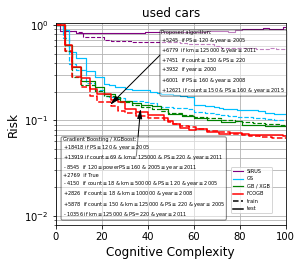

In [494]:
compare_used_cars('used_cars', col=10, max_length=100, pdfname='used_cars_compare100_log.pdf')

In [489]:
from matplotlib import pyplot as plt
from random import random

def compare_used_cars(dataset_name, location='../experiment_output_20230418', max_risk=1, repeat=1, col=10, 
            max_length=30, title=None, rep=1, pdfname=None, sirus_comp=[], sirus_train=[], sirus_test=[]):
    test_risks={}
    train_risks={}
    and_counts={}
    aucs={}
    file_numbers={}
    desc=dataset_name
    max_risk=get_max_risk(dataset_name)
    print(max_risk)
    objs = ['mwg','gpe','xgb','orth']
    for obj in objs:
        algos = ['fc'] if obj=='orth' else ['boosting'] if obj in ['gpe'] or obj=='mwg' else ['keep']
        search='exhaustive' if obj not in ['mwg', 'gpe'] else 'greedy'
        print(search)
        for algo in algos:
            methods = ['Newton-CG'] if algo=='fc' else ['']
            for method in methods:
                done = True
                fc_train=[0]*30
                fc_test=[0]*30
                ands = [0]*30
                file_number=0
                for i in range(repeat):
                    filename = dataset_name + '_' + obj + '_' + algo + '_' + method + '_realkd_col_' + \
                        str(col) + '_rep' + str(rep) + '.txt'
                    try:
                        f = open(location+search+'/'+dataset_name+'/'+filename, 'r')
                        file_number+=1
                    except:
                        print(obj, algo, method,'does not exist: ')
                        print(location+search+'/'+dataset_name+'/'+filename)
                        continue
                    j=-1
                    for line in f:
                        if 'iteration ' in line:
                            j+=1
                        if j>=50:
                            break
                        words=line.split(' ')
                        if 'fc train risk' in line:
                            fc_train[j] += float(words[-1])
                        elif 'fc test risk' in line:
                            fc_test[j] += float(words[-1])
                        if 'if' in line:
                            ands[j]+=line.count('=')+1
                if done:
                    file_numbers[obj + '_' + algo + '_' + method] = file_number
                    train_risks[obj + '_' + algo + '_' + method]=fc_train
                    test_risks[obj + '_' + algo + '_' + method]=fc_test
                    and_counts[obj + '_' + algo + '_' + method]=ands
                    if file_number==0:
                        continue
                    print(obj + '_' + algo + '_' + method+': avg train risk:',sum(fc_train)/10/max_risk/file_number, 
                          'avg test risk', sum(fc_test)/10/max_risk/file_number, '&s:', sum(ands)/10/file_number)

    rg=list(range(1,51))
    fig = plt.figure(figsize=(4,3.5))
#     plt.figure(figsize=(7.5,6.5))
    colours = {}
    line_width = {}
    
    plt.step(sirus_comp, sirus_train[:len(sirus_comp)], '--', color='purple', 
             linewidth=1.2, where='post')
    plt.step(sirus_comp, sirus_test[:len(sirus_comp)], color='purple', 
             linewidth=1.2, label='SIRUS', where='post')
    width = [1.2,1.2,1.2, 1.5, 1.1]*4
    i = 0
    colors=['deepskyblue','green','violet','red','cyan','brown','deepskyblue','purple', 'lime',
            'slategray','magenta','pink','olive','gold','khaki']
    label_map={'gpe_boosting_':'GB', 'gpe_fc_Newton-CG': 'Gradient Fully-corrective Boosting', 
               'orth_fc_Newton-CG': 'FCOGB', 'xgb_keep_': 'XGB', 
              'xgb_fc_Newton-CG': 'XG Fully-corrective Boosting',
              'mwg_boosting_':'GS'}
    for item in train_risks:
        color = colors[i]
        colours[item] = color
        line_width[item] = width[i]
        i+=1
        if file_numbers[item]==0:
            continue
        train_risks[item] = [risk / max_risk/file_numbers[item] for risk in train_risks[item]]
        test_risks[item] = [risk / max_risk/file_numbers[item] for risk in test_risks[item]]
        and_counts[item] = [ands / file_numbers[item] for ands in and_counts[item]]
        aucs[item] = and_counts[item][0]+sum((train_risks[item][m])*
                                             (min(max_length, and_counts[item][m+1])-
                                                                   min(max_length, and_counts[item][m]))
                                for m in range(len(train_risks[item])-1))
        print(item, 'auc:', aucs[item])
#         print(and_counts[item], train_risks[item])
#         if item=='mwg_boosting_':
#             and_counts['mwg_boosting_']=[and_counts['mwg_boosting_'][i]+and_counts['orth_fc_Newton-CG'][0]
#                                          -and_counts['mwg_boosting_'][0] for i in range(len(and_counts['mwg_boosting_']))]
    
        plt.step([0]+and_counts[item], [1]+train_risks[item], '--', color=colours[item],
                 linewidth=line_width[item],where='post')
        plt.step([0]+and_counts[item], [1]+test_risks[item], color=colours[item],
                 label=label_map[item],linewidth=line_width[item],where='post')
    plt.xlabel('Cognitive Complexity', fontsize=12)
    plt.xlim(0,max_length)
#     plt.ylabel('Risk', fontsize=12)
    plt.yscale('log')
    boosting_rule='''Gradient Boosting:
- 3.03 if var$\geq$1.24
+3.47 if skew$\leq$7.62 & var$\leq$-0.50
+5.65 if curt$\leq$-2.18 & skew$\leq$7.62 & -0.50$\leq$var$\leq$3.38
- 4.01 if curt$\geq$-2.18 & skew$\geq$3.42 & -2.26$\leq$var$\leq$1.24
- 5.38 if curt$\geq$4.57 & skew$\geq$-3.38 & var$\leq$1.24
+3.41 if curt$\leq$4.57 & ent$\geq$-0.19 & skew$\leq$0.76 & -0.50$\leq$var$\leq$1.24
- 3.92 if curt$\leq$-2.18 & skew$\geq$7.62 & var$\leq$1.24
- 2.76 if curt$\geq$-0.18 & ent$\leq$-0.19 & skew$\leq$0.76 & -0.507$\leq$var$\leq$1.24
+5.05 if -2.18$\leq$curt$\leq$-0.18 & ent$\geq$0.54 & skew$\leq$3.42 & 1.24$\leq$var$\leq$3.38
- 3.47 if curt$\geq$1.40 & skew$\geq$7.62 & var$\leq$-2.26'''
    orth_rule = '''Proposed algorithm:
- 4.80 if var$\geq$1.24
+5.20 if skew$\leq$7.62 & var$\leq$-0.50
+7.68 if curt$\leq$-2.18 & skew$\leq$7.62 & -0.50$\leq$var$\leq$3.38
- 4.36 if skew$\geq$3.42 & -2.26$\leq$var$\leq$1.24
- 6.81 if curt$\geq$4.57 & skew$\geq$-3.38 & var$\leq$1.24
+3.34 if curt$\leq$4.57 & ent$\geq$-0.19 & skew$\leq$0.76 & 
            -0.50$\leq$var$\leq$1.24'''
    plt.plot([],[], '--', color='k', label='train')
    plt.plot([],[], color='k', label='test')
    plt.annotate('', xy=(24, 0.105), xytext=(32, 0.3), fontsize=4, 
                 arrowprops=dict(arrowstyle="-|>,head_length=2,head_width=0.5",connectionstyle="arc3", facecolor='black'))
    plt.annotate('', xy=(48, 0.108), xytext=(40, 0.042), fontsize=4,
                 arrowprops=dict(arrowstyle="-|>,head_length=2,head_width=0.5",connectionstyle="arc3", facecolor='black'))
    if max_length==50:
        plt.ylim([0.03, 1.05])
        plt.legend(bbox_to_anchor=(0.98,0.58))
    if max_length==100:
        plt.ylim([0.008, 1.05])
        plt.legend(bbox_to_anchor=(1,0.33),prop = { "size": 5 })
    bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)
    plt.text(2,0.0085, boosting_rule, bbox=bbox_props, fontsize=5)
    plt.text(33,0.22, orth_rule, bbox=bbox_props, fontsize=5)
    
#     bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)
#     plt.text(7.8,0.25, boosting_rule, bbox=bbox_props, fontsize=11)
#     plt.text(1,0.031, orth_rule, bbox=bbox_props, fontsize=11)
    plt.title(dataset_name.replace('_', ' '))
    plt.grid(visible=True, which='major')
    plt.grid(visible=True, which='minor')
#     plt.gca().set_ylim(bottom=0)
    
    if pdfname is not None:
        
        print(pdfname)
        plt.savefig(pdfname, dpi=fig.dpi, bbox_inches='tight')
    plt.show()
    
#     return train_risks, test_risks, and_counts, aucs

def get_max_risk(dataset_name):
    d = {'gdp': 43.986571428571416,
        'wage': 2029057842.6515312,
        'titanic': 1.0,
        'insurance': 322646873.58870494,
        'used_cars': 1.0269587154562938, #194464336.77843493,
        'tic_tac_toe': 1.0,
        'boston': 592.1469169960473,
        'world_happiness_indicator': 30.46778212179487,
        'Demographics': 31.64835409252669,
        'IBM_HR': 1.0, 'telco_churn': 1.0,
        'mobile_prices': 3.5,
        'GenderRecognition': 1.0,
        'breast_cancer': 1.0,
        'load_diabetes': 29074.481900452487,
        'iris': 1.0,
        'load_wine': 1.0,
         'suicide_rates_cleaned': 523.7783290690134,
         'videogamesales': 2.70680865164444,
         'digits5': 1.0,
         'red_wine_quality': 32.41651031894934, 
         'banknote': 1.0, 
         'liver': 1.0, 
         'magic': 1.0, 
         'adult': 1.0,
         'who_life_expectancy': 4882.764241803283,
         'vaccine': 228506505.50612897, 
         'ships': 12.342277392898044, 
         'smoking': 7.500299349437478, 
         'covid_vic': 51.62076805721374, 
         'covid_world': 14143.401514056353, 
         'covid': 1082.8170359400497, 
         'bicycle': 1076.416963882381, 
         'austin-water': 3975.767978495398,
         'make_friedman2': 379683.4049960418, 
         'make_friedman3': 1.8780821278399789, 
         'make_friedman1': 226.89125115757616
        }
    if dataset_name in d:
        return d[dataset_name]
    else:
        return 1

[  2   4   6   8  10  13  16  18  21  24  27  29  32  35  38  41  43  45
  48  50  53  56  59  61  63  65  68  71  73  76  79  82  85  88  91  94
  97 100 103 106 109 112 115 118 121 123 126 129 132 135 138]
1.0
greedy
mwg_boosting_: avg train risk: 0.5234735907963104 avg test risk 0.5345336965187837 &s: 154.7
greedy
gpe_boosting_: avg train risk: 0.37300927332174927 avg test risk 0.37595056429091345 &s: 214.5
exhaustive
xgb_keep_: avg train risk: 0.45156706505856226 avg test risk 0.47135761763404443 &s: 162.1
exhaustive
orth_fc_Newton-CG: avg train risk: 0.29869205209533234 avg test risk 0.31351479511332353 &s: 247.4
mwg_boosting_ auc: 18.94438674550378
gpe_boosting_ auc: 16.879431262216542
xgb_keep_ auc: 17.712397771019738
orth_fc_Newton-CG auc: 13.808867808273401
banknote_compare100_log.pdf


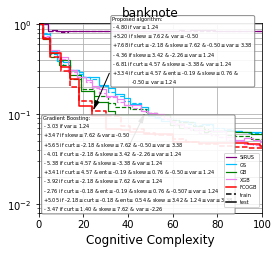

In [490]:
import numpy as np
bank_comp=np.cumsum([2,2,2,2,2,3,3,2,3,3,3,2,3,3,3,3,2,2,3,2,3,3,3,2,2,2,3,3,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,3,3,3,3,3])
bank_train=[1.0000000,0.8457616,0.8554199,0.8402569,0.8336402,0.8407069,0.8430264,0.8432240,0.8476775,
0.8447023,0.8471400,0.8453785,0.8471116,0.8486667,0.8482915,0.8497574,0.8504846,0.8517341,
0.8521353,0.8507546,0.8538248,0.8525157,0.8523542,0.8521450,0.8539293,0.8536963,0.8543751,
0.8546353,0.8538218,0.8539122,0.8499622,0.8527685,0.8516955,0.8519916,0.8528138,0.8508883,
0.8490368,0.8496360,0.8499764,0.8486021,0.8484732,0.8504235,0.8491191,0.8492093,0.8495956,
0.8495205,0.8515217,0.8494077,0.8498719,0.8502503,0.8504190]
bank_test=[1.0000000,0.8457770,0.8563435,0.8415495,0.8356448,0.8431540,0.8453514,0.8455284,0.8498098,
0.8476470,0.8492228,0.8470909,0.8493657,0.8514621,0.8505370,0.8521289,0.8526348,0.8541204,
0.8544173,0.8530394,0.8561517,0.8549817,0.8547452,0.8544461,0.8563708,0.8561704,0.8568506,
0.8570256,0.8565116,0.8566705,0.8524966,0.8554407,0.8542797,0.8545019,0.8555264,0.8532700,
0.8516675,0.8523697,0.8526801,0.8511794,0.8510926,0.8534752,0.8519732,0.8521046,0.8525117,
0.8524180,0.8544382,0.8524735,0.8527148,0.8530158,0.8531612,0.8525395]
compare_used_cars('banknote', col=10, max_length=100, pdfname='banknote_compare100_log.pdf', rep=0, 
                  sirus_comp=bank_comp, sirus_train=bank_train, sirus_test=bank_test)

In [561]:
from matplotlib import pyplot as plt
from random import random

def compare_both(dataset_names, location='../experiment_output_20230418', max_risk=1, repeat=1, col=10, 
            max_length=100, title=None, reps=[1,0], pdfname=None, sirus_comps=[], sirus_trains=[], sirus_tests=[],
                     boosting_rules=[], fcogb_rules=[], text_locations=[], arrow_ends=[], arrow_starts=[],
                legend_locations=[]):
    fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True, squeeze=False, figsize=(8, 4.5))
    for p in range(len(dataset_names)):
        ax=axs[0, p]
        dataset_name=dataset_names[p]
        test_risks={}
        train_risks={}
        and_counts={}
        aucs={}
        file_numbers={}
        desc=dataset_name
        max_risk=get_max_risk(dataset_name)
        print(max_risk)
        objs = ['mwg','gpe','orth']
        for obj in objs:
            algos = ['fc'] if obj=='orth' else ['boosting'] if obj=='gpe' or obj=='mwg' else ['keep']
            search='exhaustive' if obj not in['mwg', 'gpe'] else 'greedy'
            print(search)
            for algo in algos:
                methods = ['Newton-CG'] if algo=='fc' else ['']
                for method in methods:
                    done = True
                    fc_train=[0]*(50 if p==0 else 30)
                    fc_test=[0]*(50 if p==0 else 30)
                    ands = [0]*(50 if p==0 else 30)
                    file_number=0
                    for i in range(repeat):
                        filename = dataset_name + '_' + obj + '_' + algo + '_' + method + '_realkd_col_' + \
                            str(col) + '_rep' + str(reps[p]) + '.txt'
                        try:
                            f = open(location+search+'/'+dataset_name+'/'+filename, 'r')
                            file_number+=1
                        except:
                            print(obj, algo, method,'does not exist: ')
                            print(location+search+'/'+dataset_name+'/'+filename)
                            continue
                        j=-1
                        for line in f:
                            if 'iteration ' in line:
                                j+=1
                            if j>=50:
                                break
                            words=line.split(' ')
                            if 'fc train risk' in line:
                                fc_train[j] += float(words[-1])
                            elif 'fc test risk' in line:
                                fc_test[j] += float(words[-1])
                            if 'if' in line:
                                ands[j]+=line.count('=')+1
                    if done:
                        file_numbers[obj + '_' + algo + '_' + method] = file_number
                        train_risks[obj + '_' + algo + '_' + method]=fc_train
                        test_risks[obj + '_' + algo + '_' + method]=fc_test
                        and_counts[obj + '_' + algo + '_' + method]=ands
                        if file_number==0:
                            continue
                        print(obj + '_' + algo + '_' + method+': avg train risk:',sum(fc_train)/10/max_risk/file_number, 
                              'avg test risk', sum(fc_test)/10/max_risk/file_number, '&s:', sum(ands)/10/file_number)

        rg=list(range(1,51))
        
        colours = {}
        line_width = {}
        ax.step(sirus_comps[p],sirus_trains[p][:len(sirus_comps[p])], '--', color='purple', linewidth=1.1, where='post')
        ax.step(sirus_comps[p],sirus_tests[p][:len(sirus_comps[p])], color='purple', 
                 linewidth=1.1, label='SIRUS', where='post')
        width = [1.2,1.2, 1.5, 1]*4
        i = 0
        colors=['deepskyblue','green','red','violet','cyan','brown','deepskyblue','purple', 'lime',
                'slategray','magenta','pink','olive','gold','khaki']
        label_map={'gpe_boosting_':'GB / XGB', 'gpe_fc_Newton-CG': 'Gradient Fully-corrective Boosting', 
                   'orth_fc_Newton-CG': 'FCOGB', 'xgb_keep_': 'XGBoost', 
                  'xgb_fc_Newton-CG': 'XG Fully-corrective Boosting',
                  'mwg_boosting_':'GS'}
        for item in train_risks:
            color = colors[i]
            colours[item] = color
            line_width[item] = width[i]
            i+=1
            if file_numbers[item]==0:
                continue
            train_risks[item] = [risk / max_risk/file_numbers[item] for risk in train_risks[item]]
#             print(train_risks[item])
            test_risks[item] = [risk / max_risk/file_numbers[item] for risk in test_risks[item]]
            and_counts[item] = [ands / file_numbers[item] for ands in and_counts[item]]
            aucs[item] = and_counts[item][0]+sum((train_risks[item][m])*
                                                 (min(max_length, and_counts[item][m+1])-
                                                                       min(max_length, and_counts[item][m]))
                                    for m in range(len(train_risks[item])-1))
            print(item, 'auc:', aucs[item])
            ax.step([0]+and_counts[item], [1]+train_risks[item], '--', color=colours[item],
                     linewidth=line_width[item],where='post')
            ax.step([0]+and_counts[item], [1]+test_risks[item], color=colours[item],
                     label=label_map[item],linewidth=line_width[item],where='post')
        ax.set_xlabel('Cognitive Complexity', fontsize=12)
        ax.set_xlim(0,max_length)
        if p==0:
            ax.set_ylabel('Risk', fontsize=12)
        ax.set_yscale('log')
        ax.plot([],[], '--', color='k', label='train')
        ax.plot([],[], color='k', label='test')
        boosting_rule=boosting_rules[p]
        orth_rule = fcogb_rules[p]
        ax.annotate('', xy=(arrow_ends[p][0][0], arrow_ends[p][0][1]), 
                    xytext=(arrow_starts[p][0][0], arrow_starts[p][0][1]), fontsize=4, 
                     arrowprops=dict(arrowstyle="-|>,head_length=2,head_width=0.5",
                                     connectionstyle="arc3", facecolor='black'))
        ax.annotate('', xy=(arrow_ends[p][1][0], arrow_ends[p][1][1]), 
                    xytext=(arrow_starts[p][1][0], arrow_starts[p][1][1]), fontsize=4,
                     arrowprops=dict(arrowstyle="-|>,head_length=2,head_width=0.5",
                                     connectionstyle="arc3", facecolor='black'))
        if max_length==50:
            ax.set_ylim([0.01, 1.05])
            ax.legend(bbox_to_anchor=(0.98,0.58))
        if max_length==100:
            ax.set_ylim([0.008, 1.05])
            ax.legend(bbox_to_anchor=(0.95,0.3), prop = { "size": 5 })
        bbox_props = dict(boxstyle="round", fc="w", ec="k", alpha=0.5)
        ax.text(text_locations[p][0][0],text_locations[p][0][1], boosting_rule, bbox=bbox_props, fontsize=5)
        ax.text(text_locations[p][1][0],text_locations[p][1][1], orth_rule, bbox=bbox_props, fontsize=5)
        ax.set_title(dataset_name.replace('_', ' '))
        ax.grid(visible=True, which='major')
        ax.grid(visible=True, which='minor')
#         ax.tight_layout(pad=0.01)
    #     plt.gca().set_ylim(bottom=0)

    #     plt.legend()
    if pdfname is not None:
        print(pdfname)
        print(fig.dpi)
        plt.savefig(pdfname, dpi=fig.dpi, bbox_inches='tight',pad_inches=0.01)
    plt.show()
    
#     return train_risks, test_risks, and_counts, aucs

def get_max_risk(dataset_name):
    d = {'gdp': 43.986571428571416,
        'wage': 2029057842.6515312,
        'titanic': 1.0,
        'insurance': 322646873.58870494,
        'used_cars': 1.0269587154562938, #194464336.77843493,
        'tic_tac_toe': 1.0,
        'boston': 592.1469169960473,
        'world_happiness_indicator': 30.46778212179487,
        'Demographics': 31.64835409252669,
        'IBM_HR': 1.0, 'telco_churn': 1.0,
        'mobile_prices': 3.5,
        'GenderRecognition': 1.0,
        'breast_cancer': 1.0,
        'load_diabetes': 29074.481900452487,
        'iris': 1.0,
        'load_wine': 1.0,
         'suicide_rates_cleaned': 523.7783290690134,
         'videogamesales': 2.70680865164444,
         'digits5': 1.0,
         'red_wine_quality': 32.41651031894934, 
         'banknote': 1.0, 
         'liver': 1.0, 
         'magic': 1.0, 
         'adult': 1.0,
         'who_life_expectancy': 4882.764241803283,
         'vaccine': 228506505.50612897, 
         'ships': 12.342277392898044, 
         'smoking': 7.500299349437478, 
         'covid_vic': 51.62076805721374, 
         'covid_world': 14143.401514056353, 
         'covid': 1082.8170359400497, 
         'bicycle': 1076.416963882381, 
         'austin-water': 3975.767978495398,
         'make_friedman2': 379683.4049960418, 
         'make_friedman3': 1.8780821278399789, 
         'make_friedman1': 226.89125115757616
        }
    if dataset_name in d:
        return d[dataset_name]
    else:
        return 1

In [562]:
used_cars_boosting_rule='''Gradient Boosting / XGBoost:
+18418 if PS$\geq$120 & year$\geq$2005
+13919 if count$\leq$69 & km$\leq$125000 & PS$\geq$220 & year$\geq$2011
- 8545  if 120$\leq$powerPS$\leq$160 & 2005$\leq$year$\leq$2011
+2769  if True
- 4150  if count$\geq$18 & km$\geq$50000 & PS$\geq$120 & year$\geq$2005
+2826  if count$\geq$18 & km$\leq$100000 & year$\geq$2008
+5878  if count$\leq$150 & km$\geq$125000 & PS$\geq$220 & year$\leq$2005
- 10356 if km$\leq$125000 & PS=220 & year$\geq$2011'''
used_cars_orth_rule='''Proposed algorithm:
+5245  if PS$\geq$120 & year$\geq$2005
+6779  if km$\leq$125000 & year$\geq$2011
+7451  if count$\leq$150 & PS$\geq$220
+3932  if year$\geq$2000
+6001  if PS$\geq$160 & year$\geq$2008
+12621 if count$\leq$150 & PS$\geq$160 & year$\geq$2015'''
banknote_boosting_rule='''Gradient Boosting:
- 3.03 if var$\geq$1.24
+3.47 if skew$\leq$7.62 & var$\leq$-0.50
+5.65 if curt$\leq$-2.18 & skew$\leq$7.62 & -0.50$\leq$var$\leq$3.38
- 4.01 if curt$\geq$-2.18 & skew$\geq$3.42 & -2.26$\leq$var$\leq$1.24
- 5.38 if curt$\geq$4.57 & skew$\geq$-3.38 & var$\leq$1.24
+3.41 if curt$\leq$4.57 & ent$\geq$-0.19 & skew$\leq$0.76 & -0.50$\leq$var$\leq$1.24
- 3.92 if curt$\leq$-2.18 & skew$\geq$7.62 & var$\leq$1.24
- 2.76 if curt$\geq$-0.18 & ent$\leq$-0.19 & skew$\leq$0.76 & -0.507$\leq$var$\leq$1.24
+5.05 if -2.18$\leq$curt$\leq$-0.18 & ent$\geq$0.54 & skew$\leq$3.42 & 1.24$\leq$var$\leq$3.38
- 3.47 if curt$\geq$1.40 & skew$\geq$7.62 & var$\leq$-2.26'''
banknote_orth_rule = '''Proposed algorithm:
- 4.80 if var$\geq$1.24
+5.20 if skew$\leq$7.62 & var$\leq$-0.50
+7.68 if curt$\leq$-2.18 & skew$\leq$7.62 & -0.50$\leq$var$\leq$3.38
- 4.36 if skew$\geq$3.42 & -2.26$\leq$var$\leq$1.24
- 6.81 if curt$\geq$4.57 & skew$\geq$-3.38 & var$\leq$1.24
+3.34 if curt$\leq$4.57 & ent$\geq$-0.19 & skew$\leq$0.76 & 
            -0.50$\leq$var$\leq$1.24'''

In [563]:
import numpy as np
bank_sirus_comp=np.cumsum([2,2,2,2,2,3,3,2,3,3,3,2,3,3,3,3,2,2,3,2,3,3,3,2,2,2,3,3,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,3,3,3,3,3])
bank_sirus_train=[1.0000000,0.8457616,0.8554199,0.8402569,0.8336402,0.8407069,0.8430264,0.8432240,0.8476775,
0.8447023,0.8471400,0.8453785,0.8471116,0.8486667,0.8482915,0.8497574,0.8504846,0.8517341,
0.8521353,0.8507546,0.8538248,0.8525157,0.8523542,0.8521450,0.8539293,0.8536963,0.8543751,
0.8546353,0.8538218,0.8539122,0.8499622,0.8527685,0.8516955,0.8519916,0.8528138,0.8508883,
0.8490368,0.8496360,0.8499764,0.8486021,0.8484732,0.8504235,0.8491191,0.8492093,0.8495956,
0.8495205,0.8515217,0.8494077,0.8498719,0.8502503,0.8504190]
bank_sirus_test=[1.0000000,0.8457770,0.8563435,0.8415495,0.8356448,0.8431540,0.8453514,0.8455284,0.8498098,
0.8476470,0.8492228,0.8470909,0.8493657,0.8514621,0.8505370,0.8521289,0.8526348,0.8541204,
0.8544173,0.8530394,0.8561517,0.8549817,0.8547452,0.8544461,0.8563708,0.8561704,0.8568506,
0.8570256,0.8565116,0.8566705,0.8524966,0.8554407,0.8542797,0.8545019,0.8555264,0.8532700,
0.8516675,0.8523697,0.8526801,0.8511794,0.8510926,0.8534752,0.8519732,0.8521046,0.8525117,
0.8524180,0.8544382,0.8524735,0.8527148,0.8530158,0.8531612,0.8525395]
used_cars_sirus_comp=[0, 2, 4, 7, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60, 63, 66, 69, 72, 75, 78, 
                 81, 84, 87, 90, 93, 96, 99, 102]
used_cars_sirus_train=[1, 0.9994350, 0.8696765, 0.8626640, 0.8440756, 0.7515519, 0.7558351, 0.7556530,
    0.6891838, 0.6827963, 0.6757399, 0.6757356, 0.6668457, 0.6668479, 0.6668457,
    0.6593183, 0.6593379, 0.6606534, 0.6604860, 0.6425454, 0.6379903, 0.6380648,
    0.6367842, 0.6369410, 0.5981340, 0.5784931, 0.5784822, 0.5785450, 0.5785502,
    0.5785502, 0.5576540, 0.5566320, 0.5762792, 0.5567980, 0.5544311, 0.5544229,
    0.5543182, 0.5433708, 0.5509874, 0.5511007, 0.5432737, 0.5434794, 0.5434788,
    0.5442668, 0.5428193, 0.5522481, 0.5421468, 0.5354273, 0.5421665, 0.5334900,
    0.5343200, 0.5377863]
used_cars_sirus_test=[0.9971751, 0.8632818, 0.8556711, 0.8556092, 0.8299741, 0.8306051, 0.8293350, 0.8315003, 0.8315006,
    0.8315006, 0.8315005, 0.8314101, 0.8334764, 0.8334761, 0.8353698, 0.8380277, 0.8380255, 0.8383163,
    0.8381883, 0.8347613, 0.8482547, 0.8550078, 0.8392419, 0.8588412, 0.8608018, 0.8608198, 0.8499406,
    0.8970128, 0.9015498, 0.9014993, 0.9014991, 0.9317368, 0.9038972, 0.9039428, 0.9482345, 0.9371175,
    0.9434899, 0.9334921, 0.9342142, 0.9384535, 0.9520204, 0.9520513, 0.9515842, 0.9522726, 0.9522737,
    1.0169144, 0.9517031, 0.9632834, 0.9413457, 0.9452707, 0.9182855, 1.0162028]

1.0269587154562938
greedy
mwg_boosting_: avg train risk: 0.693034766054504 avg test risk 0.8621440647311407 &s: 420.9
greedy
gpe_boosting_: avg train risk: 0.5502871118053505 avg test risk 0.5982681404028373 &s: 542.1
exhaustive
orth_fc_Newton-CG: avg train risk: 0.45174749721394647 avg test risk 0.5280632812877066 &s: 571.4
mwg_boosting_ auc: 19.84717750245488
gpe_boosting_ auc: 17.338985358598087
orth_fc_Newton-CG auc: 15.867028035231831
1.0
greedy
mwg_boosting_: avg train risk: 0.5234735907963104 avg test risk 0.5345336965187837 &s: 154.7
greedy
gpe_boosting_: avg train risk: 0.37300927332174927 avg test risk 0.37595056429091345 &s: 214.5
exhaustive
orth_fc_Newton-CG: avg train risk: 0.29869205209533234 avg test risk 0.31351479511332353 &s: 247.4
mwg_boosting_ auc: 18.94438674550378
gpe_boosting_ auc: 16.879431262216542
orth_fc_Newton-CG auc: 13.808867808273401
figure1.pdf
72.0


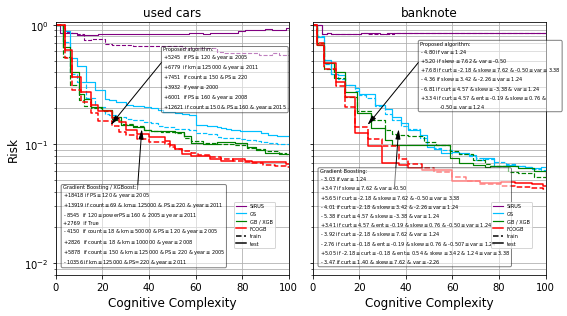

In [564]:
compare_both(['used_cars', 'banknote'], max_risk=1, repeat=1, col=10, 
                  max_length=100, title=None, reps=[1,0], pdfname='figure1.pdf', sirus_comps=[used_cars_sirus_comp, bank_sirus_comp], 
                  sirus_trains=[used_cars_sirus_train, bank_sirus_train], 
                  sirus_tests=[used_cars_sirus_test, bank_sirus_test],
                  boosting_rules=[used_cars_boosting_rule, banknote_boosting_rule], 
                  fcogb_rules=[used_cars_orth_rule, banknote_orth_rule],
            text_locations=[], arrow_ends=[], arrow_starts=[])

In [4]:
from matplotlib import pyplot as plt
from random import random

def compare_used_cars(dataset_name, location='../experiment_output_', max_risk=1, repeat=1, col=10, 
            max_length=30, title=None, rep=1, pdfname=None):
    test_risks={}
    train_risks={}
    and_counts={}
    aucs={}
    file_numbers={}
    desc=dataset_name
    max_risk=get_max_risk(dataset_name)
    print(max_risk)
    objs = ['mwg','gpe','orth']
    for obj in objs:
        algos = ['fc'] if obj=='orth' else ['boosting'] if obj=='gpe' or obj=='mwg' else ['keep']
        search='exhaustive' if obj!='mwg' else 'greedy'
        print(search)
        for algo in algos:
            methods = ['Newton-CG'] if algo=='fc' else ['']
            for method in methods:
                done = True
                fc_train=[0]*50
                fc_test=[0]*50
                ands = [0]*50
                file_number=0
                for i in range(repeat):
                    filename = dataset_name + '_' + obj + '_' + algo + '_' + method + '_realkd_col_' + \
                        str(col) + '_rep' + str(rep) + '.txt'
                    try:
                        f = open(location+search+'/'+dataset_name+'/'+filename, 'r')
                        file_number+=1
                    except:
                        print(obj, algo, method,'does not exist: ')
                        print(location+search+'/'+dataset_name+'/'+filename)
                        continue
                    j=-1
                    for line in f:
                        if 'iteration ' in line:
                            j+=1
                        if j>=50:
                            break
                        words=line.split(' ')
                        if 'fc train risk' in line:
                            fc_train[j] += float(words[-1])
                        elif 'fc test risk' in line:
                            fc_test[j] += float(words[-1])
                        if 'if' in line:
                            ands[j]+=line.count('=')+1
                if done:
                    file_numbers[obj + '_' + algo + '_' + method] = file_number
                    train_risks[obj + '_' + algo + '_' + method]=fc_train
                    test_risks[obj + '_' + algo + '_' + method]=fc_test
                    and_counts[obj + '_' + algo + '_' + method]=ands
                    if file_number==0:
                        continue
                    print(obj + '_' + algo + '_' + method+': avg train risk:',sum(fc_train)/10/max_risk/file_number, 
                          'avg test risk', sum(fc_test)/10/max_risk/file_number, '&s:', sum(ands)/10/file_number)

    rg=list(range(1,51))
    plt.figure(figsize=(6.5,5.5))
    colours = {}
    line_width = {}
    
    width = [1.2,1.2, 1.5, 1]*4
    i = 0
    colors=['deepskyblue','green','red','violet','cyan','brown','deepskyblue','purple', 'lime',
            'slategray','magenta','pink','olive','gold','khaki']
    label_map={'gpe_boosting_':'GB / XGB', 'gpe_fc_Newton-CG': 'Gradient Fully-corrective Boosting', 
               'orth_fc_Newton-CG': 'FCOGB', 'xgb_keep_': 'XGBoost', 
              'xgb_fc_Newton-CG': 'XG Fully-corrective Boosting',
              'mwg_boosting_':'GS'}
    for item in train_risks:
        color = colors[i]
        colours[item] = color
        line_width[item] = width[i]
        i+=1
        if file_numbers[item]==0:
            continue
        train_risks[item] = [risk / max_risk/file_numbers[item] for risk in train_risks[item]]
        test_risks[item] = [risk / max_risk/file_numbers[item] for risk in test_risks[item]]
        and_counts[item] = [ands / file_numbers[item] for ands in and_counts[item]]
        aucs[item] = and_counts[item][0]+sum((train_risks[item][m])*
                                             (min(max_length, and_counts[item][m+1])-
                                                                   min(max_length, and_counts[item][m]))
                                for m in range(len(train_risks[item])-1))
        print(item, 'auc:', aucs[item])
#         print(and_counts[item], train_risks[item])
#         if item=='mwg_boosting_':
#             and_counts['mwg_boosting_']=[and_counts['mwg_boosting_'][i]+and_counts['orth_fc_Newton-CG'][0]
#                                          -and_counts['mwg_boosting_'][0] for i in range(len(and_counts['mwg_boosting_']))]
    
        plt.step([0]+and_counts[item], [1]+train_risks[item], '--', color=colours[item],
                 linewidth=line_width[item], label=label_map[item]+' train risk',where='post')
        plt.step([0]+and_counts[item], [1]+test_risks[item], color=colours[item],
                 label=label_map[item]+ ' test risk',linewidth=line_width[item],where='post')
    plt.xlabel('Cognitive Complexity', fontsize=12)
    plt.xlim(0,max_length)
    plt.ylabel('Risk', fontsize=12)
#     plt.yscale('log')
#     plt.step([0, 2, 4, 7, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60, 63, 66, 69, 72, 75, 78, 
#              81, 84, 87, 90, 93, 96, 99, 102],
#              [1, 0.9994350, 0.8696765, 0.8626640, 0.8440756, 0.7515519, 0.7558351, 0.7556530,
# 0.6891838, 0.6827963, 0.6757399, 0.6757356, 0.6668457, 0.6668479, 0.6668457,
# 0.6593183, 0.6593379, 0.6606534, 0.6604860, 0.6425454, 0.6379903, 0.6380648,
# 0.6367842, 0.6369410, 0.5981340, 0.5784931, 0.5784822, 0.5785450, 0.5785502,
# 0.5785502, 0.5576540, 0.5566320, 0.5762792, 0.5567980, 0.5544311, 0.5544229,
# 0.5543182, 0.5433708, 0.5509874, 0.5511007, 0.5432737, 0.5434794, 0.5434788,
# 0.5442668, 0.5428193, 0.5522481, 0.5421468, 0.5354273, 0.5421665, 0.5334900,
# 0.5343200, 0.5377863][:36], '--', color='olive', linewidth=1.1, label='SIRUS train risk', where='post')
#     plt.step([0, 2, 4, 7, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60, 63, 66, 69, 72, 75, 78, 
#              81, 84, 87, 90, 93, 96, 99, 102], [0.9971751, 0.8632818, 0.8556711, 0.8556092, 0.8299741, 0.8306051, 0.8293350, 0.8315003, 0.8315006,
# 0.8315006, 0.8315005, 0.8314101, 0.8334764, 0.8334761, 0.8353698, 0.8380277, 0.8380255, 0.8383163,
# 0.8381883, 0.8347613, 0.8482547, 0.8550078, 0.8392419, 0.8588412, 0.8608018, 0.8608198, 0.8499406,
# 0.8970128, 0.9015498, 0.9014993, 0.9014991, 0.9317368, 0.9038972, 0.9039428, 0.9482345, 0.9371175,
# 0.9434899, 0.9334921, 0.9342142, 0.9384535, 0.9520204, 0.9520513, 0.9515842, 0.9522726, 0.9522737,
# 1.0169144, 0.9517031, 0.9632834, 0.9413457, 0.9452707, 0.9182855, 1.0162028][:36], color='olive', 
#              linewidth=1.1, label='SIRUS train risk', where='post')
    if max_length==50:
        plt.ylim([0.03, 1.05])
        plt.legend(bbox_to_anchor=(0.98,0.58))
    if max_length==100:
        plt.ylim([0.02, 1.05])
        plt.legend(bbox_to_anchor=(0.95,0.51))
#     bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)
#     plt.text(7.8,0.25, boosting_rule, bbox=bbox_props, fontsize=11)
#     plt.text(1,0.031, orth_rule, bbox=bbox_props, fontsize=11)
    plt.title(dataset_name.replace('_', ' '))
    plt.grid(visible=True, which='major')
    plt.grid(visible=True, which='minor')
#     plt.gca().set_ylim(bottom=0)
    
    if pdfname is not None:
        print(pdfname)
        plt.savefig(pdfname, dpi=300, bbox_inches='tight')
    plt.show()
    
#     return train_risks, test_risks, and_counts, aucs

def get_max_risk(dataset_name):
    d = {'gdp': 43.986571428571416,
        'wage': 2029057842.6515312,
        'titanic': 1.0,
        'insurance': 322646873.58870494,
        'used_cars': 1.0269587154562938, #194464336.77843493,
        'tic_tac_toe': 1.0,
        'boston': 592.1469169960473,
        'world_happiness_indicator': 30.46778212179487,
        'Demographics': 31.64835409252669,
        'IBM_HR': 1.0, 'telco_churn': 1.0,
        'mobile_prices': 3.5,
        'GenderRecognition': 1.0,
        'breast_cancer': 1.0,
        'load_diabetes': 29074.481900452487,
        'iris': 1.0,
        'load_wine': 1.0,
         'suicide_rates_cleaned': 523.7783290690134,
         'videogamesales': 2.70680865164444,
         'digits5': 1.0,
         'red_wine_quality': 32.41651031894934, 
         'banknote': 1.0, 
         'liver': 1.0, 
         'magic': 1.0, 
         'adult': 1.0,
         'who_life_expectancy': 4882.764241803283,
         'vaccine': 228506505.50612897, 
         'ships': 12.342277392898044, 
         'smoking': 7.500299349437478, 
         'covid_vic': 51.62076805721374, 
         'covid_world': 14143.401514056353, 
         'covid': 1082.8170359400497, 
         'bicycle': 1076.416963882381, 
         'austin-water': 3975.767978495398,
         'make_friedman2': 379683.4049960418, 
         'make_friedman3': 1.8780821278399789, 
         'make_friedman1': 226.89125115757616
        }
    if dataset_name in d:
        return d[dataset_name]
    else:
        return 1

1
greedy
mwg_boosting_: avg train risk: 2.4138458291424754 avg test risk 2.7419883095627955 &s: 402.0
exhaustive
gpe_boosting_: avg train risk: 0.7150228352825273 avg test risk 0.8215818095380015 &s: 815.8
exhaustive
orth_fc_Newton-CG: avg train risk: 0.6369143824604186 avg test risk 0.8141879681718358 &s: 849.0
mwg_boosting_ auc: 37.55257647752464
gpe_boosting_ auc: 28.98506072547267
orth_fc_Newton-CG auc: 30.187257386290675
tic-tac-toe_compare50_linear.pdf


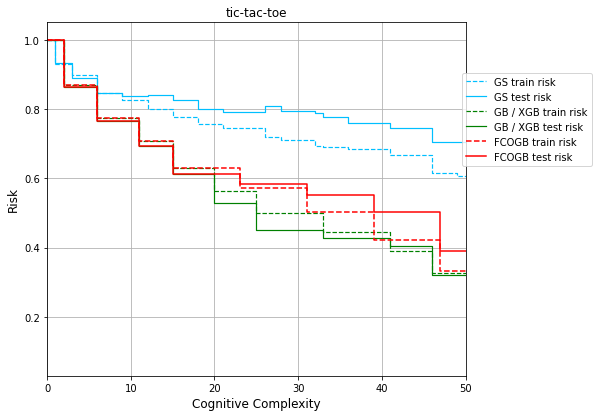

1
greedy
mwg_boosting_: avg train risk: 2.4138458291424754 avg test risk 2.7419883095627955 &s: 402.0
exhaustive
gpe_boosting_: avg train risk: 0.7150228352825273 avg test risk 0.8215818095380015 &s: 815.8
exhaustive
orth_fc_Newton-CG: avg train risk: 0.6369143824604186 avg test risk 0.8141879681718358 &s: 849.0
mwg_boosting_ auc: 62.90828722957118
gpe_boosting_ auc: 36.76222512047093
orth_fc_Newton-CG auc: 35.4958900388458
tic-tac-toe_compare100_linear.pdf


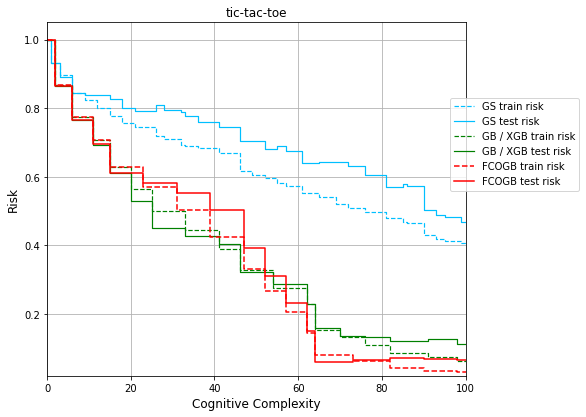

In [5]:
compare_used_cars('tic-tac-toe', col=10, max_length=50, pdfname='tic-tac-toe_compare50_linear.pdf', rep=0)
compare_used_cars('tic-tac-toe', col=10, max_length=100, pdfname='tic-tac-toe_compare100_linear.pdf', rep=0)

Compare risks of gradient sum (mwg), gradient boosting (gpe), XGBoost (xgb) and FCOGB (orth)

In [73]:
from matplotlib import pyplot as plt
from random import random

def compare_risks(dataset_name, location='../experiment_output_20230421', max_risk=1, repeat=5, col=10, 
            max_length=30, title=None):
    test_risks={}
    train_risks={}
    and_counts={}
    aucs_test={}
    aucs_train={}
    file_numbers={}
    desc=dataset_name
    max_risk=get_max_risk(dataset_name)
    print(max_risk)
    objs = ['mwg','gpe','xgb','orth']
    for obj in objs:
        algos = ['fc'] if obj=='orth' else ['boosting'] if obj in ['gpe', 'mwg'] else ['keep']
        search = 'exhaustive' if obj in ['xgb', 'orth'] else 'greedy'
        for algo in algos:
            methods = ['Newton-CG'] if algo=='fc' else ['']
            for method in methods:
                done = True
                fc_train=[0]*30
                fc_test=[0]*30
                ands = [0]*30
                file_number=0
                for i in range(repeat):
                    filename = dataset_name + '_' + obj + '_' + algo + '_' + method + '_realkd_col_' + \
                        str(col) + '_rep' + str(i) + '.txt'
                    try:
                        if dataset_name in ['titanic', 'tic-tac-toe', 'used_cars']:
                            f = open(location+search+''+'/'+dataset_name+'/'+filename, 'r')
                        else:    
                            f = open(location+search+''+'/'+dataset_name+'/'+filename, 'r')
                        file_number+=1
                    except:
                        print(obj, algo, method,'does not exist: ')
                        print(location+search+''+'/'+dataset_name+'/'+filename)
                        continue
                    j=-1
                    for line in f:
                        if 'iteration' in line:
                            j+=1
                        if j>=30:
                            break
                        words=line.split(' ')
                        if 'fc train risk' in line:
                            fc_train[j] += float(words[-1])
                        elif 'fc test risk' in line:
                            fc_test[j] += float(words[-1])
                        if 'if' in line:
                            ands[j]+=line.count('=')+1
#                     print(ands)
                if done:
                    new_fc_train=[]
                    new_fc_test=[]
                    new_ands=[]
                    print(ands)
                    for k in range(len(fc_train)):
                        if ands[k]<file_number*100:
                            new_fc_train.append(fc_train[k])
                            new_fc_test.append(fc_test[k])
                            new_ands.append(ands[k])
                        else:
                            new_fc_train.append(fc_train[k])
                            new_fc_test.append(fc_test[k])
                            new_ands.append(ands[k])
                            print(k)
                            break
                    file_numbers[obj + '_' + algo + '_' + method] = file_number
                    train_risks[obj + '_' + algo + '_' + method]=new_fc_train
                    test_risks[obj + '_' + algo + '_' + method]=new_fc_test
                    and_counts[obj + '_' + algo + '_' + method]=new_ands
                    if file_number==0:
                        continue
                    print(obj + '_' + algo + '_' + method+': avg train risk:',sum(new_fc_train)/10/max_risk/file_number, 
                          'avg test risk', sum(new_fc_test)/10/max_risk/file_number, '&s:', sum(new_ands)/10/file_number)

    rg=list(range(1,11))
    plt.figure(figsize=(8,6))
    colours = {}
    line_width = {}
    width = [1,1, 1, 1]*4
    i = 0
    colors=['blue','green','red','gold','deepskyblue','violet','cyan','brown','deepskyblue','purple', 'lime',
            'slategray','magenta','pink','olive','khaki']
    label_map={'gpe_boosting_':'Gradient Boosting', 'gpe_fc_Newton-CG': 'Gradient Fully-corrective Boosting', 
               'orth_fc_Newton-CG': 'Orthogonal Fully-corrective Boosting', 'xgb_keep_': 'XGBoost', 
              'xgb_fc_Newton-CG': 'XG Fully-corrective Boosting',
              'mwg_boosting_': 'Gradient Descent'}
    for item in train_risks:
        color = colors[i]
        colours[item] = color
        line_width[item] = width[i]
        i+=1
        if file_numbers[item]==0:
            continue
        train_risks[item] = [risk / max_risk/file_numbers[item] for risk in train_risks[item]]
        test_risks[item] = [risk / max_risk/file_numbers[item] for risk in test_risks[item]]
        and_counts[item] = [ands / file_numbers[item] for ands in and_counts[item]]
        aucs_test[item] = and_counts[item][0]+sum((test_risks[item][m])*
                                             (min(max_length, and_counts[item][m+1])-
                                                 min(max_length, and_counts[item][m]))
                                for m in range(0,len(test_risks[item])-1))
        aucs_train[item] = and_counts[item][0]+sum((train_risks[item][m])*
                                             (min(max_length, and_counts[item][m+1])-
                                                 min(max_length, and_counts[item][m]))
                                for m in range(0,len(train_risks[item])-1))
        
        
        if and_counts[item][-1]<max_length:
            aucs_test[item]+=test_risks[item][-1]*(max_length-and_counts[item][-1])
            aucs_train[item]+=train_risks[item][-1]*(max_length-and_counts[item][-1])
        aucs_train[item] /= max_length
        aucs_test[item] /= max_length # min(max_length, and_counts[item][-1])
        print(item, 'auc:', aucs_train[item], aucs_test[item])
#         print(and_counts[item], train_risks[item])
        plt.step([0]+and_counts[item], [1]+train_risks[item], '--', color=colours[item],
                 label=label_map[item],linewidth=line_width[item],where='post')
#         plt.step([0]+and_counts[item], [1]+test_risks[item], color=colours[item],
#                  label=label_map[item],linewidth=line_width[item],where='post')
    plt.title(dataset_name if title is None else title + " risks")
    plt.xlabel('number of rules')
    plt.xlim(0,max_length)
    plt.ylabel('risk')
#     plt.yscale('log')
    plt.grid(visible=True, which='major')
    plt.grid(visible=True, which='minor')
    plt.gca().set_ylim(bottom=0)
    plt.legend()
    plt.show()
    
    return train_risks, test_risks, and_counts, aucs_train, aucs_test

Calculating largest gaps between two algorithms

In [74]:
def map_size_risk(train_risks, sizes):
    risks = [1]
    szs = [0]
    sz = 0
    for i in range(len(sizes)):
        while sz<=sizes[i]:
            sz+=0.2
            szs.append(sz)
            if i==0:
                risk=1
            else:
                risk=train_risks[i-1]
            risks.append(risk)
            
    return risks, szs
def largest_gaps(train_risks, and_counts, a, b, max_size=150):
    risks_a, szs_a = map_size_risk(train_risks[a], and_counts[a])
    risks_b, szs_b = map_size_risk(train_risks[b], and_counts[b])
    max_risk_index_ab = -1000
    max_difference = -1000
    for i in range(min([len(szs_a), len(szs_b), max_size])):
        if risks_a[i]!=1 or risks_b[i]!=1:
            if risks_a[i]-risks_b[i]>max_difference:
                max_risk_index_ab=i
                max_difference = risks_a[i]-risks_b[i]
    return max_difference, szs_a[max_risk_index_ab], risks_a[max_risk_index_ab], risks_b[max_risk_index_ab]

34
1.0
[10, 25, 40, 58, 79, 93, 115, 130, 150, 167, 187, 205, 219, 242, 264, 290, 307, 331, 347, 373, 393, 410, 425, 449, 462, 484, 502, 523, 543, 570]
26
mwg_boosting_: avg train risk: 1.6367221463159372 avg test risk 1.8729385693431762 &s: 135.14000000000001
[21, 36, 53, 84, 98, 118, 141, 163, 189, 208, 227, 255, 281, 314, 349, 384, 417, 446, 480, 501, 524, 556, 586, 608, 637, 665, 696, 721, 750, 772]
19
gpe_boosting_: avg train risk: 1.1303467166132906 avg test risk 1.3650897153444805 &s: 95.3
[21, 36, 63, 81, 109, 137, 170, 202, 222, 251, 275, 305, 339, 369, 399, 432, 461, 497, 522, 544, 577, 601, 629, 660, 688, 720, 746, 780, 810, 840]
18
xgb_keep_: avg train risk: 1.0486995249476851 avg test risk 1.360872313371101 &s: 97.82000000000001
[10, 25, 55, 86, 111, 139, 172, 200, 231, 259, 292, 325, 362, 393, 425, 449, 485, 514, 551, 583, 485, 117, 122, 130, 0, 0, 0, 0, 0, 0]
17
orth_fc_Newton-CG: avg train risk: 0.9680424253839981 avg test risk 1.2907830271077931 &s: 90.66
mwg_boosting_

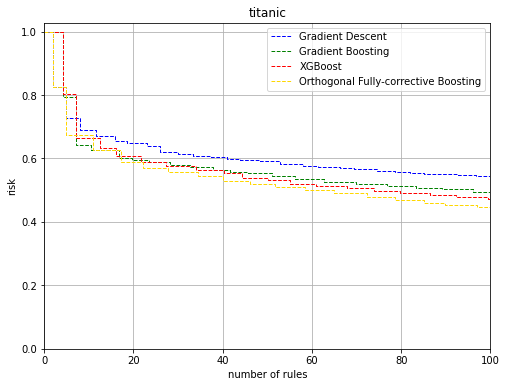

1
mwg boosting  does not exist: 
../experiment_output_20230421greedy/tic-tac-toe/tic-tac-toe_mwg_boosting__realkd_col_10_rep3.txt
mwg boosting  does not exist: 
../experiment_output_20230421greedy/tic-tac-toe/tic-tac-toe_mwg_boosting__realkd_col_10_rep4.txt
[3, 9, 18, 27, 35, 43, 52, 61, 75, 82, 94, 101, 111, 121, 131, 142, 150, 163, 169, 181, 191, 203, 212, 223, 233, 244, 253, 262, 273, 281]
mwg_boosting_: avg train risk: 1.9024918506363588 avg test risk 2.1141852548826 &s: 138.1
gpe boosting  does not exist: 
../experiment_output_20230421greedy/tic-tac-toe/tic-tac-toe_gpe_boosting__realkd_col_10_rep3.txt
gpe boosting  does not exist: 
../experiment_output_20230421greedy/tic-tac-toe/tic-tac-toe_gpe_boosting__realkd_col_10_rep4.txt
[6, 17, 29, 43, 58, 72, 86, 98, 112, 128, 147, 162, 183, 200, 215, 232, 249, 270, 293, 317, 336, 350, 367, 389, 410, 432, 455, 477, 494, 514]
19
gpe_boosting_: avg train risk: 0.9525205691912584 avg test risk 1.1567305355618969 &s: 97.23333333333333
xgb keep

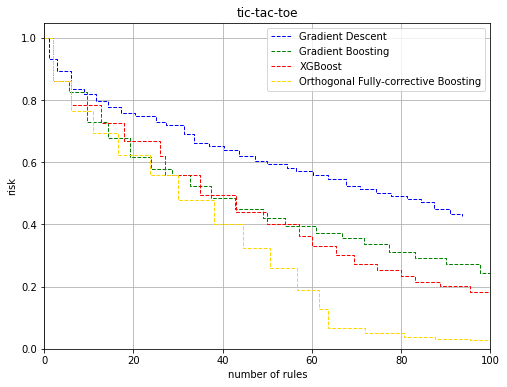

1.0
[10, 30, 35, 47, 70, 82, 107, 124, 149, 159, 177, 194, 215, 234, 254, 278, 298, 320, 337, 362, 384, 403, 421, 441, 463, 487, 505, 522, 541, 561]
26
mwg_boosting_: avg train risk: 0.3817432610920222 avg test risk 0.962485549043096 &s: 131.72
[14, 24, 43, 65, 89, 112, 138, 163, 188, 215, 246, 274, 287, 307, 331, 348, 372, 395, 415, 440, 466, 497, 520, 542, 560, 587, 609, 640, 653, 673]
22
gpe_boosting_: avg train risk: 0.2656710164654598 avg test risk 0.9678351435211383 &s: 118.97999999999999
[17, 39, 51, 69, 87, 101, 127, 147, 161, 181, 198, 216, 241, 253, 274, 292, 307, 325, 350, 374, 391, 410, 431, 454, 475, 494, 516, 533, 555, 577]
26
xgb_keep_: avg train risk: 0.3642711775107945 avg test risk 0.9677939945250937 &s: 139.62
[10, 28, 44, 66, 93, 122, 145, 166, 188, 209, 230, 251, 278, 306, 331, 353, 379, 399, 428, 458, 482, 507, 529, 550, 576, 598, 624, 380, 257, 132]
21
orth_fc_Newton-CG: avg train risk: 0.26051800241020157 avg test risk 1.0280278124507558 &s: 109.46
mwg_boosting_

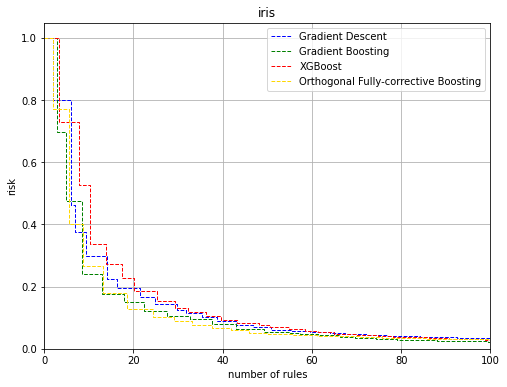

1.0
mwg boosting  does not exist: 
../experiment_output_20230421greedy/breast_cancer/breast_cancer_mwg_boosting__realkd_col_5_rep1.txt
mwg boosting  does not exist: 
../experiment_output_20230421greedy/breast_cancer/breast_cancer_mwg_boosting__realkd_col_5_rep2.txt
mwg boosting  does not exist: 
../experiment_output_20230421greedy/breast_cancer/breast_cancer_mwg_boosting__realkd_col_5_rep3.txt
mwg boosting  does not exist: 
../experiment_output_20230421greedy/breast_cancer/breast_cancer_mwg_boosting__realkd_col_5_rep4.txt
[2, 7, 9, 13, 15, 20, 22, 24, 27, 31, 34, 37, 40, 43, 48, 51, 53, 57, 59, 62, 64, 69, 73, 75, 80, 83, 87, 91, 96, 101]
29
mwg_boosting_: avg train risk: 0.5187295582711646 avg test risk 0.6374390095809371 &s: 147.3
gpe boosting  does not exist: 
../experiment_output_20230421greedy/breast_cancer/breast_cancer_gpe_boosting__realkd_col_5_rep1.txt
gpe boosting  does not exist: 
../experiment_output_20230421greedy/breast_cancer/breast_cancer_gpe_boosting__realkd_col_5_rep2

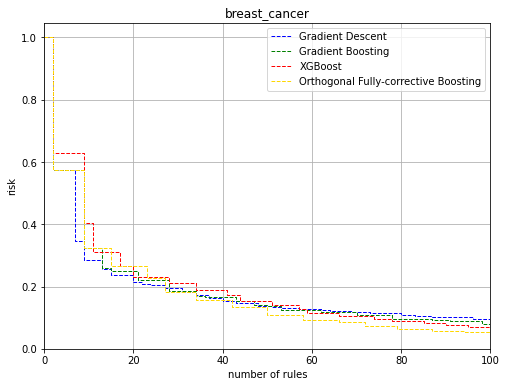

1.0
mwg boosting  does not exist: 
../experiment_output_20230421greedy/load_wine/load_wine_mwg_boosting__realkd_col_6_rep1.txt
mwg boosting  does not exist: 
../experiment_output_20230421greedy/load_wine/load_wine_mwg_boosting__realkd_col_6_rep2.txt
mwg boosting  does not exist: 
../experiment_output_20230421greedy/load_wine/load_wine_mwg_boosting__realkd_col_6_rep3.txt
mwg boosting  does not exist: 
../experiment_output_20230421greedy/load_wine/load_wine_mwg_boosting__realkd_col_6_rep4.txt
[2, 5, 8, 10, 13, 16, 18, 21, 23, 27, 30, 33, 36, 41, 44, 47, 50, 54, 58, 63, 65, 70, 74, 78, 83, 87, 90, 94, 98, 102]
29
mwg_boosting_: avg train risk: 0.21850374840898099 avg test risk 0.9691602324901705 &s: 144.0
gpe boosting  does not exist: 
../experiment_output_20230421greedy/load_wine/load_wine_gpe_boosting__realkd_col_6_rep1.txt
gpe boosting  does not exist: 
../experiment_output_20230421greedy/load_wine/load_wine_gpe_boosting__realkd_col_6_rep2.txt
gpe boosting  does not exist: 
../experime

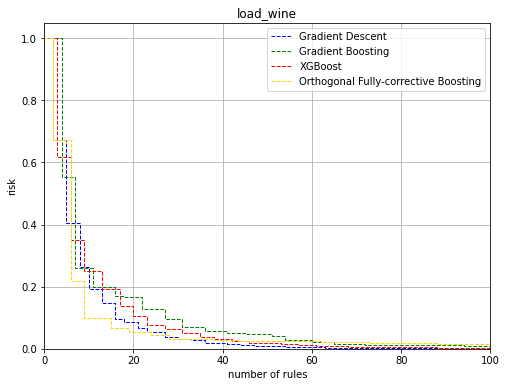

1.0
[5, 15, 20, 30, 40, 50, 57, 67, 76, 86, 96, 104, 113, 125, 134, 143, 154, 162, 171, 181, 193, 205, 214, 226, 237, 249, 262, 273, 289, 298]
mwg_boosting_: avg train risk: 1.6801927920357678 avg test risk 1.7985356929523117 &s: 85.5
[5, 15, 26, 37, 48, 60, 74, 87, 100, 115, 126, 140, 152, 165, 181, 195, 210, 223, 237, 254, 268, 285, 300, 317, 332, 349, 366, 388, 403, 424]
gpe_boosting_: avg train risk: 1.610935918509292 avg test risk 1.8205148875285198 &s: 117.64000000000001
[5, 19, 28, 43, 55, 72, 84, 96, 108, 130, 148, 162, 179, 193, 208, 225, 241, 264, 283, 301, 317, 336, 354, 370, 388, 407, 424, 439, 455, 473]
xgb_keep_: avg train risk: 1.6167446701546608 avg test risk 1.8624696600097217 &s: 136.14000000000001
[5, 15, 27, 45, 58, 75, 94, 109, 123, 143, 164, 181, 197, 217, 236, 254, 271, 289, 305, 328, 349, 368, 386, 408, 430, 453, 470, 492, 511, 526]
28
orth_fc_Newton-CG: avg train risk: 1.534384125391602 avg test risk 1.7678660192957758 &s: 140.06
mwg_boosting_ auc: 0.5535847632

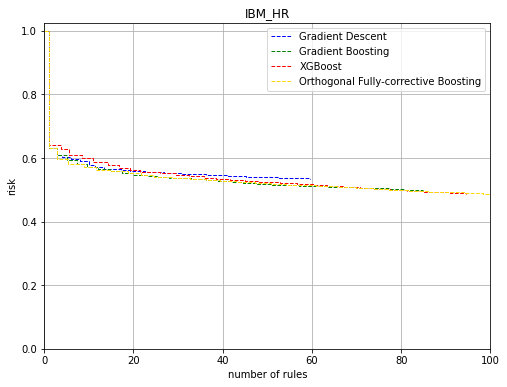

1.0
mwg boosting  does not exist: 
../experiment_output_20230421greedy/telco_churn/telco_churn_mwg_boosting__realkd_col_4_rep1.txt
mwg boosting  does not exist: 
../experiment_output_20230421greedy/telco_churn/telco_churn_mwg_boosting__realkd_col_4_rep2.txt
mwg boosting  does not exist: 
../experiment_output_20230421greedy/telco_churn/telco_churn_mwg_boosting__realkd_col_4_rep3.txt
mwg boosting  does not exist: 
../experiment_output_20230421greedy/telco_churn/telco_churn_mwg_boosting__realkd_col_4_rep4.txt
[1, 4, 7, 10, 14, 16, 18, 21, 25, 29, 32, 38, 42, 46, 50, 53, 58, 60, 63, 67, 69, 73, 76, 80, 86, 89, 92, 96, 100, 103]
28
mwg_boosting_: avg train risk: 1.8860338627327053 avg test risk 1.854550643535474 &s: 141.5
gpe boosting  does not exist: 
../experiment_output_20230421greedy/telco_churn/telco_churn_gpe_boosting__realkd_col_4_rep1.txt
gpe boosting  does not exist: 
../experiment_output_20230421greedy/telco_churn/telco_churn_gpe_boosting__realkd_col_4_rep2.txt
gpe boosting  does 

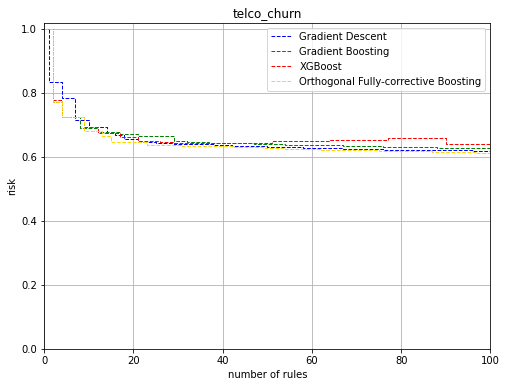

1.0
mwg boosting  does not exist: 
../experiment_output_20230421greedy/GenderRecognition/GenderRecognition_mwg_boosting__realkd_col_3_rep1.txt
mwg boosting  does not exist: 
../experiment_output_20230421greedy/GenderRecognition/GenderRecognition_mwg_boosting__realkd_col_3_rep2.txt
mwg boosting  does not exist: 
../experiment_output_20230421greedy/GenderRecognition/GenderRecognition_mwg_boosting__realkd_col_3_rep3.txt
mwg boosting  does not exist: 
../experiment_output_20230421greedy/GenderRecognition/GenderRecognition_mwg_boosting__realkd_col_3_rep4.txt
[1, 3, 4, 6, 7, 9, 11, 12, 14, 16, 17, 19, 21, 22, 24, 26, 27, 29, 31, 32, 34, 35, 37, 39, 40, 42, 44, 45, 47, 49]
mwg_boosting_: avg train risk: 2.9871684455813394 avg test risk 3.003214658915408 &s: 74.3
gpe boosting  does not exist: 
../experiment_output_20230421greedy/GenderRecognition/GenderRecognition_gpe_boosting__realkd_col_3_rep1.txt
gpe boosting  does not exist: 
../experiment_output_20230421greedy/GenderRecognition/GenderReco

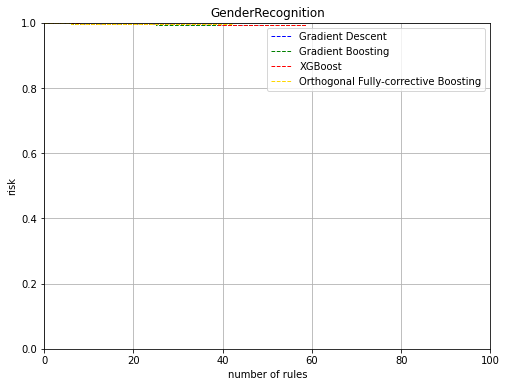

1.0
mwg boosting  does not exist: 
../experiment_output_20230421greedy/banknote/banknote_mwg_boosting__realkd_col_10_rep1.txt
mwg boosting  does not exist: 
../experiment_output_20230421greedy/banknote/banknote_mwg_boosting__realkd_col_10_rep2.txt
mwg boosting  does not exist: 
../experiment_output_20230421greedy/banknote/banknote_mwg_boosting__realkd_col_10_rep3.txt
mwg boosting  does not exist: 
../experiment_output_20230421greedy/banknote/banknote_mwg_boosting__realkd_col_10_rep4.txt
[2, 5, 8, 11, 14, 18, 20, 23, 27, 31, 34, 38, 41, 46, 49, 52, 55, 60, 63, 67, 70, 73, 78, 83, 87, 91, 94, 98, 102, 107]
28
mwg_boosting_: avg train risk: 0.5175521679915122 avg test risk 0.5284525127206459 &s: 144.0
gpe boosting  does not exist: 
../experiment_output_20230421greedy/banknote/banknote_gpe_boosting__realkd_col_10_rep1.txt
gpe boosting  does not exist: 
../experiment_output_20230421greedy/banknote/banknote_gpe_boosting__realkd_col_10_rep2.txt
gpe boosting  does not exist: 
../experiment_out

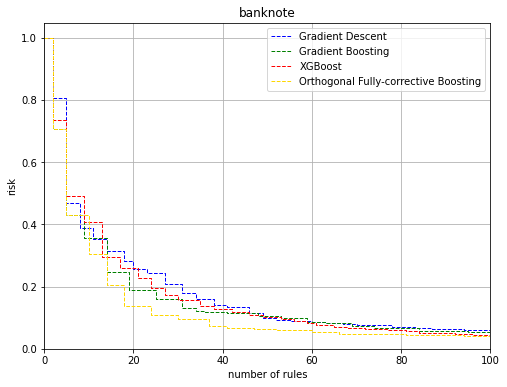

1.0
mwg boosting  does not exist: 
../experiment_output_20230421greedy/liver/liver_mwg_boosting__realkd_col_10_rep1.txt
mwg boosting  does not exist: 
../experiment_output_20230421greedy/liver/liver_mwg_boosting__realkd_col_10_rep2.txt
mwg boosting  does not exist: 
../experiment_output_20230421greedy/liver/liver_mwg_boosting__realkd_col_10_rep3.txt
mwg boosting  does not exist: 
../experiment_output_20230421greedy/liver/liver_mwg_boosting__realkd_col_10_rep4.txt
[2, 5, 8, 12, 15, 18, 21, 24, 29, 35, 38, 42, 46, 51, 54, 57, 61, 68, 73, 76, 78, 82, 86, 90, 92, 98, 102, 107, 113, 118]
26
mwg_boosting_: avg train risk: 1.942429611746622 avg test risk 2.409965096290493 &s: 136.3
gpe boosting  does not exist: 
../experiment_output_20230421greedy/liver/liver_gpe_boosting__realkd_col_10_rep1.txt
gpe boosting  does not exist: 
../experiment_output_20230421greedy/liver/liver_gpe_boosting__realkd_col_10_rep2.txt
gpe boosting  does not exist: 
../experiment_output_20230421greedy/liver/liver_gpe_b

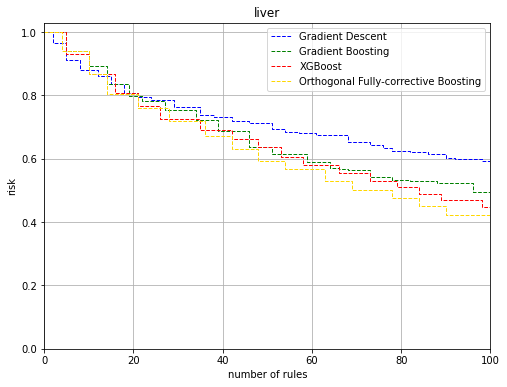

1.0
mwg boosting  does not exist: 
../experiment_output_20230421greedy/magic/magic_mwg_boosting__realkd_col_5_rep1.txt
mwg boosting  does not exist: 
../experiment_output_20230421greedy/magic/magic_mwg_boosting__realkd_col_5_rep2.txt
mwg boosting  does not exist: 
../experiment_output_20230421greedy/magic/magic_mwg_boosting__realkd_col_5_rep3.txt
mwg boosting  does not exist: 
../experiment_output_20230421greedy/magic/magic_mwg_boosting__realkd_col_5_rep4.txt
[2, 4, 7, 10, 13, 16, 19, 21, 24, 27, 30, 34, 36, 40, 44, 47, 51, 56, 58, 61, 66, 69, 72, 76, 77, 82, 84, 87, 91, 97]
mwg_boosting_: avg train risk: 2.0794811824083665 avg test risk 2.0213512851355384 &s: 140.1
gpe boosting  does not exist: 
../experiment_output_20230421greedy/magic/magic_gpe_boosting__realkd_col_5_rep1.txt
gpe boosting  does not exist: 
../experiment_output_20230421greedy/magic/magic_gpe_boosting__realkd_col_5_rep2.txt
gpe boosting  does not exist: 
../experiment_output_20230421greedy/magic/magic_gpe_boosting__re

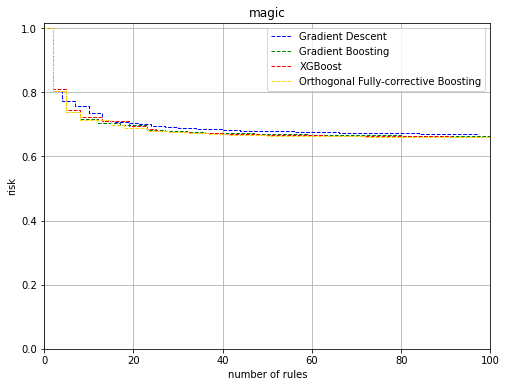

1.0
mwg boosting  does not exist: 
../experiment_output_20230421greedy/adult/adult_mwg_boosting__realkd_col_5_rep1.txt
mwg boosting  does not exist: 
../experiment_output_20230421greedy/adult/adult_mwg_boosting__realkd_col_5_rep2.txt
mwg boosting  does not exist: 
../experiment_output_20230421greedy/adult/adult_mwg_boosting__realkd_col_5_rep3.txt
mwg boosting  does not exist: 
../experiment_output_20230421greedy/adult/adult_mwg_boosting__realkd_col_5_rep4.txt
[1, 3, 5, 8, 11, 13, 16, 18, 23, 26, 28, 31, 35, 38, 41, 44, 45, 48, 50, 54, 57, 62, 66, 69, 72, 75, 77, 79, 83, 87]
mwg_boosting_: avg train risk: 1.7247884381488112 avg test risk 1.7554192380040212 &s: 126.5
gpe boosting  does not exist: 
../experiment_output_20230421greedy/adult/adult_gpe_boosting__realkd_col_5_rep1.txt
gpe boosting  does not exist: 
../experiment_output_20230421greedy/adult/adult_gpe_boosting__realkd_col_5_rep2.txt
gpe boosting  does not exist: 
../experiment_output_20230421greedy/adult/adult_gpe_boosting__rea

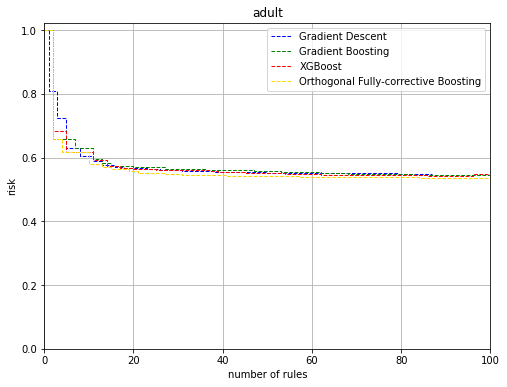

1.0
mwg boosting  does not exist: 
../experiment_output_20230421greedy/digits5/digits5_mwg_boosting__realkd_col_3_rep1.txt
mwg boosting  does not exist: 
../experiment_output_20230421greedy/digits5/digits5_mwg_boosting__realkd_col_3_rep2.txt
mwg boosting  does not exist: 
../experiment_output_20230421greedy/digits5/digits5_mwg_boosting__realkd_col_3_rep3.txt
mwg boosting  does not exist: 
../experiment_output_20230421greedy/digits5/digits5_mwg_boosting__realkd_col_3_rep4.txt
[1, 3, 4, 6, 7, 9, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 37, 39, 40, 42, 44, 46, 49, 51, 52, 55]
mwg_boosting_: avg train risk: 0.933918966606049 avg test risk 0.9344110514954913 &s: 80.7
gpe boosting  does not exist: 
../experiment_output_20230421greedy/digits5/digits5_gpe_boosting__realkd_col_3_rep1.txt
gpe boosting  does not exist: 
../experiment_output_20230421greedy/digits5/digits5_gpe_boosting__realkd_col_3_rep2.txt
gpe boosting  does not exist: 
../experiment_output_20230421greedy/digits5/d

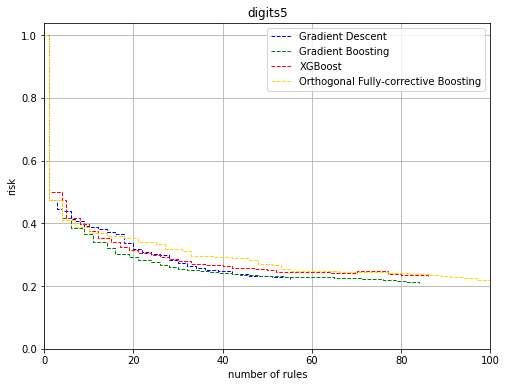

322646873.58870494
[5, 17, 25, 38, 48, 61, 72, 86, 99, 116, 131, 145, 164, 179, 193, 207, 221, 239, 259, 274, 290, 308, 327, 348, 366, 379, 402, 414, 426, 443]
mwg_boosting_: avg train risk: 0.328352056225675 avg test risk 0.3049539287687295 &s: 125.64000000000001
[10, 25, 37, 52, 69, 91, 113, 132, 153, 176, 203, 238, 270, 292, 316, 346, 378, 410, 439, 471, 493, 522, 552, 586, 620, 651, 678, 705, 740, 770]
21
gpe_boosting_: avg train risk: 0.20858445030867356 avg test risk 0.2075380713415984 &s: 104.72
[10, 25, 45, 64, 74, 95, 110, 151, 188, 224, 255, 283, 317, 348, 382, 411, 446, 482, 515, 543, 577, 615, 649, 682, 717, 749, 781, 820, 859, 895]
18
xgb_keep_: avg train risk: 0.18253421030276928 avg test risk 0.19143772741283815 &s: 88.5
[10, 20, 35, 43, 52, 68, 104, 129, 165, 196, 234, 269, 298, 334, 373, 409, 445, 486, 520, 558, 592, 496, 256, 0, 0, 0, 0, 0, 0, 0]
18
orth_fc_Newton-CG: avg train risk: 0.1658596060919805 avg test risk 0.18164470293426574 &s: 83.8
mwg_boosting_ auc: 0.10

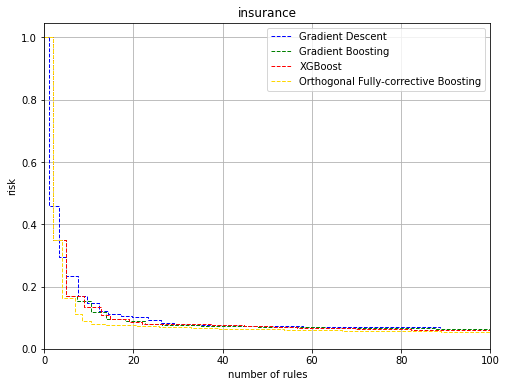

226.89125115757616
[5, 15, 25, 35, 45, 55, 65, 76, 87, 100, 112, 125, 138, 155, 172, 187, 200, 216, 230, 246, 259, 277, 293, 306, 325, 339, 361, 374, 389, 408]
mwg_boosting_: avg train risk: 0.14160138168633313 avg test risk 0.15622566462390147 &s: 112.4
[5, 22, 39, 56, 74, 98, 113, 127, 140, 161, 182, 195, 218, 230, 250, 269, 294, 322, 348, 372, 394, 425, 452, 472, 498, 519, 546, 565, 603, 624]
25
gpe_boosting_: avg train risk: 0.12172749737126935 avg test risk 0.15236813993059126 &s: 125.5
[5, 23, 39, 54, 72, 98, 126, 158, 188, 222, 256, 289, 325, 363, 400, 436, 475, 511, 543, 579, 617, 654, 691, 725, 762, 800, 838, 874, 908, 945]
17
xgb_keep_: avg train risk: 0.08451118072837607 avg test risk 0.1091099963487377 &s: 80.8
[5, 19, 34, 51, 69, 96, 128, 163, 197, 228, 264, 294, 328, 366, 400, 429, 465, 500, 533, 571, 609, 250, 0, 0, 0, 0, 0, 0, 0, 0]
17
orth_fc_Newton-CG: avg train risk: 0.07996901864220227 avg test risk 0.10435005222264097 &s: 80.72
mwg_boosting_ auc: 0.0537664306306598

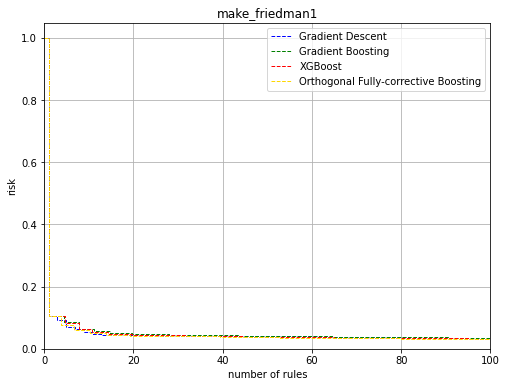

379683.4049960418
[5, 19, 31, 45, 57, 70, 80, 93, 108, 121, 134, 155, 168, 183, 196, 210, 228, 239, 256, 267, 284, 297, 315, 330, 343, 360, 372, 387, 404, 423]
mwg_boosting_: avg train risk: 0.16106348201882104 avg test risk 0.16474167149653313 &s: 123.6
[15, 25, 40, 60, 75, 98, 121, 135, 153, 172, 191, 210, 229, 245, 265, 287, 313, 334, 356, 374, 399, 416, 436, 454, 477, 502, 522, 548, 575, 607]
25
gpe_boosting_: avg train risk: 0.11516564747397214 avg test risk 0.11703142201629102 &s: 127.64000000000001
[15, 25, 48, 63, 79, 95, 116, 133, 150, 170, 186, 203, 219, 240, 261, 288, 310, 333, 357, 386, 416, 444, 474, 508, 537, 571, 600, 625, 661, 692]
23
xgb_keep_: avg train risk: 0.10441780184605101 avg test risk 0.10674250076428478 &s: 110.38
[15, 30, 40, 50, 65, 87, 110, 127, 144, 162, 187, 209, 238, 266, 291, 317, 349, 386, 418, 446, 471, 500, 533, 560, 588, 623, 388, 132, 0, 0]
21
orth_fc_Newton-CG: avg train risk: 0.08166407877672972 avg test risk 0.08390640145130246 &s: 98.16
mwg_bo

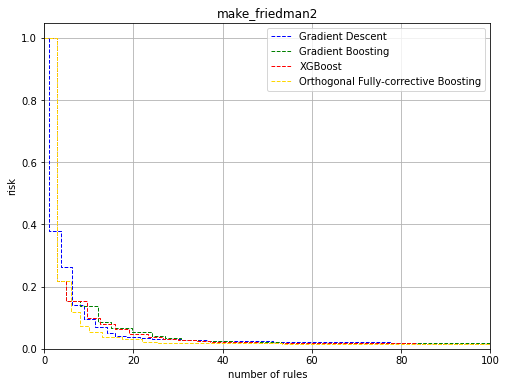

1.8780821278399789
[5, 19, 33, 48, 61, 76, 90, 106, 123, 139, 157, 171, 190, 201, 219, 230, 250, 262, 281, 294, 310, 329, 346, 361, 374, 392, 408, 428, 442, 460]
mwg_boosting_: avg train risk: 0.06384929601495229 avg test risk 0.06992432091171927 &s: 136.1
[5, 25, 41, 58, 74, 91, 109, 128, 146, 167, 188, 215, 250, 279, 309, 334, 357, 396, 419, 442, 470, 504, 535, 568, 602, 630, 660, 689, 716, 747]
21
gpe_boosting_: avg train risk: 0.04461497018772079 avg test risk 0.0537246010068412 &s: 100.14
[5, 25, 42, 60, 82, 108, 131, 157, 181, 205, 233, 259, 283, 316, 344, 376, 403, 436, 464, 499, 529, 558, 587, 617, 650, 679, 708, 739, 768, 803]
20
xgb_keep_: avg train risk: 0.040704160813799205 avg test risk 0.05235417420782468 &s: 102.75999999999999
[5, 22, 39, 57, 74, 95, 115, 143, 170, 195, 225, 252, 283, 314, 338, 366, 397, 425, 457, 487, 517, 544, 576, 607, 374, 259, 0, 0, 0, 0]
20
orth_fc_Newton-CG: avg train risk: 0.038375630167461566 avg test risk 0.050689559956520094 &s: 99.52000000000

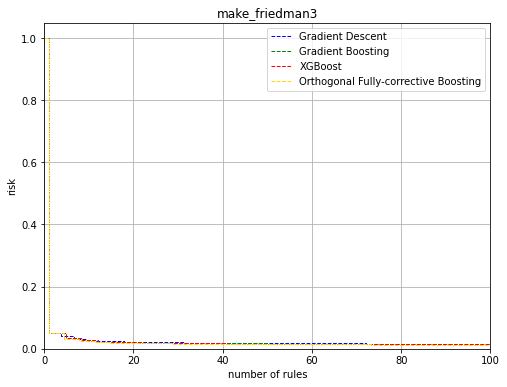

2029057842.6515312
[5, 22, 34, 46, 62, 78, 92, 111, 124, 147, 162, 191, 214, 230, 249, 268, 291, 311, 328, 351, 375, 392, 410, 426, 446, 459, 483, 504, 526, 543]
27
mwg_boosting_: avg train risk: 0.941121466899334 avg test risk 0.9894380884800679 &s: 136.22
[5, 36, 51, 78, 89, 117, 131, 156, 188, 215, 243, 263, 291, 318, 352, 380, 410, 443, 469, 500, 527, 557, 589, 617, 647, 672, 705, 744, 775, 803]
19
gpe_boosting_: avg train risk: 0.6415013337811164 avg test risk 0.7375130042449792 &s: 94.7
[5, 36, 51, 73, 105, 135, 159, 178, 207, 235, 263, 294, 324, 357, 387, 418, 447, 470, 503, 526, 558, 591, 629, 661, 693, 726, 757, 791, 823, 856]
18
xgb_keep_: avg train risk: 0.5864510991768552 avg test risk 0.6985438750293107 &s: 92.94
[5, 32, 51, 71, 101, 122, 143, 172, 199, 225, 254, 283, 309, 335, 362, 391, 416, 450, 480, 503, 531, 562, 595, 626, 389, 0, 0, 0, 0, 0]
19
orth_fc_Newton-CG: avg train risk: 0.5930490257550256 avg test risk 0.7519322980890691 &s: 98.08
mwg_boosting_ auc: 0.3402729

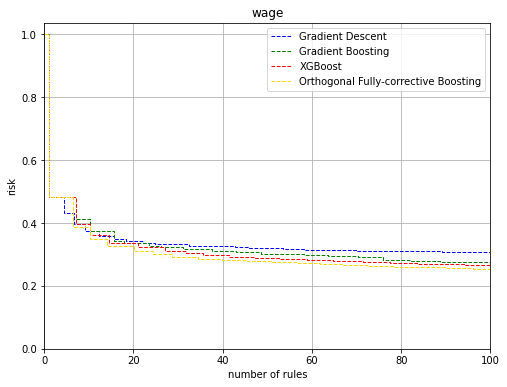

31.64835409252669
[5, 15, 20, 30, 35, 45, 50, 64, 69, 79, 89, 99, 110, 119, 131, 139, 149, 157, 169, 176, 187, 197, 208, 220, 233, 243, 251, 263, 274, 282]
mwg_boosting_: avg train risk: 0.5934021568193419 avg test risk 0.6015002638952797 &s: 82.16
[5, 15, 25, 36, 53, 70, 80, 95, 108, 121, 138, 154, 171, 189, 204, 221, 234, 247, 265, 277, 292, 303, 320, 338, 354, 372, 386, 402, 415, 432]
gpe_boosting_: avg train risk: 0.5860628065379927 avg test risk 0.6007668008701943 &s: 126.44000000000001
[5, 15, 25, 36, 54, 70, 81, 95, 112, 129, 146, 167, 184, 200, 221, 236, 254, 273, 290, 306, 324, 341, 359, 378, 394, 409, 423, 440, 457, 474]
xgb_keep_: avg train risk: 0.5852601884307409 avg test risk 0.6025754855450305 &s: 137.95999999999998
[5, 15, 25, 35, 54, 67, 82, 97, 117, 138, 159, 179, 196, 214, 231, 248, 269, 287, 305, 324, 342, 362, 384, 400, 418, 438, 455, 475, 490, 510]
29
orth_fc_Newton-CG: avg train risk: 0.5812269952823501 avg test risk 0.600263355500651 &s: 146.42000000000002
mwg_b

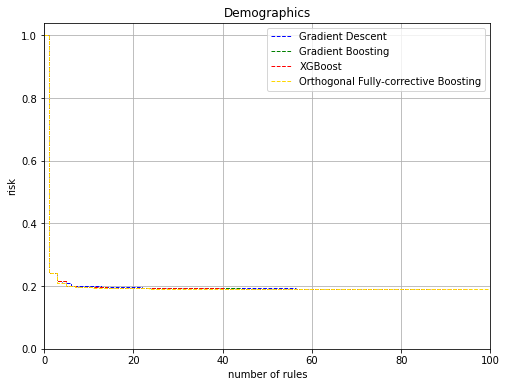

43.986571428571416
[5, 15, 25, 37, 48, 62, 73, 87, 99, 113, 124, 137, 149, 161, 173, 185, 197, 209, 221, 234, 245, 258, 271, 283, 295, 307, 320, 330, 344, 355]
mwg_boosting_: avg train risk: 0.011868101980768847 avg test risk 0.015204297855026503 &s: 107.24000000000001
[5, 15, 25, 37, 52, 65, 78, 91, 105, 119, 132, 145, 159, 173, 184, 194, 204, 215, 227, 237, 249, 258, 269, 279, 289, 298, 307, 316, 325, 334]
gpe_boosting_: avg train risk: 0.0115716222834177 avg test risk 0.015373416679845129 &s: 107.72
[5, 15, 25, 40, 54, 68, 80, 90, 104, 118, 132, 145, 158, 169, 182, 193, 206, 220, 232, 244, 257, 269, 280, 292, 303, 314, 325, 336, 347, 358]
xgb_keep_: avg train risk: 0.011519607252140506 avg test risk 0.015213880180096442 &s: 111.22
[5, 15, 28, 42, 56, 67, 79, 94, 107, 122, 135, 140, 154, 165, 178, 190, 202, 215, 228, 243, 257, 269, 284, 298, 310, 323, 335, 349, 361, 375]
orth_fc_Newton-CG: avg train risk: 0.011035632447909293 avg test risk 0.014967440466104754 &s: 112.52000000000001


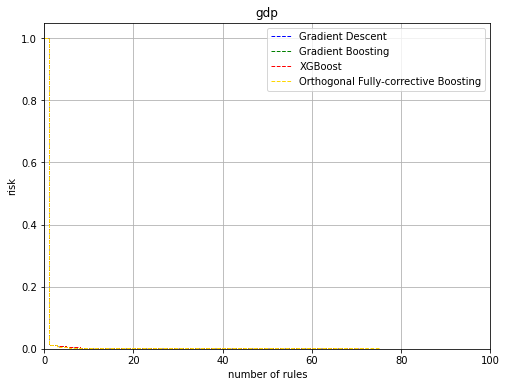

1.0269587154562938
[15, 30, 44, 59, 78, 93, 106, 123, 139, 152, 169, 186, 202, 214, 231, 245, 267, 283, 303, 323, 343, 354, 365, 385, 400, 419, 431, 447, 463, 476]
mwg_boosting_: avg train risk: 0.4894368834656363 avg test risk 0.5501918614015388 &s: 146.9
[15, 30, 49, 65, 83, 106, 128, 145, 170, 195, 215, 237, 259, 278, 300, 331, 348, 372, 400, 424, 453, 475, 502, 525, 549, 577, 608, 630, 655, 678]
22
gpe_boosting_: avg train risk: 0.3616755454306634 avg test risk 0.3959731569384827 &s: 111.6
[18, 33, 53, 77, 97, 113, 138, 159, 181, 206, 227, 248, 274, 296, 319, 340, 365, 388, 413, 441, 469, 496, 525, 550, 576, 600, 629, 656, 683, 708]
22
xgb_keep_: avg train risk: 0.33525784655841356 avg test risk 0.3774340692118177 &s: 117.52000000000001
[18, 33, 52, 74, 89, 108, 123, 142, 165, 189, 215, 227, 243, 260, 286, 306, 327, 352, 379, 398, 417, 446, 472, 496, 520, 546, 575, 600, 627, 378]
24
orth_fc_Newton-CG: avg train risk: 0.29929831971917226 avg test risk 0.34646484502587227 &s: 126.740

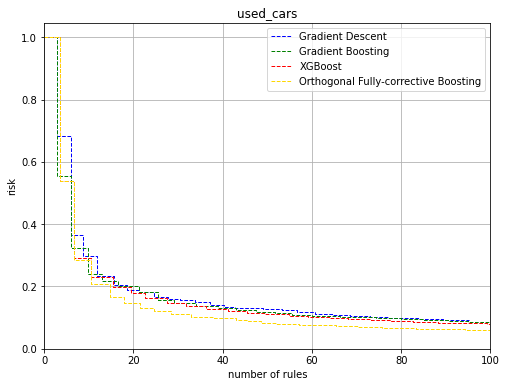

29074.481900452487
[5, 16, 26, 37, 51, 62, 80, 91, 105, 121, 134, 147, 159, 173, 189, 207, 225, 241, 258, 270, 287, 300, 316, 330, 349, 367, 386, 402, 417, 430]
mwg_boosting_: avg train risk: 0.33892035916608476 avg test risk 0.38107194308110426 &s: 123.62
[5, 23, 39, 54, 77, 89, 102, 130, 147, 171, 196, 222, 242, 265, 289, 315, 334, 358, 384, 413, 434, 457, 475, 504, 540, 562, 594, 618, 640, 669]
23
gpe_boosting_: avg train risk: 0.25628552336496035 avg test risk 0.31746452175036277 &s: 114.5
[5, 24, 39, 66, 87, 121, 151, 177, 208, 241, 273, 305, 342, 377, 408, 443, 471, 504, 531, 561, 599, 625, 655, 689, 721, 753, 784, 819, 854, 888]
17
xgb_keep_: avg train risk: 0.1903126382987442 avg test risk 0.253566849759315 &s: 84.84
[5, 21, 33, 52, 80, 116, 145, 169, 198, 232, 260, 292, 324, 359, 386, 420, 455, 488, 520, 551, 585, 488, 385, 0, 0, 0, 0, 0, 0, 0]
18
orth_fc_Newton-CG: avg train risk: 0.18929658654711493 avg test risk 0.28367646252702816 &s: 91.1
mwg_boosting_ auc: 0.118393306469

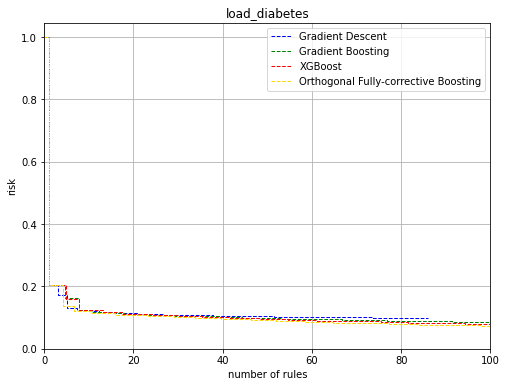

592.1469169960473
[5, 18, 25, 36, 45, 61, 74, 87, 103, 116, 128, 142, 159, 171, 187, 205, 219, 238, 255, 269, 282, 298, 313, 333, 345, 360, 380, 396, 415, 432]
mwg_boosting_: avg train risk: 0.1945938354132239 avg test risk 0.17077979224660508 &s: 121.94000000000001
[5, 25, 42, 58, 81, 106, 122, 145, 164, 182, 208, 223, 243, 261, 287, 309, 328, 351, 376, 389, 418, 437, 459, 479, 496, 523, 552, 587, 610, 634]
25
gpe_boosting_: avg train risk: 0.15333242055653626 avg test risk 0.1740466532637655 &s: 134.34
[5, 22, 44, 73, 91, 115, 138, 162, 184, 205, 233, 257, 283, 311, 341, 370, 401, 427, 460, 490, 518, 546, 575, 605, 631, 660, 685, 716, 738, 765]
20
xgb_keep_: avg train risk: 0.12100501769633291 avg test risk 0.13937280373585495 &s: 102.6
[5, 21, 46, 66, 93, 115, 141, 167, 187, 215, 241, 277, 300, 328, 357, 380, 407, 434, 462, 491, 515, 544, 574, 471, 494, 251, 128, 0, 0, 0]
20
orth_fc_Newton-CG: avg train risk: 0.11261967826582653 avg test risk 0.14135071319992878 &s: 104.96
mwg_boost

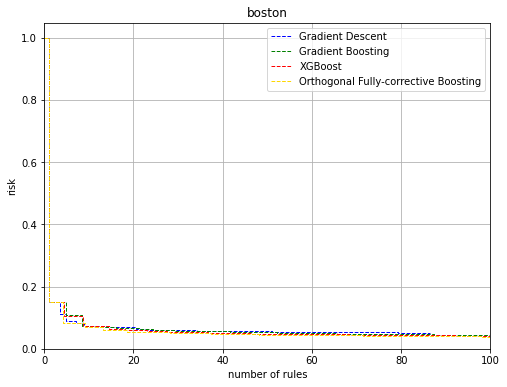

30.46778212179487
[5, 18, 29, 43, 55, 66, 80, 94, 108, 126, 140, 164, 176, 196, 216, 234, 256, 278, 297, 318, 333, 358, 377, 396, 420, 442, 463, 485, 505, 525]
28
mwg_boosting_: avg train risk: 0.026215500072588112 avg test risk 0.03670248256297897 &s: 133.56
[5, 21, 37, 61, 79, 101, 117, 135, 151, 167, 194, 217, 240, 266, 292, 316, 340, 364, 388, 410, 438, 468, 494, 518, 540, 564, 589, 616, 643, 671]
23
gpe_boosting_: avg train risk: 0.01946105877116299 avg test risk 0.04170496464111273 &s: 116.38
[5, 30, 46, 72, 96, 123, 159, 191, 221, 247, 277, 306, 340, 367, 393, 418, 446, 474, 505, 534, 567, 593, 627, 662, 690, 722, 750, 780, 808, 834]
18
xgb_keep_: avg train risk: 0.015207447975283842 avg test risk 0.034317726932113844 &s: 94.32000000000001
[5, 25, 45, 59, 82, 116, 147, 181, 214, 243, 265, 297, 324, 349, 389, 414, 444, 470, 498, 528, 556, 586, 615, 254, 0, 0, 0, 0, 0, 0]
19
orth_fc_Newton-CG: avg train risk: 0.01322709358290402 avg test risk 0.03237149551722379 &s: 101.9
mwg_boos

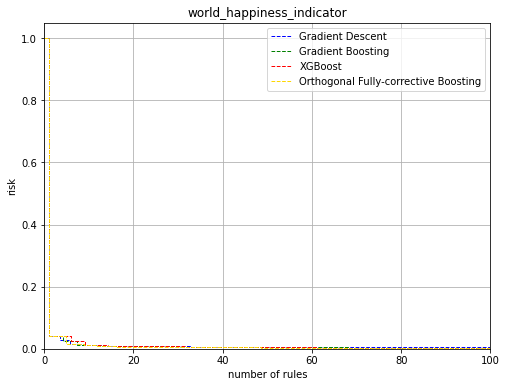

4882.764241803283
mwg boosting  does not exist: 
../experiment_output_20230421greedy/who_life_expectancy/who_life_expectancy_mwg_boosting__realkd_col_5_rep1.txt
mwg boosting  does not exist: 
../experiment_output_20230421greedy/who_life_expectancy/who_life_expectancy_mwg_boosting__realkd_col_5_rep2.txt
mwg boosting  does not exist: 
../experiment_output_20230421greedy/who_life_expectancy/who_life_expectancy_mwg_boosting__realkd_col_5_rep3.txt
mwg boosting  does not exist: 
../experiment_output_20230421greedy/who_life_expectancy/who_life_expectancy_mwg_boosting__realkd_col_5_rep4.txt
[1, 4, 5, 8, 10, 12, 15, 17, 21, 24, 26, 30, 34, 37, 40, 43, 46, 49, 52, 57, 59, 63, 67, 70, 74, 77, 80, 85, 88, 93]
mwg_boosting_: avg train risk: 0.015992831392402006 avg test risk 0.018483295866068273 &s: 128.7
gpe boosting  does not exist: 
../experiment_output_20230421greedy/who_life_expectancy/who_life_expectancy_gpe_boosting__realkd_col_5_rep1.txt
gpe boosting  does not exist: 
../experiment_output_2

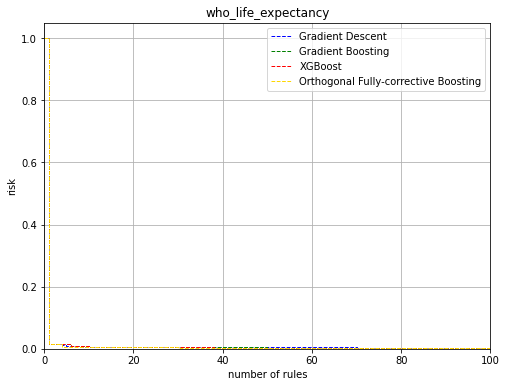

3.5
mwg boosting  does not exist: 
../experiment_output_20230421greedy/mobile_prices/mobile_prices_mwg_boosting__realkd_col_4_rep1.txt
mwg boosting  does not exist: 
../experiment_output_20230421greedy/mobile_prices/mobile_prices_mwg_boosting__realkd_col_4_rep2.txt
mwg boosting  does not exist: 
../experiment_output_20230421greedy/mobile_prices/mobile_prices_mwg_boosting__realkd_col_4_rep3.txt
mwg boosting  does not exist: 
../experiment_output_20230421greedy/mobile_prices/mobile_prices_mwg_boosting__realkd_col_4_rep4.txt
[1, 3, 5, 7, 9, 11, 13, 15, 18, 21, 24, 26, 30, 33, 37, 41, 44, 49, 52, 55, 56, 59, 63, 67, 71, 74, 79, 82, 85, 88]
mwg_boosting_: avg train risk: 0.32660023032131075 avg test risk 0.34506685390378944 &s: 121.8
gpe boosting  does not exist: 
../experiment_output_20230421greedy/mobile_prices/mobile_prices_gpe_boosting__realkd_col_4_rep1.txt
gpe boosting  does not exist: 
../experiment_output_20230421greedy/mobile_prices/mobile_prices_gpe_boosting__realkd_col_4_rep2.txt

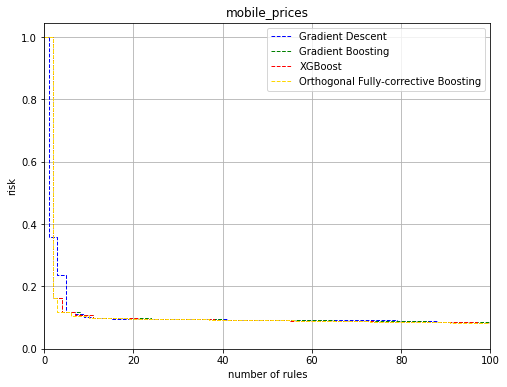

523.7783290690134
mwg boosting  does not exist: 
../experiment_output_20230421greedy/suicide_rates_cleaned/suicide_rates_cleaned_mwg_boosting__realkd_col_3_rep1.txt
mwg boosting  does not exist: 
../experiment_output_20230421greedy/suicide_rates_cleaned/suicide_rates_cleaned_mwg_boosting__realkd_col_3_rep2.txt
mwg boosting  does not exist: 
../experiment_output_20230421greedy/suicide_rates_cleaned/suicide_rates_cleaned_mwg_boosting__realkd_col_3_rep3.txt
mwg boosting  does not exist: 
../experiment_output_20230421greedy/suicide_rates_cleaned/suicide_rates_cleaned_mwg_boosting__realkd_col_3_rep4.txt
[1, 3, 4, 6, 7, 9, 10, 12, 13, 15, 18, 20, 21, 24, 26, 27, 30, 31, 33, 34, 37, 39, 40, 43, 45, 48, 49, 51, 52, 55]
mwg_boosting_: avg train risk: 1.5982901426194895 avg test risk 1.532976225509798 &s: 80.3
gpe boosting  does not exist: 
../experiment_output_20230421greedy/suicide_rates_cleaned/suicide_rates_cleaned_gpe_boosting__realkd_col_3_rep1.txt
gpe boosting  does not exist: 
../experim

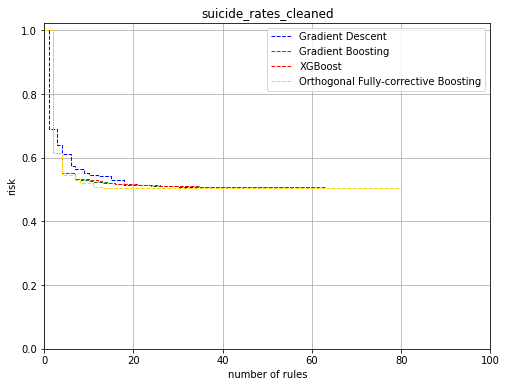

2.70680865164444
mwg boosting  does not exist: 
../experiment_output_20230421greedy/videogamesales/videogamesales_mwg_boosting__realkd_col_3_rep1.txt
mwg boosting  does not exist: 
../experiment_output_20230421greedy/videogamesales/videogamesales_mwg_boosting__realkd_col_3_rep2.txt
mwg boosting  does not exist: 
../experiment_output_20230421greedy/videogamesales/videogamesales_mwg_boosting__realkd_col_3_rep3.txt
mwg boosting  does not exist: 
../experiment_output_20230421greedy/videogamesales/videogamesales_mwg_boosting__realkd_col_3_rep4.txt
[1, 3, 4, 6, 7, 9, 10, 12, 13, 16, 18, 21, 23, 25, 26, 29, 31, 34, 36, 39, 41, 44, 46, 47, 48, 49, 50, 51, 52, 53]
mwg_boosting_: avg train risk: 2.856253910945527 avg test risk 2.1413956093377524 &s: 84.4
gpe boosting  does not exist: 
../experiment_output_20230421greedy/videogamesales/videogamesales_gpe_boosting__realkd_col_3_rep1.txt
gpe boosting  does not exist: 
../experiment_output_20230421greedy/videogamesales/videogamesales_gpe_boosting__r

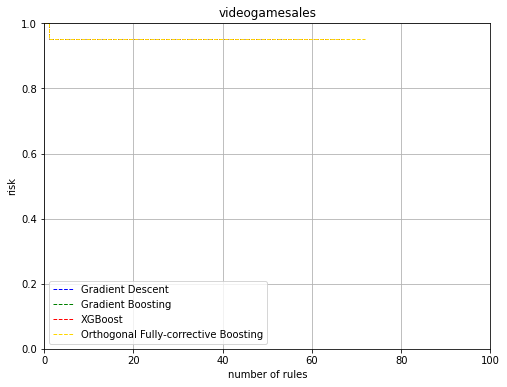

32.41651031894934
[5, 15, 25, 35, 45, 55, 70, 82, 98, 112, 129, 146, 162, 176, 193, 208, 226, 242, 261, 273, 292, 301, 322, 337, 353, 368, 380, 398, 413, 428]
mwg_boosting_: avg train risk: 0.04324441910380368 avg test risk 0.044061393463677996 &s: 123.0
[5, 21, 39, 51, 73, 103, 123, 145, 166, 177, 197, 213, 233, 262, 286, 318, 341, 371, 397, 415, 435, 461, 484, 514, 535, 561, 594, 625, 658, 691]
23
gpe_boosting_: avg train risk: 0.03432455836721404 avg test risk 0.03740931760433121 &s: 116.6
[5, 22, 36, 63, 90, 125, 159, 191, 221, 254, 290, 320, 345, 375, 410, 447, 484, 519, 552, 593, 628, 667, 703, 740, 773, 814, 852, 890, 923, 955]
17
xgb_keep_: avg train risk: 0.025236270798585946 avg test risk 0.02847625537843119 &s: 87.12
[5, 20, 39, 57, 82, 112, 145, 189, 220, 250, 285, 320, 352, 380, 420, 438, 477, 519, 553, 588, 366, 251, 0, 0, 0, 0, 0, 0, 0, 0]
17
orth_fc_Newton-CG: avg train risk: 0.024797606336943438 avg test risk 0.027554835108993987 &s: 86.2
mwg_boosting_ auc: 0.024018611

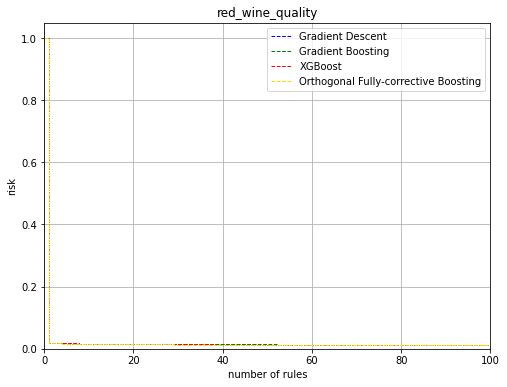

51.62076805721374
[14, 27, 38, 48, 65, 71, 84, 94, 106, 120, 134, 146, 164, 179, 192, 204, 221, 235, 252, 264, 279, 291, 305, 320, 338, 353, 368, 388, 403, 416]
mwg_boosting_: avg train risk: 0.23344322511045545 avg test risk 0.24972543587959337 &s: 122.38
[12, 22, 35, 53, 68, 81, 98, 119, 136, 156, 172, 191, 205, 223, 239, 259, 275, 295, 311, 328, 343, 363, 380, 397, 415, 430, 449, 464, 480, 497]
gpe_boosting_: avg train risk: 0.20491322992973168 avg test risk 0.20659993654871345 &s: 149.92000000000002
[13, 25, 37, 54, 72, 84, 95, 109, 127, 146, 160, 175, 190, 207, 225, 243, 262, 278, 294, 309, 327, 343, 362, 379, 393, 409, 427, 441, 459, 477]
xgb_keep_: avg train risk: 0.678067449269071 avg test risk 0.7030494545562156 &s: 142.44
[13, 28, 38, 51, 65, 84, 101, 117, 132, 147, 163, 184, 202, 218, 239, 255, 272, 290, 308, 324, 342, 358, 377, 392, 406, 419, 437, 452, 472, 485]
orth_fc_Newton-CG: avg train risk: 0.18905654318630138 avg test risk 0.2073280129387553 &s: 147.42000000000002
mw

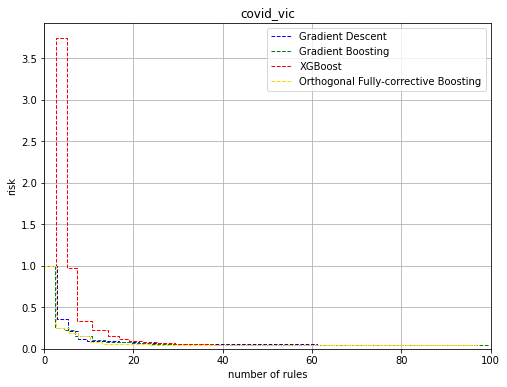

1082.8170359400497
[8, 23, 36, 49, 66, 77, 93, 107, 124, 137, 152, 167, 184, 199, 215, 231, 249, 264, 281, 297, 309, 323, 337, 351, 369, 382, 399, 414, 430, 444]
mwg_boosting_: avg train risk: 0.8769714938172806 avg test risk 1.2312812968764058 &s: 134.34
[21, 36, 56, 73, 92, 111, 133, 151, 170, 191, 213, 233, 254, 272, 289, 312, 329, 348, 366, 386, 403, 425, 443, 463, 481, 500, 517, 534, 551, 566]
25
gpe_boosting_: avg train risk: 0.7529762973123993 avg test risk 1.0816202548479545 &s: 135.02
[18, 36, 54, 72, 89, 103, 119, 135, 152, 170, 187, 206, 225, 245, 265, 283, 302, 320, 340, 357, 376, 398, 416, 434, 457, 475, 493, 510, 528, 546]
27
xgb_keep_: avg train risk: 4.407362111083385 avg test risk 6.353006274925875 &s: 144.74
[18, 33, 52, 70, 89, 111, 132, 152, 171, 192, 209, 225, 241, 260, 276, 293, 309, 330, 347, 364, 379, 396, 413, 428, 446, 462, 468, 486, 503, 522]
28
orth_fc_Newton-CG: avg train risk: 0.7571969488073317 avg test risk 1.2720740596514866 &s: 157.1
mwg_boosting_ auc:

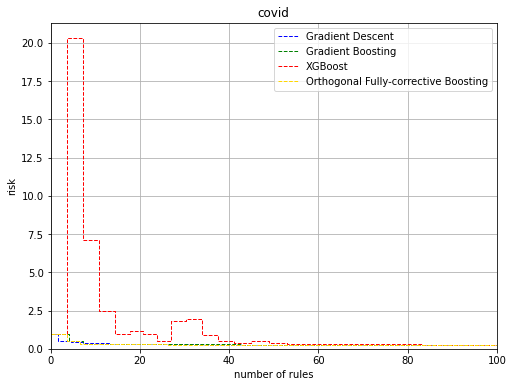

1076.416963882381
[16, 27, 43, 50, 64, 75, 89, 101, 116, 130, 148, 165, 181, 198, 214, 231, 246, 261, 282, 296, 316, 332, 347, 367, 388, 409, 431, 445, 462, 478]
mwg_boosting_: avg train risk: 0.774083753239513 avg test risk 1.0344571368607096 &s: 138.16
[19, 36, 57, 82, 103, 126, 155, 175, 197, 223, 247, 264, 287, 307, 326, 346, 373, 397, 418, 443, 470, 497, 519, 544, 568, 593, 616, 639, 669, 692]
22
gpe_boosting_: avg train risk: 0.43513793948917334 avg test risk 0.9665279618262279 &s: 121.34
[22, 38, 54, 76, 97, 116, 145, 168, 187, 210, 236, 260, 284, 309, 332, 356, 382, 405, 430, 453, 480, 508, 531, 556, 581, 607, 632, 655, 679, 705]
21
xgb_keep_: avg train risk: 0.3856329573637353 avg test risk 0.8507596675384956 &s: 110.96
[22, 38, 59, 83, 109, 132, 157, 184, 205, 227, 250, 273, 297, 322, 346, 369, 395, 421, 440, 464, 487, 506, 529, 557, 580, 606, 501, 520, 129, 137]
21
orth_fc_Newton-CG: avg train risk: 0.3415927477938531 avg test risk 0.9508855649107757 &s: 115.72
mwg_boosting_

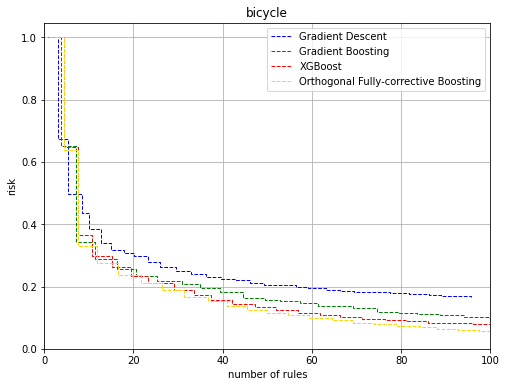

12.342277392898044
[10, 20, 34, 47, 67, 85, 104, 116, 135, 147, 167, 180, 197, 209, 227, 240, 254, 267, 285, 304, 321, 335, 354, 371, 389, 407, 425, 447, 465, 484]
mwg_boosting_: avg train risk: 0.2694413792192027 avg test risk 0.5852020431264036 &s: 141.85999999999999
[15, 29, 45, 64, 81, 95, 112, 135, 155, 180, 197, 214, 243, 260, 278, 297, 318, 338, 361, 378, 400, 419, 437, 456, 479, 497, 519, 541, 560, 583]
26
gpe_boosting_: avg train risk: 0.17373968700046755 avg test risk 1.6923824178053954 &s: 140.04000000000002
[15, 33, 50, 65, 80, 96, 112, 132, 146, 163, 176, 190, 206, 227, 243, 263, 282, 295, 314, 329, 349, 367, 385, 408, 430, 447, 464, 485, 506, 528]
28
xgb_keep_: avg train risk: 125.4928706837915 avg test risk 165.51493493032933 &s: 145.16
[15, 33, 53, 71, 93, 114, 133, 152, 169, 191, 208, 228, 246, 266, 287, 306, 325, 348, 370, 389, 409, 427, 445, 464, 480, 497, 514, 519, 538, 553]
26
orth_fc_Newton-CG: avg train risk: 0.1123510180584432 avg test risk 17129676.26692442 &s:

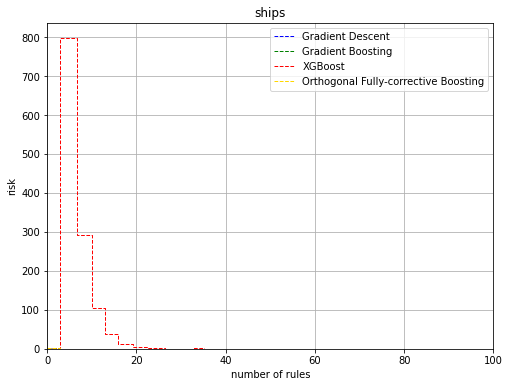

7.500299349437478
[10, 21, 32, 44, 57, 69, 79, 92, 104, 115, 125, 136, 148, 160, 173, 185, 196, 205, 220, 234, 250, 263, 275, 287, 298, 311, 325, 339, 354, 369]
mwg_boosting_: avg train risk: 0.18119154053532532 avg test risk 0.25229350749930174 &s: 109.52000000000001
[10, 20, 35, 53, 70, 89, 103, 120, 135, 151, 167, 184, 200, 220, 237, 257, 271, 289, 305, 319, 334, 355, 373, 389, 406, 427, 445, 466, 485, 504]
29
gpe_boosting_: avg train risk: 0.1417594236604797 avg test risk 0.4184457741088865 &s: 148.38
[10, 19, 30, 42, 55, 69, 88, 106, 125, 142, 159, 178, 196, 212, 227, 242, 258, 278, 296, 317, 335, 353, 371, 387, 407, 426, 444, 462, 479, 497]
xgb_keep_: avg train risk: 0.2909644123143355 avg test risk 0.613031425990528 &s: 144.2
[10, 20, 34, 49, 65, 81, 98, 115, 131, 148, 167, 187, 206, 227, 246, 264, 282, 301, 319, 337, 355, 372, 390, 406, 420, 438, 452, 469, 483, 501]
29
orth_fc_Newton-CG: avg train risk: 0.10154000672879768 avg test risk 0.39889569822761495 &s: 151.4599999999999

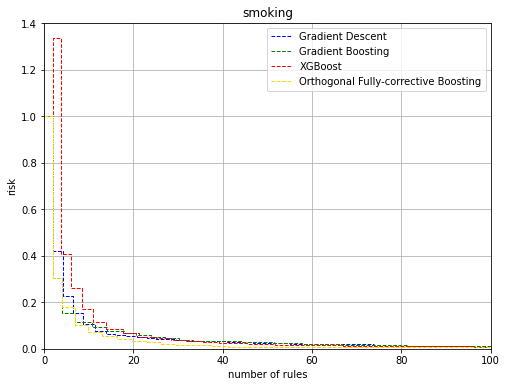

done


In [75]:
datasets = ['titanic','tic-tac-toe','iris','breast_cancer','load_wine',
            'IBM_HR', 'telco_churn', 'GenderRecognition',
            'banknote', 'liver', 'magic', 'adult', 'digits5',
            'insurance','make_friedman1',
            'make_friedman2','make_friedman3','wage', 'Demographics','gdp','used_cars','load_diabetes',
            'boston','world_happiness_indicator', 'who_life_expectancy', 'mobile_prices', 'suicide_rates_cleaned','videogamesales',
             'red_wine_quality',
            'covid_vic','covid',
            'bicycle','ships','smoking']

values = [
    'mwg_boosting_',
    'gpe_boosting_', 
    'xgb_keep_', 
    'orth_fc_Newton-CG']
print(len(datasets))
cols = [10, 10, 10, 5, 6, 
        3, 4, 3, 10, 10, 5, 5, 3,
        10, 4, 10, 10, 10,
       2, 20, 10, 5, 4, 10, 5, 4, 3, 3, 5,
        10, 10, 10, 10, 10]
max_components = [100] * len(datasets)
# max_components[5]=20
f = open("../analysis_results/compare_test.csv", 'w')
f2 = open("../analysis_results/compare_train.csv", 'w')
f.write('dataset'+(','+','.join(values))*4+'\n')
for i in range(len(datasets)):
#     try:
        max_risk = get_max_risk(datasets[i])
        train, test, ands, aucs_tr, aucs_te = compare_risks(datasets[i], col=cols[i], max_length=max_components[i])
        gpe_orth_test = largest_gaps(test, ands, 'gpe_boosting_', 'orth_fc_Newton-CG')
        xgb_orth_test = largest_gaps(test, ands, 'xgb_keep_', 'orth_fc_Newton-CG')
        orth_gpe_test = largest_gaps(test, ands, 'orth_fc_Newton-CG', 'gpe_boosting_')
        orth_xgb_test = largest_gaps(test, ands, 'orth_fc_Newton-CG', 'xgb_keep_')
        orth_mwg_test = largest_gaps(test, ands, 'orth_fc_Newton-CG', 'mwg_boosting_')
        mwg_orth_test = largest_gaps(test, ands, 'mwg_boosting_', 'orth_fc_Newton-CG')
        gpe_orth_train = largest_gaps(train, ands, 'gpe_boosting_', 'orth_fc_Newton-CG')
        xgb_orth_train = largest_gaps(train, ands, 'xgb_keep_', 'orth_fc_Newton-CG')
        orth_gpe_train = largest_gaps(train, ands, 'orth_fc_Newton-CG', 'gpe_boosting_')
        orth_xgb_train = largest_gaps(train, ands, 'orth_fc_Newton-CG', 'xgb_keep_')
        orth_mwg_train = largest_gaps(train, ands, 'orth_fc_Newton-CG', 'mwg_boosting_')
        mwg_orth_train = largest_gaps(train, ands, 'mwg_boosting_', 'orth_fc_Newton-CG')
        
        f.write(datasets[i] + ',')
        for value in values:
            f.write(str(max(ands[value]))+',')
        for value in values:
            f.write(str(aucs_te[value])+',')
        f.write(str(mwg_orth_test[0])+','+str(mwg_orth_test[1])+','+str(mwg_orth_test[2])+','+str(mwg_orth_test[3])+',')
        f.write(str(gpe_orth_test[0])+','+str(gpe_orth_test[1])+','+str(gpe_orth_test[2])+','+str(gpe_orth_test[3])+',')
        f.write(str(xgb_orth_test[0])+','+str(xgb_orth_test[1])+','+str(xgb_orth_test[2])+','+str(xgb_orth_test[3])+',')
        f.write(str(orth_mwg_test[0])+','+str(orth_mwg_test[1])+','+str(orth_mwg_test[2])+','+str(orth_mwg_test[3])+',')
        f.write(str(orth_gpe_test[0])+','+str(orth_gpe_test[1])+','+str(orth_gpe_test[2])+','+str(orth_gpe_test[3])+',')
        f.write(str(orth_xgb_test[0])+','+str(orth_xgb_test[1])+','+str(orth_xgb_test[2])+','+str(orth_xgb_test[3])+',')
        f.write('\n')
        
        f2.write(datasets[i] + ',')
        for value in values:
            f2.write(str(max(ands[value]))+',')
        for value in values:
            f2.write(str(aucs_tr[value])+',')
        f2.write(str(mwg_orth_train[0])+','+str(mwg_orth_train[1])+','+str(mwg_orth_train[2])+','+str(mwg_orth_train[3])+',')
        f2.write(str(gpe_orth_train[0])+','+str(gpe_orth_train[1])+','+str(gpe_orth_train[2])+','+str(gpe_orth_train[3])+',')
        f2.write(str(xgb_orth_train[0])+','+str(xgb_orth_train[1])+','+str(xgb_orth_train[2])+','+str(xgb_orth_train[3])+',')
        f2.write(str(orth_mwg_train[0])+','+str(orth_mwg_train[1])+','+str(orth_mwg_train[2])+','+str(orth_mwg_train[3])+',')
        f2.write(str(orth_gpe_train[0])+','+str(orth_gpe_train[1])+','+str(orth_gpe_train[2])+','+str(orth_gpe_train[3])+',')
        f2.write(str(orth_xgb_train[0])+','+str(orth_xgb_train[1])+','+str(orth_xgb_train[2])+','+str(orth_xgb_train[3])+',')
        f2.write('\n')

f.close()
f2.close()
print('done')

Ablation study:

    GB -> FCGB -> Greedy FCOGB -> Optimal FCOGB

In [12]:
from matplotlib import pyplot as plt
from random import random

def compare4(dataset_name, max_risk=1, repeat=5, col=10, 
            max_length=30, title=None):
    test_risks={}
    train_risks={}
    and_counts={}
    aucs_test={}
    file_numbers={}
    desc=dataset_name
    max_risk=get_max_risk(dataset_name)
    print(max_risk)
    searches=['greedy', 'exhaustive']
    for search in searches:
        location='../experiment_output_'+search
        objs = ['mwg','gpe','orth']
        for obj in objs:
            algos = ['fc'] if obj=='orth' else ['boosting', 'fc'] if obj in ['gpe'] else ['keep']
            for algo in algos:
                methods = ['Newton-CG'] if algo=='fc' else ['']
                for method in methods:
                    done = True
                    fc_train=[0]*10
                    fc_test=[0]*10
                    ands = [0]*10
                    file_number=0
                    for i in range(repeat):
                        filename = dataset_name + '_' + obj + '_' + algo + '_' + method + '_realkd_col_' + \
                            str(col) + '_rep' + str(i) + '.txt'
                        try:
                            f = open(location+'/'+dataset_name+'/'+filename, 'r')
                            file_number+=1
                        except:
                            continue
                        j=-1
                        for line in f:
                            if 'iteration ' in line:
                                j+=1
                            if j>=10:
                                break
                            words=line.split(' ')
                            if 'fc train risk' in line:
                                fc_train[j] += float(words[-1])
                            elif 'fc test risk' in line:
                                fc_test[j] += float(words[-1])
                            if 'if' in line:
                                ands[j]+=line.count('=')+1
                    if done:
                        file_numbers[search+'_'+obj + '_' + algo + '_' + method] = file_number
                        train_risks[search+'_'+obj + '_' + algo + '_' + method]=fc_train
                        test_risks[search+'_'+obj + '_' + algo + '_' + method]=fc_test
                        and_counts[search+'_'+obj + '_' + algo + '_' + method]=ands
                        if file_number==0:
                            continue
                        print(obj + '_' + algo + '_' + method+': avg train risk:',sum(fc_train)/10/max_risk/file_number, 
                              'avg test risk', sum(fc_test)/10/max_risk/file_number, '&s:', sum(ands)/10/file_number)

    rg=list(range(1,11))
    plt.figure(figsize=(8,6))
    colours = {}
    line_width = {}
    width = [1,1, 1, 1]*4
    i = 0
    colors=['blue','green','red','deepskyblue','gold','violet','cyan','brown','deepskyblue','purple', 'lime',
            'slategray','magenta','pink','olive','khaki']
    label_map={'greedy_gpe_boosting_':'Gradient Boosting', 'greedy_gpe_fc_Newton-CG': 'Gradient Fully-corrective Boosting', 
               'greedy_orth_fc_Newton-CG': 'Greedy Orthogonal Fully-corrective Boosting', 'xgb_keep_': 'XGBoost', 
              'xgb_fc_Newton-CG': 'XG Fully-corrective Boosting', 'exhaustive_gpe_boosting_':'Optimal Gradient Boosting', 
               'exhaustive_gpe_fc_Newton-CG': 'Optimal Gradient Fully-corrective Boosting',
               'exhaustive_orth_fc_Newton-CG': 'Optimal Orthogonal Fully-corrective Boosting',
               'greedy_mwg_boosting_':'Gradient Descent',
               'exhaustive_mwg_boosting_': 'Optimal Gradient Descent',
               'greedy_mwg_fc_Newton-CG':'FC Gradient Descent',
               'exhaustive_mwg_fc_Newton-CG': 'Optimal FC Gradient Descent',
              }
    for item in train_risks:
        color = colors[i]
        colours[item] = color
        line_width[item] = width[i]
        i+=1
        if file_numbers[item]==0:
            continue
        train_risks[item] = [risk / max_risk/file_numbers[item] for risk in train_risks[item]]
        test_risks[item] = [risk / max_risk/file_numbers[item] for risk in test_risks[item]]
        and_counts[item] = [ands / file_numbers[item] for ands in and_counts[item]]
        aucs_test[item] = and_counts[item][0]+sum((test_risks[item][m])*
                                             (min(max_length, and_counts[item][m+1])-
                                                                   min(max_length, and_counts[item][m]))
                                for m in range(len(test_risks[item])-1))
        aucs_train[item] = and_counts[item][0]+sum((train_risks[item][m])*
                                             (min(max_length, and_counts[item][m+1])-
                                                                   min(max_length, and_counts[item][m]))
                                for m in range(len(train_risks[item])-1))
        if and_counts[item][-1]<max_length:
            aucs_test[item]+=test_risks[item][-1]*(max_length-and_counts[item][-1])
            aucs_train[item]+=train_risks[item][-1]*(max_length-and_counts[item][-1])
        print(item, 'auc:', aucs_test[item])
        plt.step([0]+and_counts[item], [1]+train_risks[item], '--', color=colours[item],
                 label=label_map[item],linewidth=line_width[item],where='post')
    plt.title(dataset_name if title is None else title + " risks")
    plt.xlabel('number of rules')
    plt.xlim(0,30)
    plt.ylabel('risk')
    plt.yscale('log')
    plt.grid(visible=True, which='major')
    plt.grid(visible=True, which='minor')
    plt.gca().set_ylim(bottom=0)
    plt.legend()
    
    return train_risks, test_risks, and_counts, aucs_test, aucs_train


The next three functions computes the largest gaps from one algorithm to another.

In [13]:
def map_size_risk(train_risks, sizes):
    risks = [1]
    szs = [0]
    sz = 0
    for i in range(len(sizes)):
        while sz<=sizes[i]:
            sz+=0.2
            szs.append(sz)
            if i==0:
                risk=1
            else:
                risk=train_risks[i-1]
            risks.append(risk)
    return risks, szs


def largest_gaps(train_risks, and_counts, a, b, max_size=150):
    risks_a, szs_a = map_size_risk(train_risks[a], and_counts[a])
    risks_b, szs_b = map_size_risk(train_risks[b], and_counts[b])
    max_risk_index_ab = -1000
    max_diff=-100
    for i in range(min([len(szs_a), len(szs_b), max_size])):
        if i <= 25:
            continue
        if risks_a[i]!=1 and risks_b[i]!=1:
            if risks_a[i]-risks_b[i]>max_diff:
                max_risk_index_ab=i
                max_diff = risks_a[i]-risks_b[i]
    print(max_risk_index_ab)
    print(risks_a[max_risk_index_ab], risks_b[max_risk_index_ab])
    return risks_a[max_risk_index_ab]-risks_b[max_risk_index_ab], szs_a[max_risk_index_ab], risks_a[max_risk_index_ab], risks_b[max_risk_index_ab], max_risk_index_ab


def internal_steps(train_risks, and_counts, a, b, max_risk_index_ab):
    risks_a, szs_a = map_size_risk(train_risks[a], and_counts[a])
    risks_b, szs_b = map_size_risk(train_risks[b], and_counts[b])
    return  risks_a[max_risk_index_ab]-risks_b[max_risk_index_ab], szs_a[max_risk_index_ab], risks_a[max_risk_index_ab], risks_b[max_risk_index_ab]

In [16]:
values = ['greedy_gpe_boosting_', 
          'greedy_gpe_fc_Newton-CG', 
              'greedy_orth_fc_Newton-CG', 
               'exhaustive_orth_fc_Newton-CG',
          'exhaustive_gpe_boosting_',
         ]
datasets = ['titanic','tic-tac-toe','iris','breast_cancer',
            'IBM_HR', 'telco_churn', 'GenderRecognition',
            'banknote', 'liver', 'magic', 'adult', 'digits5',
            'insurance','make_friedman1',
            'make_friedman2','make_friedman3','wage', 'Demographics','gdp','used_cars','load_diabetes',
            'boston','world_happiness_indicator', 'who_life_expectancy', 'mobile_prices', 'suicide_rates_cleaned',
            'videogamesales', 'red_wine_quality',
            'covid_vic','covid',
            'bicycle','ships','smoking']
cols = [10, 10, 10, 5, 
        3, 4, 3, 10, 10, 5, 5, 3,
        10, 4, 10, 10, 10,
       2, 20, 10, 5, 4, 10, 5, 4, 3, 3, 5,
        10, 10, 10, 10, 10]
print(len(cols))
datapoints = [891,958,150,569,178,1470, 7043, 3168, 1372, 345, 19020, 30162, 5620,
              1338,1000,5000,2000,1379,8992,35,1770,442,506,156, 2928, 2000, 27820, 16598, 1599, 
              85,225,122,34,36]

max_components = [30] * len(datasets)
max_components[11]=25
max_components[12]=25
f = open("../analysis_results/ablation_te.csv", 'w')
f.write('dataset'+(','+','.join(values))*4+'\n')
f2 = open("../analysis_results/ablation_tr.csv", 'w')
f2.write('dataset'+(','+','.join(values))*4+'\n')
for i in range(len(datasets)):
    try:
        print(datasets[i])
        max_risk = get_max_risk(datasets[i])
        train, test, ands, aucs_te, aucs_tr = compare4(datasets[i], col=cols[i], max_length=max_components[i])
        gpe_orth_test = largest_gaps(test, ands, 'exhaustive_gpe_boosting_', 'exhaustive_orth_fc_Newton-CG')
        orth_gpe_test = largest_gaps(test, ands, 'exhaustive_orth_fc_Newton-CG', 'exhaustive_gpe_boosting_')
        gpe_fc_test = internal_steps(test, ands, 'exhaustive_gpe_boosting_', 'greedy_gpe_fc_Newton-CG', gpe_orth[4])
        fc_gpe_test = internal_steps(test, ands, 'greedy_gpe_fc_Newton-CG', 'exhaustive_gpe_boosting_', orth_gpe_test[4])
        fc_orth_test = internal_steps(test, ands, 'greedy_gpe_fc_Newton-CG', 'greedy_orth_fc_Newton-CG', gpe_orth[4])
        orth_fc_test = internal_steps(test, ands, 'greedy_orth_fc_Newton-CG', 'greedy_gpe_fc_Newton-CG', orth_gpe_test[4])
        greedy_opt_test = internal_steps(test, ands, 'greedy_orth_fc_Newton-CG', 'exhaustive_orth_fc_Newton-CG', gpe_orth[4])
        opt_greedy_test = internal_steps(test, ands, 'exhaustive_orth_fc_Newton-CG', 'greedy_orth_fc_Newton-CG', orth_gpe_test[4])
        
        f.write(datasets[i] + ',')
        for value in values:
            f.write(str(max(ands[value]))+',')
        for value in values:
            f.write(str(aucs_te[value])+',')
        f.write(str(gpe_fc_test[0])+','+str(gpe_fc_test[1])+','+str(gpe_fc_test[2])+','+str(gpe_fc_test[3])+',')
        f.write(str(fc_gpe_test[0])+','+str(fc_gpe_test[1])+','+str(fc_gpe_test[2])+','+str(fc_gpe_test[3])+',')
        f.write(str(fc_orth_test[0])+','+str(fc_orth_test[1])+','+str(fc_orth_test[2])+','+str(fc_orth_test[3])+',')
        f.write(str(orth_fc_test[0])+','+str(orth_fc_test[1])+','+str(orth_fc_test[2])+','+str(orth_fc_test[3])+',')
        f.write(str(greedy_opt_test[0])+','+str(greedy_opt_test[1])+','+str(greedy_opt_test[2])+','+str(greedy_opt_test[3])+',')
        f.write(str(opt_greedy_test[0])+','+str(opt_greedy_test[1])+','+str(opt_greedy_test[2])+','+str(opt_greedy_test[3])+',')
        f.write(str(gpe_orth[0])+','+str(gpe_orth[1])+','+str(gpe_orth[2])+','+str(gpe_orth[3])+',')
        f.write(str(orth_gpe_test[0])+','+str(orth_gpe_test[1])+','+str(orth_gpe_test[2])+','+str(orth_gpe_test[3])+',')
        f.write('\n')
        
        gpe_orth_train = largest_gaps(train, ands, 'exhaustive_gpe_boosting_', 'exhaustive_orth_fc_Newton-CG')
        orth_gpe_train = largest_gaps(train, ands, 'exhaustive_orth_fc_Newton-CG', 'exhaustive_gpe_boosting_')
        gpe_fc_train = internal_steps(train, ands, 'exhaustive_gpe_boosting_', 'greedy_gpe_fc_Newton-CG', gpe_orth[4])
        fc_gpe_train = internal_steps(train, ands, 'greedy_gpe_fc_Newton-CG', 'exhaustive_gpe_boosting_', orth_gpe_train[4])
        fc_orth_train = internal_steps(train, ands, 'greedy_gpe_fc_Newton-CG', 'greedy_orth_fc_Newton-CG', gpe_orth[4])
        orth_fc_train = internal_steps(train, ands, 'greedy_orth_fc_Newton-CG', 'greedy_gpe_fc_Newton-CG', orth_gpe_train[4])
        greedy_opt_train = internal_steps(train, ands, 'greedy_orth_fc_Newton-CG', 'exhaustive_orth_fc_Newton-CG', gpe_orth[4])
        opt_greedy_train = internal_steps(train, ands, 'exhaustive_orth_fc_Newton-CG', 'greedy_orth_fc_Newton-CG', orth_gpe_train[4])
        
        f2.write(datasets[i] + ',')
        for value in values:
            f2.write(str(max(ands[value]))+',')
        for value in values:
            f2.write(str(aucs_te[value])+',')
        f2.write(str(gpe_fc_train[0])+','+str(gpe_fc_train[1])+','+str(gpe_fc_train[2])+','+str(gpe_fc_train[3])+',')
        f2.write(str(fc_gpe_train[0])+','+str(fc_gpe_train[1])+','+str(fc_gpe_train[2])+','+str(fc_gpe_train[3])+',')
        f2.write(str(fc_orth_train[0])+','+str(fc_orth_train[1])+','+str(fc_orth_train[2])+','+str(fc_orth_train[3])+',')
        f2.write(str(orth_fc_train[0])+','+str(orth_fc_train[1])+','+str(orth_fc_train[2])+','+str(orth_fc_train[3])+',')
        f2.write(str(greedy_opt_train[0])+','+str(greedy_opt_train[1])+','+str(greedy_opt_train[2])+','+str(greedy_opt_train[3])+',')
        f2.write(str(opt_greedy_train[0])+','+str(opt_greedy_train[1])+','+str(opt_greedy_train[2])+','+str(opt_greedy_train[3])+',')
        f2.write(str(gpe_orth[0])+','+str(gpe_orth[1])+','+str(gpe_orth[2])+','+str(gpe_orth[3])+',')
        f2.write(str(orth_gpe_train[0])+','+str(orth_gpe_train[1])+','+str(orth_gpe_train[2])+','+str(orth_gpe_train[3])+',')
        f2.write('\n')

    except:
        continue
f.close()
print('done')

33
titanic
1.0
gpe_boosting_: avg train risk: 0.6118282572937578 avg test risk 0.6903799959890116 &s: 22.22
gpe_fc_Newton-CG: avg train risk: 0.6119285414269393 avg test risk 0.6906056313509659 &s: 21.880000000000003
orth_fc_Newton-CG: avg train risk: 0.6105959684846738 avg test risk 0.7186830683975195 &s: 21.6
gpe_boosting_: avg train risk: 0.5901303876115521 avg test risk 0.6967930638888309 &s: 27.3
gpe_fc_Newton-CG: avg train risk: 0.5880366491430367 avg test risk 0.7008725524869737 &s: 27.619999999999997
orth_fc_Newton-CG: avg train risk: 0.5940096769179378 avg test risk 0.7060952812311686 &s: 25.76
tic-tac-toe
1
gpe_boosting_: avg train risk: 0.6351372504701496 avg test risk 0.7192877625452025 &s: 22.6
gpe_fc_Newton-CG: avg train risk: 0.6290305795924229 avg test risk 0.7109624035401794 &s: 23.880000000000003
orth_fc_Newton-CG: avg train risk: 0.614342265613755 avg test risk 0.7102513097695653 &s: 24.4
gpe_boosting_: avg train risk: 0.5397645161218193 avg test risk 0.5833655812165

orth_fc_Newton-CG: avg train risk: 0.014982576616962734 avg test risk 0.015753890433513225 &s: 14.2
gpe_boosting_: avg train risk: 0.014951822549859075 avg test risk 0.016302923778737002 &s: 20.5
gpe_fc_Newton-CG: avg train risk: 0.01472388525709281 avg test risk 0.01647363482212914 &s: 24.3
orth_fc_Newton-CG: avg train risk: 0.01480847683596378 avg test risk 0.015467038970163688 &s: 22.380000000000003
covid_vic
51.62076805721374
gpe_boosting_: avg train risk: 0.11463357278118995 avg test risk 0.11263060516476828 &s: 15.6
gpe_fc_Newton-CG: avg train risk: 0.10357588818625314 avg test risk 0.10720302607276233 &s: 15.24
orth_fc_Newton-CG: avg train risk: 0.09974235460862203 avg test risk 0.1049463173461432 &s: 13.780000000000001
gpe_boosting_: avg train risk: 0.11307162110142277 avg test risk 0.10581011837941634 &s: 16.240000000000002
gpe_fc_Newton-CG: avg train risk: 0.10395835665151036 avg test risk 0.10410631891355408 &s: 16.32
orth_fc_Newton-CG: avg train risk: 0.10122063082559463 av

/tmp/ipykernel_12401/3624857710.py:60: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

The next cell contains information copied from "../analysis_results/ablation.csv"

In [17]:
sobc_s_tr=[ 0.647235376, 0.730860317, 0.799414394, 0.347304187, 1, 0.60229175, 0.834034523, 0.99982025, 0.257477808, 0.759072711, 0.755666211, 0.809681325, 0.438306947, 0.293338496, 0.092480269, 0.377630939, 0.040842982, 0.43344679, 0.210060048, 0.008228215, 0.433511162, 0.172192669, 0.111879207, 0.027924789, 0.01063357, 0.358464174, 0.691383103, 0.952094529, 0.018361956, 0.353681493, 0.432556002, 0.495503794, 0.460797543, 0.421743923]
xobc_x_tr=[ 1, 0.560237926, 0.728851218, 0.40520651, 0.613777952, 0.629428953, 0.673028883, 0.996569179, 0.259545887, 0.600584726, 0.708955965, 0.683441837, 0.473827881, 0.350132077, 0.10580903, 0.153170807, 0.051921184, 0.484284884, 0.215529506, 0.008031839, 0.206621583, 0.20383851, 0.149077556, 0.040584198, 0.015813397, 0.162821205, 0.530081995, 0.952094533, 0.017201019, 0.365765398, ]
gobc_g_tr=[ 1, 0.492682531, 0.670668727, 0.19118436, 1, 0.609348418, 0.735775967, 0.998151977, 0.320473543, 1, 0.715826599, 0.629694074, 0.398863006, 0.350132077, 0.10580903, 0.153170792, 0.051921184, 0.484284884, 0.215529516, 0.008031822, 0.206621571, 0.20383851, 0.149077556, 0.040584198, 0.015813397, 0.162821205, 0.53008201, 0.952094529, 0.017201052, 0.165515112, 0.28398386, 0.330820569, 0.130630112, 0.152859071  ]
gfbc_g_tr=[ 0.794661558, 0.492682531, 0.670668727, 0.215761049, 0.609348418, 0.735775967, 0.998151977, 0.320473543, 0.841522206, 0.715826599, 0.629694074, 0.398863006, 0.350132077, 0.10580903, 0.153170792, 0.051921184, 0.484284884, 0.215529516, 0.008031822, 0.206621571, 0.20383851, 0.149077556, 0.040584198, 0.015813397, 0.162821205, 0.53008201, 0.952094529, 0.017201052, 0.165515112, 0.308996779, 0.330820569, 0.130630112, 0.152859071 ]
fgbc_f_tr=[ 0.794662531, 0.570573263, 0.478697855, 0.201786961, 0.580021799, 0.698593022, 0.998191972, 0.23567532, 0.825106961, 0.713285564, 0.629692538, 0.361739604, 0.350132077, 0.10580903, 0.086118576, 0.051921184, 0.484284884, 0.208662265, 0.005552462, 0.188293139, 0.20383851, 0.149077556, 0.022943698, 0.015813397, 0.162821205, 0.521696382, 0.952047056, 0.017291532, 0.089921624, 0.308369857, 0.287241492, 0.056498644, 0.152859071 ]
gebc_g_tr=[ 0.794662531, 0.553749789, 0.465179226, 0.195002628, 0.580020478, 0.683925933, 0.998191972, 0.340477057, 0.823494155, 0.713285564, 0.569870414, 0.361739604, 0.164425321, 0.075347718, 0.074919173, 0.032447574, 0.314408263, 0.208662265, 0.004592891, 0.111950602, 0.143378706, 0.081865126, 0.01838677, 0.007248069, 0.162821205, 0.521696382, 0.952047056, 0.016618201, 0.082778683, 0.29257456, 0.289524093, 0.040231992, 0.109953011 ]

sobc_o_tr=[ 0.570854537, 0.422991079, 0.402350825, 0.320294225, 0.674293271, 0.580020478, 0.772266337, 0.998191972, 0.14924596, 0.687432168, 0.713285564, 0.658367032, 0.411902612, 0.164425321, 0.075347718, 0.218852118, 0.031563124, 0.387771226, 0.199947985, 0.004592891, 0.268413594, 0.138486112, 0.081865126, 0.017012644, 0.007248069, 0.162821205, 0.614736424, 0.952047056, 0.016124197, 0.251814035, 0.341750888, 0.330820569, 0.265717808, 0.180589665  ]
xobc_o_tr=[0.82424626, 0.356129237, 0.402350825, 0.320294225, 0.233631531, 0.580020478, 0.646049192, 0.996121329, 0.14924596, 0.532959276, 0.689751925, 0.616645065, 0.411902612, 0.164425321, 0.075347718, 0.074919173, 0.031563124, 0.387771226, 0.208662265, 0.004592891, 0.111919317, 0.138486112, 0.081865126, 0.017012644, 0.007248069, 0.117620313, 0.507368268, 0.952047056, 0.016124197, 0.330820569, ]
gobc_o_tr=[ 0.82424626, 0.356129237, 0.402350825, 0.153794955, 0.674293271, 0.580020478, 0.681926215, 0.998191972, 0.207166261, 0.935490108, 0.713285564, 0.580408533, 0.367875926, 0.164425321, 0.075347718, 0.074919173, 0.031563124, 0.387771226, 0.208662265, 0.004592891, 0.111919317, 0.138486112, 0.081865126, 0.017012644, 0.007248069, 0.117620313, 0.507368268, 0.952047056, 0.016124197, 0.082778683, 0.259718078, 0.274431136, 0.069766915, 0.102818162   ]
gfbc_f_tr=[ 0.794662531, 0.570573263, 0.478697855, 0.201786961, 0.580021799, 0.698593022, 0.998191972, 0.23567532, 0.825106961, 0.713285564, 0.629692538, 0.361739604, 0.350132077, 0.10580903, 0.086118576, 0.051921184, 0.484284884, 0.208662265, 0.005552462, 0.188293139, 0.20383851, 0.149077556, 0.022943698, 0.015813397, 0.162821205, 0.521696382, 0.952047056, 0.017291532, 0.089921624, 0.308369857, 0.287241492, 0.056498644, 0.152859071 ]
fgbc_g_tr=[ 0.794662531, 0.553749789, 0.465179226, 0.195002628, 0.580020478, 0.683925933, 0.998191972, 0.340477057, 0.823494155, 0.713285564, 0.569870414, 0.361739604, 0.164425321, 0.075347718, 0.074919173, 0.032447574, 0.314408263, 0.208662265, 0.004592891, 0.111950602, 0.143378706, 0.081865126, 0.01838677, 0.007248069, 0.162821205, 0.521696382, 0.952047056, 0.016618201, 0.082778683, 0.29257456, 0.289524093, 0.040231992, 0.109953011 ]
gebc_e_tr=[ 0.672336222, 0.356129237, 0.402350825, 0.179683674, 0.580020478, 0.681926215, 0.998191972, 0.207166261, 0.788289377, 0.713285564, 0.580408533, 0.367875926, 0.164425321, 0.075347718, 0.074919173, 0.031563124, 0.387771226, 0.208662265, 0.004592891, 0.111919317, 0.138486112, 0.081865126, 0.017012644, 0.007248069, 0.117620313, 0.507368268, 0.952047056, 0.016124197, 0.082778683, 0.287392358, 0.274431136, 0.069766915, 0.102818162 ]

soa_s_tr=[ 0.701629655, 0.80461534, 0.358502344, 0.347105391, 0.285846271, 0.215040116, 0.707363441, 0.997157328, 0.393606756, 0.855941549, 0.743992134, 0.620068421, 0.409799778, 0.19059611, 0.079771964, 0.125365263, 0.060687287, 0.395823429, 0.22926942, 0.037820524, 0.170926885, 0.156711717, 0.109951846, 0.047247001, 0.040045699, 0.156505265, 0.572832294, 0.95372265, 0.048004096, 0.201345565, 0.385764534, 0.434790556, 0.211964084, 0.169859531 ]
xoa_x_tr=[ 0.689503223, 0.740291587, 0.41166092, 0.398372201, 0.35046424, 0.219943026, 0.703580335, 0.997048864, 0.394431787, 0.84066852, 0.736140861, 0.619783064, 0.38422979, 0.192359784, 0.08444077, 0.164835258, 0.059612408, 0.393691309, 0.226818851, 0.03766164, 0.223785523, 0.15997285, 0.110296537, 0.049383563, 0.040766726, 0.165500991, 0.561849454, 0.953722426, 0.04811256, 0.578550417, 0.411546037, 0.255499362 ]
goa_g_tr=[ 0.675269765, 0.692832847, 0.344019539, 0.361306252, 0.302578509, 0.21475687, 0.713688665, 0.996576183, 0.354159789, 0.833033978, 0.728922425, 0.626036513, 0.384539843, 0.192359782, 0.084440775, 0.164835253, 0.059612405, 0.393691308, 0.226818852, 0.037661639, 0.223785516, 0.159972857, 0.110296534, 0.049383566, 0.040766722, 0.165500985, 0.56184946, 0.953722426, 0.048112565, 0.191957473, 0.418921063, 0.405162596, 0.254859678, 0.155285703 ]
gfa_g_tr=[ 0.681567518, 0.737253102, 0.316034782, 0.36243086, 0.213994755, 0.713688665, 0.664802743, 0.363341786, 0.854764203, 0.732209614, 0.529805122, 0.266799644, 0.190027236, 0.093674508, 0.182552811, 0.059633591, 0.401178019, 0.189453895, 0.037005668, 0.242826664, 0.159246241, 0.113220854, 0.047539801, 0.040750483, 0.165615227, 0.372699702, 0.604639867, 0.048710293, 0.183949897, 0.434536721, 0.403810762, 0.244153792, 0.158900417]
fga_f_tr=[0.681431296, 0.736335482, 0.321728789, 0.359764778, 0.211718654, 0.701961852, 0.664878429, 0.3539947, 0.855932477, 0.732003321, 0.528356258, 0.267167629, 0.189322988, 0.092240745, 0.162787434, 0.058967596, 0.395562073, 0.193954276, 0.036847257, 0.201912035, 0.16187492, 0.107781046, 0.046861641, 0.040897531, 0.166911357, 0.440875911, 0.63637248, 0.048510147, 0.170222395, 0.426047042, 0.40144017, 0.208848948, 0.144975554]
gea_g_tr=[ 0.680076674, 0.734831808, 0.296380859, 0.355132933, 0.211693446, 0.692229527, 0.66487151, 0.35609814, 0.848167516, 0.732903506, 0.472165281, 0.267167592, 0.169270183, 0.083647864, 0.156312951, 0.057545264, 0.304517923, 0.197078473, 0.036462319, 0.188713152, 0.151146963, 0.103688859, 0.045619556, 0.039841846, 0.164704064, 0.473344682, 0.731576933, 0.047642943, 0.160643389, 0.42105661, 0.397423195, 0.202257047, 0.141460362  ]

soa_o_tr=[ 0.658264689, 0.655737097, 0.317322084, 0.3578206, 0.24072109, 0.211937584, 0.695454593, 0.996722891, 0.337198679, 0.836705417, 0.73075061, 0.607634851, 0.392723485, 0.166006733, 0.079862672, 0.148688707, 0.057184541, 0.381149522, 0.225206574, 0.037322482, 0.19128495, 0.152512924, 0.103332215, 0.046555551, 0.039597032, 0.16259785, 0.553027925, 0.953720251, 0.048015976, 0.177892656, 0.408488917, 0.40096722, 0.222729427, 0.142078008 ]
xoa_o_tr=[ 0.658264689, 0.655737097, 0.317322084, 0.3578206, 0.24072109, 0.211937584, 0.695454593, 0.996722891, 0.337198679, 0.836705417, 0.73075061, 0.607634851, 0.392723485, 0.166006733, 0.079862672, 0.148688707, 0.057184541, 0.381149522, 0.225206574, 0.037322482, 0.19128495, 0.152512924, 0.103332215, 0.046555551, 0.039597032, 0.16259785, 0.553027925, 0.953720251, 0.048015976, 0.177892656,  0.40096722, 0.142078008  ]
goa_o_tr=[ 0.658264689, 0.655737097, 0.317322084, 0.3578206, 0.24072109, 0.211937584, 0.695454593, 0.996722891, 0.337198679, 0.836705417, 0.73075061, 0.607634851, 0.392723485, 0.166006733, 0.079862672, 0.148688707, 0.057184541, 0.381149522, 0.225206574, 0.037322482, 0.19128495, 0.152512924, 0.103332215, 0.046555551, 0.039597032, 0.16259785, 0.553027925, 0.953720251, 0.048015976, 0.177892656, 0.408488917, 0.40096722, 0.222729427, 0.142078008  ]
gfa_f_tr=[ 0.681431296, 0.736335482, 0.321728789, 0.359764778, 0.211718654, 0.701961852, 0.664878429, 0.3539947, 0.855932477, 0.732003321, 0.528356258, 0.267167629, 0.189322988, 0.092240745, 0.162787434, 0.058967596, 0.395562073, 0.193954276, 0.036847257, 0.201912035, 0.16187492, 0.107781046, 0.046861641, 0.040897531, 0.166911357, 0.440875911, 0.63637248, 0.048510147, 0.170222395, 0.426047042, 0.40144017, 0.208848948, 0.144975554 ]
fga_g_tr=[ 0.680076674, 0.734831808, 0.296380859, 0.355132933, 0.211693446, 0.692229527, 0.66487151, 0.35609814, 0.848167516, 0.732903506, 0.472165281, 0.267167592, 0.169270183, 0.083647864, 0.156312951, 0.057545264, 0.304517923, 0.197078473, 0.036462319, 0.188713152, 0.151146963, 0.103688859, 0.045619556, 0.039841846, 0.164704064, 0.473344682, 0.731576933, 0.047642943, 0.160643389, 0.42105661, 0.397423195, 0.202257047, 0.141460362 ]
gea_e_tr=[ 0.658264689, 0.655737097, 0.317322084, 0.3578206, 0.211937584, 0.695454593, 0.66487151, 0.337198679, 0.836705417, 0.73075061, 0.516057482, 0.28128719, 0.166006733, 0.08676603, 0.15622218, 0.057184541, 0.381149522, 0.209853401, 0.036704382, 0.19128495, 0.152512924, 0.103332215, 0.046555551, 0.039597032, 0.16259785, 0.502392868, 0.699842034, 0.048015976, 0.17696856, 0.408488917, 0.40096722, 0.222729427, 0.141839407 ]

sowc_s_tr=[0.824246048, 0.928393084, 0.374490352, 0.347304187, 0.394804827, 0.571138882, 0.834034523, 0.997927912, 0.384761579, 0.876126747, 0.773427591, 0.809681325, 0.446001726, 0.459636007, 0.092480269, 0.377630939, 0.040842982, 0.43344679, 0.242406727, 0.004562996, 0.433511162, 0.172192669, 0.111879207, 0.027924789, 0.006993141, 0.358464174, 0.691383103, 0.953212643, 0.018361956, 0.099187669, 0.540115161, 0.672891219, 0.460797543, 0.155441087]
xowc_x_tr=[0.80289879, 0.863512299, 0.728851218, 0.325492978, 0.613777952, 0.556050964, 0.673028883, 0.997131142, 0.407202483, 0.758164381, 0.708955965, 0.61811202, 0.314136383, 0.350132077, 0.10580903, 0.153170807, 0.051921184, 0.484284884, 0.242406727, 0.00437605, 0.268413594, 0.20383851, 0.073188026, 0.011635888, 0.005739473, 0.090065945, 0.614736424, 0.953212643, 0.015318107, 0.070515942, 0.513392765, 0.297744445, 0.299172332, 0.052382266  ]
gowc_g_tr=[ 0.642742013, 0.766917063, 0.670668727, 0.583773462, 0.551741712, 0.556358866, 0.675545131, 0.995634946, 0.430814943, 0.736055937, 0.698052285, 0.658367031, 0.296666089, 0.350132077, 0.10580903, 0.153170792, 0.051921184, 0.484284884, 0.242406727, 0.004376052, 0.268413594, 0.20383851, 0.073188026, 0.011635891, 0.005739472, 0.090065934, 0.614736424, 0.953212643, 0.015318113, 0.210547461, 0.32825758, 0.164214282, 0.197408595, 0.152859071 ]
gfwc_g_tr=[ 0.642742013, 0.766917063, 0.670668727, 0.583773462, 0.556358866, 0.675545131, 0.995634946, 0.430814943, 0.736055937, 0.698052285, 0.658367031, 0.296666089, 0.350132077, 0.10580903, 0.153170792, 0.051921184, 0.484284884, 0.242406727, 0.004376052, 0.268413594, 0.20383851, 0.073188026, 0.011635891, 0.005739472, 0.162821205, 0.614736424, 0.953212643, 0.015318113, 0.210547461, 0.32825758, 0.636764146, 0.197408595, 0.152859071 ]
fgwc_f_tr=[ 0.642752493, 0.826872802, 0.698660929, 0.583792445, 0.555126132, 0.670580637, 0.995847236, 0.430820028, 0.789566563, 0.702929691, 0.658367032, 0.288090116, 0.350132077, 0.10580903, 0.125467456, 0.051921184, 0.484284884, 0.242406727, 0.005552462, 0.268413594, 0.20383851, 0.083223021, 0.014385004, 0.006757161, 0.162821205, 0.614736424, 0.953212643, 0.017291532, 0.225433834, 0.341750888, 0.651841109, 0.158675452, 0.152859071 ]
gewc_g_tr=[ 0.642752493, 0.826872802, 0.698660929, 0.583792445, 0.554083241, 0.666296512, 0.995847164, 0.430820028, 0.784862986, 0.70292969, 0.658367032, 0.288091646, 0.350132077, 0.10580903, 0.218852118, 0.051921184, 0.389471719, 0.242406727, 0.004592891, 0.268413594, 0.20383851, 0.071932405, 0.011751692, 0.005811975, 0.162821205, 0.614736424, 0.953212643, 0.015249178, 0.251814035, 0.341750888, 0.651841109, 0.159283677, 0.180589665 ]

sowc_o_tr=[0.82424626, 1, 0.402350825, 0.583792445, 0.674293271, 0.57148931, 1, 0.998191972, 0.430820028, 0.935490108, 0.804558094, 1, 0.474191408, 1, 0.10580903, 1, 0.051921184, 0.484284884, 0.242406727, 0.004592891, 1, 0.20383851, 0.149077556, 0.040584198, 0.007248069, 1, 1, 0.953212643, 0.019995122, 0.159704863, 1, 1, 1, 0.180589665    ]
xowc_o_tr=[ 0.82424626, 0.861264607, 0.772356042, 0.320294225, 0.674293271, 0.552227648, 0.681926215, 0.997019532, 0.430820028, 0.788289377, 0.713285564, 0.616645065, 0.352001235, 0.350132077, 0.10580903, 0.218852118, 0.051921184, 0.484284884, 0.242406727, 0.004592891, 0.268413594, 0.20383851, 0.081865126, 0.011729351, 0.005811975, 0.091326042, 0.614736424, 0.953212643, 0.016124197, 0.051554202, 0.283227232, 0.330820569, 0.049958423, 0.035260422 ]
gowc_o_tr=[ 0.672336222, 0.767687451, 0.772356042, 0.583792445, 0.674293271, 0.558070109, 0.681926215, 0.995847164, 0.430820028, 0.788289377, 0.713285564, 0.658367032, 0.341047486, 0.350132077, 0.10580903, 0.218852118, 0.051921184, 0.484284884, 0.242406727, 0.004592891, 0.268413594, 0.20383851, 0.081865126, 0.011729351, 0.005811975, 0.091326042, 0.614736424, 0.953212643, 0.016124197, 0.251814035, 0.341750888, 0.167583875, 0.205597249, 0.180589665 ]
gfwc_f_tr=[ 0.642752493, 0.826872802, 0.698660929, 0.583792445, 0.555126132, 0.670580637, 0.995847236, 0.430820028, 0.789566563, 0.702929691, 0.658367032, 0.288090116, 0.350132077, 0.10580903, 0.125467456, 0.051921184, 0.484284884, 0.242406727, 0.005552462, 0.268413594, 0.20383851, 0.083223021, 0.014385004, 0.006757161, 0.162821205, 0.614736424, 0.953212643, 0.017291532, 0.225433834, 0.341750888, 0.651841109, 0.158675452, 0.152859071 ]
fgwc_g_tr=[ 0.642752493, 0.826872802, 0.698660929, 0.583792445, 0.554083241, 0.666296512, 0.995847164, 0.430820028, 0.784862986, 0.70292969, 0.658367032, 0.288091646, 0.350132077, 0.10580903, 0.218852118, 0.051921184, 0.389471719, 0.242406727, 0.004592891, 0.268413594, 0.20383851, 0.071932405, 0.011751692, 0.005811975, 0.162821205, 0.614736424, 0.953212643, 0.015249178, 0.251814035, 0.341750888, 0.651841109, 0.159283677, 0.180589665 ]
gewc_e_tr=[ 0.672336222, 0.767687451, 0.772356042, 0.583792445, 0.558070109, 0.681926215, 0.995847164, 0.430820028, 0.788289377, 0.713285564, 0.658367032, 0.341047486, 0.350132077, 0.10580903, 0.218852118, 0.051921184, 0.484284884, 0.242406727, 0.004592891, 0.268413594, 0.20383851, 0.081865126, 0.011729351, 0.005811975, 0.162821205, 0.614736424, 0.953212643, 0.016124197, 0.251814035, 0.341750888, 0.636764146, 0.205597249, 0.180589665 ]



sobc_s_te=[0.70831745, 0.805853807, 0.832999672, 0.296881555, 0.416008179, 0.620820856, 0.840629118, 1.001616494, 0.289719485, 0.957481069, 0.739271676, 0.809104034, 0.417042677, 0.209111207, 0.091489344, 0.388131572, 0.043386915, 0.421319105, 0.212891927, 0.009312415, 0.450501395, 0.172019833, 0.091902173, 0.027746986, 0.010702875, 0.352393816, 0.666511664, 0.71377753, 0.019136111, 0.376272989, 0.515086575, 0.545766873, 0.501848295, 0.09430422]
xobc_x_te=[ 0.837299055, 0.629388398, 0.608570133, 0.373718044, 0.713757157, 0.665384173, 0.681423039, 1.001320418, 0.267962163, 0.949632257, 0.687236845, 0.685422922, 0.456968335, 0.339927776, 0.103251042, 0.154930516, 0.055177536, 0.469118299, 0.218561718, 0.008747079, 0.211261674, 0.204609586, 0.117345751, 0.040129167, 0.015234136, 0.184384517, 0.511934585, 0.713777526, 0.017929532,0.344536109,]
gobc_g_te=[0.84074078, 0.548564368, 0.787877062, 0.252969894, 0.709533453, 0.62001782, 0.782548255, 0.998522747, 0.358116102, 1.019526029, 0.689719591, 0.645887491, 0.380175747, 0.339927771, 0.10325104, 0.1549305, 0.055177539, 0.469118306, 0.218561731, 0.008747069, 0.211261656, 0.204609594, 0.117345741, 0.040129164, 0.015234139, 0.184384505, 0.511934595, 0.71377753, 0.017929567, 0.132941809, 0.434632718, 0.609167093, 0.34524642, 0.201536335]
gfbc_g_te=[ 0.84074078, 0.548564368, 0.787877062, 0.252969894, 0.62001782, 0.782548255, 0.998522747, 0.358116102, 1.019526029, 0.689719591, 0.645887491, 0.380175747, 0.339927771, 0.10325104, 0.1549305, 0.055177539, 0.469118306, 0.218561731, 0.008747069, 0.211261656, 0.204609594, 0.117345741, 0.040129164, 0.015234139, 0.184384505, 0.511934595, 0.71377753, 0.017929567, 0.132941809, 0.434632718, 0.609167093, 0.34524642, 0.201536335 ]
fgbc_f_te=[ 0.840688294, 0.662801749, 0.553626654, 0.211307836, 0.601755582, 0.715925417, 0.998554718, 0.265250429, 0.942896962, 0.683138502, 0.645853563, 0.340571654, 0.339927776, 0.103251042, 0.086511305, 0.055177536, 0.469118299, 0.211511145, 0.006627609, 0.200192, 0.204609586, 0.117345751, 0.030381138, 0.015234136, 0.184384517, 0.500330876, 0.713751517, 0.017367715, 0.060519531, 0.443788769, 0.662897155, 0.233715123, 0.141457345 ]
gebc_g_te=[ 0.840688294, 0.6445797, 0.686645328, 0.200630923, 0.601759891, 0.717896674, 0.998554718, 0.378485544, 0.941898278, 0.683138502, 0.578560331, 0.340571654, 0.168200009, 0.078181983, 0.074648581, 0.034358742, 0.310698947, 0.211511145, 0.005876164, 0.117683576, 0.150351589, 0.072897023, 0.019198691, 0.007899324, 0.184384517, 0.500330876, 0.713760765, 0.017378628, 0.068191565, 0.428557192, 0.662897155, 0.22752147, 0.164145638 ]

sobc_o_te=[0.634384877, 0.42433372, 0.691596042, 0.273249656, 0.280362856, 0.601759891, 0.782547923, 0.998554718, 0.148171024, 0.947342967, 0.683138502, 0.663536982, 0.386592114, 0.105414314, 0.078181983, 0.222898016, 0.034121137, 0.403939009, 0.202180344, 0.005876164, 0.272871438, 0.14623809, 0.072897023, 0.017385714, 0.007899324, 0.184384517, 0.585904315, 0.713759129, 0.016087612, 0.307930643, 0.444133322, 0.333121558, 0.425893923, 0.111036001]
xobc_o_te=[ 0.709578527, 0.368069586, 0.511525187, 0.273249656, 0.280362856, 0.600263506, 0.664471188, 0.998554718, 0.148171024, 0.947342967, 0.670620748, 0.627301089, 0.386592114, 0.168200009, 0.078181983, 0.074648581, 0.034121137, 0.403939009, 0.211511145, 0.005876164, 0.121911086, 0.14623809, 0.072897023, 0.017385714, 0.007899324, 0.125949807, 0.487480638, 0.713751517, 0.016087612,  0.333121558,  ]
gobc_o_te=[0.709578527, 0.368069586, 0.691596042, 0.237882578, 0.280362856, 0.601759891, 0.717896674, 0.998554718, 0.241339305, 0.985197464, 0.683138502, 0.586988284, 0.358772683, 0.168200009, 0.078181983, 0.074648581, 0.034121137, 0.403939009, 0.211511145, 0.005876164, 0.121911086, 0.14623809, 0.072897023, 0.017385714, 0.007899324, 0.125949807, 0.487480638, 0.713751517, 0.016087612, 0.068191565, 0.415548526, 0.609167078, 0.210166516, 0.127013821]
gfbc_f_te=[ 0.840688294, 0.662801749, 0.553626654, 0.211307836, 0.601755582, 0.715925417, 0.998554718, 0.265250429, 0.942896962, 0.683138502, 0.645853563, 0.340571654, 0.339927776, 0.103251042, 0.086511305, 0.055177536, 0.469118299, 0.211511145, 0.006627609, 0.200192, 0.204609586, 0.117345751, 0.030381138, 0.015234136, 0.184384517, 0.500330876, 0.713751517, 0.017367715, 0.060519531, 0.443788769, 0.662897155, 0.233715123, 0.141457345 ]
fgbc_g_te=[ 0.840688294, 0.6445797, 0.686645328, 0.200630923, 0.601759891, 0.717896674, 0.998554718, 0.378485544, 0.941898278, 0.683138502, 0.578560331, 0.340571654, 0.168200009, 0.078181983, 0.074648581, 0.034358742, 0.310698947, 0.211511145, 0.005876164, 0.117683576, 0.150351589, 0.072897023, 0.019198691, 0.007899324, 0.184384517, 0.500330876, 0.713760765, 0.017378628, 0.068191565, 0.428557192, 0.662897155, 0.22752147, 0.164145638 ]
gebc_e_te=[ 0.709578527, 0.368069586, 0.691596042, 0.237882578, 0.601759891, 0.717896674, 0.998554718, 0.241339305, 0.985197464, 0.683138502, 0.586988284, 0.358772683, 0.168200009, 0.078181983, 0.074648581, 0.034121137, 0.403939009, 0.211511145, 0.005876164, 0.121911086, 0.14623809, 0.072897023, 0.017385714, 0.007899324, 0.125949807, 0.487480638, 0.713751517, 0.016087612, 0.068191565, 0.415548526, 0.609167078, 0.210166516, 0.127013821 ]

soa_s_te=[0.746743062, 0.852342584, 0.462963197, 0.296787085, 0.387856614, 0.219841825, 0.692934719, 1.001005725, 0.410350227, 0.919881885, 0.727245403, 0.626327742, 0.394867198, 0.17933583, 0.080526214, 0.127697314, 0.062749426, 0.397689654, 0.231645416, 0.038658379, 0.178637106, 0.164950261, 0.095501075, 0.048489824, 0.040599188, 0.16054156, 0.549717637, 0.723390892, 0.048522656, 0.215337225, 0.477963831, 0.484178392, 0.248710405, 0.169745794]
xoa_x_te=[0.733953908, 0.781404854, 0.493621241, 0.383014262, 0.4577119, 0.229700914, 0.693856845, 1.000581698, 0.404527278, 0.944559468, 0.716615283, 0.629844194, 0.376598839, 0.18237849, 0.087465542, 0.16553302, 0.062440075, 0.417653817, 0.230166421, 0.038581145, 0.232705108, 0.170361327, 0.103016346, 0.053045277, 0.041364025, 0.172097102, 0.542988314, 0.723408257, 0.049132001, 0.603012505, 0.479315429,  0.340177482]
goa_g_te=[0.73533221, 0.734494218, 0.489789102, 0.355826044, 0.46769665, 0.221255528, 0.701370465, 0.998621231, 0.371390365, 0.985154039, 0.709673351, 0.637450792, 0.37516693, 0.182378486, 0.087465546, 0.165533015, 0.062440074, 0.417653827, 0.230166425, 0.03858813, 0.2327051, 0.170361334, 0.103016343, 0.053045273, 0.041364021, 0.172097107, 0.542988316, 0.723408261, 0.049132007, 0.182871319, 0.52095952, 0.496830812, 0.344224705, 0.250346028]
gfa_g_te=[ 0.73621324, 0.81129678, 0.468473266, 0.340534469, 0.221355609, 0.687776083, 0.665780315, 0.379582481, 0.957866713, 0.716179214, 0.539991527, 0.257310207, 0.180517244, 0.096986958, 0.183411886, 0.06233617, 0.419164661, 0.191988115, 0.037751407, 0.252592062, 0.166867728, 0.102577044, 0.053049579, 0.041334868, 0.170637701, 0.360573012, 0.461697322, 0.049253984, 0.179778272, 0.539512284, 0.469526738, 0.352772532, 0.244903723]
fga_f_te=[ 0.738670068, 0.808968758, 0.481101379, 0.337908188, 0.217393102, 0.699047932, 0.665799497, 0.369297834, 0.958058868, 0.712051137, 0.53736238, 0.256065497, 0.181092108, 0.096109128, 0.163319246, 0.061808026, 0.413239535, 0.196676364, 0.037586708, 0.208182555, 0.172884602, 0.10039603, 0.052257404, 0.041683421, 0.172521291, 0.425587331, 0.485486237, 0.049103875, 0.170746896, 0.52494846, 0.478388078, 0.456712095, 0.21042707 ]
gea_e_te=[ 0.759094382, 0.810209067, 0.503342213, 0.343555384, 0.21751232, 0.679200674, 0.665799497, 0.378585735, 0.967489358, 0.713023857, 0.480371341, 0.256065255, 0.165387059, 0.086486612, 0.156777405, 0.059539314, 0.307793845, 0.199553086, 0.037282275, 0.193728077, 0.164508467, 0.096829368, 0.049200456, 0.040592421, 0.168441678, 0.456488167, 0.55686284, 0.048371526, 0.165745248, 0.52942553, 0.467116193, 0.444598477, 0.209464758 ]

sxoa_o_te=[ 0.711586986, 0.68289907, 0.551653962, 0.351583186, 0.368128247, 0.217323868, 0.687776083, 0.99865107, 0.355499095, 1.010728599, 0.709665315, 0.619253199, 0.380625922, 0.162657445, 0.082637349, 0.149106336, 0.059952597, 0.4191576, 0.228510863, 0.038424843, 0.197885601, 0.168540124, 0.096516581, 0.051103803, 0.040574015, 0.168141428, 0.533952947, 0.723403409, 0.048343245, 0.185267615, 0.514870839, 0.504800376, 0.337599249, 0.215821562]
xoa_o_te=[0.711586986, 0.68289907, 0.551653962, 0.351583186, 0.368128247, 0.217323868, 0.687776083, 0.99865107, 0.355499095, 1.010728599, 0.709665315, 0.619253199, 0.380625922, 0.162657445, 0.082637349, 0.149106336, 0.059952597, 0.4191576, 0.228510863, 0.038424843, 0.197885601, 0.168540124, 0.096516581, 0.051103803, 0.040574015, 0.168141428, 0.533952947, 0.723403409, 0.048343245, 0.185267615, 0.504800376, 0.215821562]
goa_o_te=[0.711586986, 0.68289907, 0.551653962, 0.351583186, 0.368128247, 0.217323868, 0.687776083, 0.99865107, 0.355499095, 1.010728599, 0.709665315, 0.619253199, 0.380625922, 0.162657445, 0.082637349, 0.149106336, 0.059952597, 0.4191576, 0.228510863, 0.038424843, 0.197885601, 0.168540124, 0.096516581, 0.051103803, 0.040574015, 0.168141428, 0.533952947, 0.723403409, 0.048343245, 0.185267615, 0.514870839, 0.504800376, 0.337599249, 0.215821562]
gfa_f_te=[ 0.738670068, 0.808968758, 0.481101379, 0.337908188, 0.217393102, 0.699047932, 0.665799497, 0.369297834, 0.958058868, 0.712051137, 0.53736238, 0.256065497, 0.181092108, 0.096109128, 0.163319246, 0.061808026, 0.413239535, 0.196676364, 0.037586708, 0.208182555, 0.172884602, 0.10039603, 0.052257404, 0.041683421, 0.172521291, 0.425587331, 0.485486237, 0.049103875, 0.170746896, 0.52494846, 0.478388078, 0.456712095, 0.21042707 ]
fga_g_te=[ 0.759094382, 0.810209067, 0.503342213, 0.343555384, 0.21751232, 0.679200674, 0.665799497, 0.378585735, 0.967489358, 0.713023857, 0.480371341, 0.256065255, 0.165387059, 0.086486612, 0.156777405, 0.059539314, 0.307793845, 0.199553086, 0.037282275, 0.193728077, 0.164508467, 0.096829368, 0.049200456, 0.040592421, 0.168441678, 0.456488167, 0.55686284, 0.048371526, 0.165745248, 0.52942553, 0.467116193, 0.444598477, 0.209464758 ]
gea_g_te=[ 0.711586986, 0.68289907, 0.551653962, 0.351583186, 0.217323868, 0.687776083, 0.99865107, 0.355499095, 1.010728599, 0.709665315, 0.619253199, 0.380625922, 0.162657445, 0.082637349, 0.149106336, 0.059952597, 0.4191576, 0.228510863, 0.038424843, 0.197885601, 0.168540124, 0.096516581, 0.051103803, 0.040574015, 0.168141428, 0.533952947, 0.723403409, 0.048343245, 0.185267615, 0.514870839, 0.504800376, 0.337599249, 0.215821562 ]

sowc_s_te=[0.852773051, 0.921158722, 0.512050093, 0.296881555, 0.416008179, 0.596393877, 0.698435921, 1.000103818, 0.39574983, 0.866914982, 0.757512331, 0.608518845, 0.429271513, 0.263162926, 0.091489344, 0.034340177, 0.043386915, 0.421319105, 0.245644784, 0.004897391, 0.145841137, 0.172019833, 0.091902173, 0.027746986, 0.007303201, 0.09876615, 0.522166446, 0.713647344, 0.019136111, 0.113866278, 0.515086575, 0.326050449, 0.227979052, 0.117581811]
xowc_x_te=[0.837299055, 0.893644873, 0.266188805, 0.236448592, 0.240524637, 0.662145147, 0.655259178, 0.998754451, 0.421990672, 0.900829345, 0.659826312, 0.577308558, 0.315236546, 0.15729124, 0.103251042, 0.154930516, 0.055177536, 0.371881998, 0.245644785, 0.004468132, 0.272871438, 0.128163275, 0.061572494, 0.014533494, 0.005311329, 0.125949807, 0.585904315, 0.713647342, 0.015999689, 0.057401705, 0.693692397, 0.355922521, 0.85780201, 0.150604955]
gowc_g_te=[0.652275564, 0.895519108, 0.335717415, 0.525806397, 0.291656053, 0.588978625, 0.659729414, 0.998522747, 0.697996618, 0.973516023, 0.670121206, 0.663537378, 0.300427504, 0.157291231, 0.10325104, 0.1549305, 0.055177539, 0.371882012, 0.245644784, 0.004468136, 0.272871433, 0.128163277, 0.061572498, 0.014533488, 0.005311325, 0.184384505, 0.58590431, 0.713647344, 0.015999697, 0.175538041, 0.397634377, 0.333121563, 0.165289077, 0.263245872]
gfwc_g_te=[ 0.652275564, 0.895519108, 0.335717415, 0.525806397, 0.588978625, 0.659729414, 0.998522747, 0.697996618, 0.973516023, 0.670121206, 0.663537378, 0.300427504, 0.157291231, 0.10325104, 0.1549305, 0.055177539, 0.371882012, 0.245644784, 0.004468136, 0.272871433, 0.128163277, 0.061572498, 0.014533488, 0.005311325, 0.184384505, 0.58590431, 0.713647344, 0.015999697, 0.175538041, 0.397634377, 0.333121563, 0.165289077, 0.263245872 ]
fgwc_f_te=[ 0.691577246, 0.895504451, 0.401941938, 0.525950196, 0.611970275, 0.659128719, 0.998554718, 0.698007045, 0.95617679, 0.683023583, 0.663536981, 0.291777148, 0.15729124, 0.103251042, 0.126178646, 0.055177536, 0.353499924, 0.245644785, 0.006627609, 0.272871438, 0.130128011, 0.073824486, 0.014260316, 0.006216055, 0.184384517, 0.585904315, 0.713759129, 0.017367715, 0.252027111, 0.391296447, 0.342537045, 0.502986529, 0.263245866 ]
gewc_g_te=[ 0.693988819, 0.895504451, 0.427102517, 0.525950196, 0.603148801, 0.643696196, 0.998554718, 0.698007045, 0.975015565, 0.683023882, 0.663536982, 0.291796215, 0.168200009, 0.103251042, 0.222898016, 0.055177536, 0.261730887, 0.245644785, 0.005876164, 0.272871438, 0.127290054, 0.063642899, 0.011915743, 0.005712218, 0.184384517, 0.585904315, 0.713759129, 0.015693116, 0.307930643, 0.401213479, 0.348747779, 0.555443931, 0.306297647 ]

sowc_o_te=[0.852759935, 0.895504451, 0.691596042, 0.525950196, 0.686181511, 0.601759891, 0.717896674, 0.998554718, 0.470564862, 1.072628119, 0.794566246, 0.627301089, 0.437141311, 0.339927776, 0.103251042, 0.030884176, 0.055177536, 0.469118299, 0.245644785, 0.005876164, 0.187301278, 0.204609586, 0.117345751, 0.040129167, 0.007899324, 0.101584779, 0.500748587, 0.713759129, 0.020550817, 0.175473171, 0.720666478, 0.416549586, 0.425893923, 0.306297647]
xowc_o_te=[0.852759935, 0.895504451, 0.413067311, 0.242351985, 0.283675532, 0.65833102, 0.664471188, 0.998554718, 0.470564862, 1.072628119, 0.663216705, 0.573687192, 0.349629679, 0.168200009, 0.103251042, 0.222898016, 0.055177536, 0.385398159, 0.245644785, 0.005876164, 0.272871438, 0.135963681, 0.072897023, 0.015352118, 0.00586598, 0.125949807, 0.585904315, 0.713759129, 0.016087612, 0.055420749, 0.403337804, 0.416549586, 0.252541143, 0.115477882]
gowc_o_te=[0.673005784, 0.895504451, 0.511525187, 0.525950196, 0.283675532, 0.590932244, 0.664471188, 0.998554718, 0.698007045, 1.059799904, 0.683138502, 0.663536982, 0.334194189, 0.168200009, 0.103251042, 0.222898016, 0.055177536, 0.385398159, 0.245644785, 0.005876164, 0.272871438, 0.135963681, 0.072897023, 0.015352118, 0.00586598, 0.184384517, 0.585904315, 0.713759129, 0.016087612, 0.307930643, 0.403337804, 0.380226867, 0.262296201, 0.306297647]
gfwc_f_te=[0.691577246, 0.895504451, 0.401941938, 0.525950196, 0.611970275, 0.659128719, 0.998554718, 0.698007045, 0.95617679, 0.683023583, 0.663536981, 0.291777148, 0.15729124, 0.103251042, 0.126178646, 0.055177536, 0.353499924, 0.245644785, 0.006627609, 0.272871438, 0.130128011, 0.073824486, 0.014260316, 0.006216055, 0.184384517, 0.585904315, 0.713759129, 0.017367715, 0.252027111, 0.391296447, 0.342537045, 0.502986529, 0.263245866  ]
fgwc_g_te=[ 0.693988819, 0.895504451, 0.427102517, 0.525950196, 0.603148801, 0.643696196, 0.998554718, 0.698007045, 0.975015565, 0.683023882, 0.663536982, 0.291796215, 0.168200009, 0.103251042, 0.222898016, 0.055177536, 0.261730887, 0.245644785, 0.005876164, 0.272871438, 0.127290054, 0.063642899, 0.011915743, 0.005712218, 0.184384517, 0.585904315, 0.713759129, 0.015693116, 0.307930643, 0.401213479, 0.348747779, 0.555443931, 0.306297647 ]
gewc_e_te=[ 0.673005784, 0.895504451, 0.511525187, 0.525950196, 0.590932244, 0.664471188, 0.998554718, 0.698007045, 1.059799904, 0.683138502, 0.663536982, 0.334194189, 0.168200009, 0.103251042, 0.222898016, 0.055177536, 0.385398159, 0.245644785, 0.005876164, 0.272871438, 0.135963681, 0.072897023, 0.015352118, 0.00586598, 0.184384517, 0.585904315, 0.713759129, 0.016087612, 0.307930643, 0.403337804, 0.380226867, 0.262296201, 0.306297647 ]



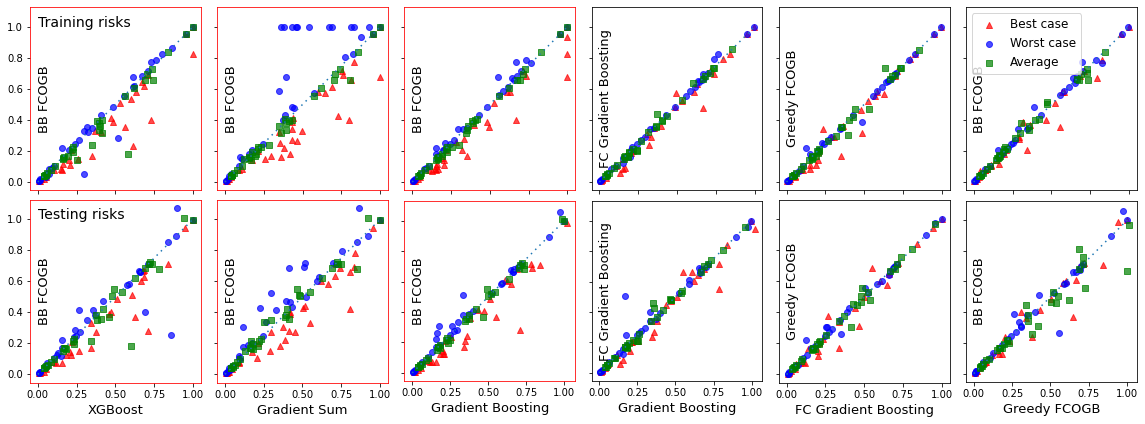

In [18]:
xs_bc_tr = [xobc_x_tr, sobc_s_tr, gobc_g_tr, gfbc_g_tr, fgbc_f_tr, gebc_g_tr, ]
ys_bc_tr = [xobc_o_tr, sobc_o_tr, gobc_o_tr, gfbc_f_tr, fgbc_g_tr, gebc_e_tr, ]
xs_avg_tr = [xoa_x_tr, soa_s_tr, goa_g_tr, gfa_g_tr, fga_f_tr, gea_g_tr, ]
ys_avg_tr = [xoa_o_tr, soa_o_tr, goa_o_tr, gfa_f_tr, fga_g_tr, gea_e_tr, ]
xs_wc_tr = [xowc_x_tr, sowc_s_tr, gowc_g_tr, gfwc_g_tr, fgwc_f_tr, gewc_g_tr, ]
ys_wc_tr = [xowc_o_tr, sowc_o_tr, gowc_o_tr, gfwc_f_tr, fgwc_g_tr, gewc_e_tr, ]
xs_bc_te = [xobc_x_te,sobc_s_te,  gobc_g_te, gfbc_g_te, fgbc_f_te, gebc_g_te, ]
ys_bc_te = [xobc_o_te, sobc_o_te, gobc_o_te, gfbc_f_te, fgbc_g_te, gebc_e_te, ]
xs_avg_te = [xoa_x_te, soa_s_te, goa_g_te, gfa_g_te, fga_f_te, gea_g_te, ]
ys_avg_te = [xoa_o_te, sxoa_o_te, goa_o_te, gfa_f_te, fga_g_te, gea_e_te, ]
xs_wc_te = [xowc_x_te, sowc_s_te, gowc_g_te, gfwc_g_te, fgwc_f_te, gewc_g_te, ]
ys_wc_te = [xowc_o_te, sowc_o_te, gowc_o_te, gfwc_f_te, fgwc_g_te, gewc_e_te, ]
xlabels=['XGBoost', 'Gradient Sum', 'Gradient Boosting', 'Gradient Boosting', 'FC Gradient Boosting', 'Greedy FCOGB']
ylabels=['BB FCOGB', 'BB FCOGB', 'BB FCOGB', 'FC Gradient Boosting', 'Greedy FCOGB', 'BB FCOGB']
fig, axs = plt.subplots(2, 6, figsize=(16,6), sharey=True, tight_layout=True, squeeze=False)
for i in range(2):
    for j in range(6):
        ax = axs[i, j]
        ax.set_aspect('equal', adjustable='box')
        if i==1:
            ax.set_xlabel(''+xlabels[j], fontsize=13)
        ax.set_ylabel(''+ylabels[j], fontsize=13)
        ax.yaxis.set_label_coords(0.12, 0.5)
        if j<3:
            for spine in ax.spines.values():
                spine.set_edgecolor('red')
        if i==0:
            ax.set_xticklabels([])
            ax.scatter(xs_bc_tr[j], ys_bc_tr[j], label='Best case', c='red', alpha=0.7, marker='^')
            ax.scatter(xs_wc_tr[j], ys_wc_tr[j], label='Worst case', c='blue', alpha=0.7,  marker='o')
            ax.scatter(xs_avg_tr[j], ys_avg_tr[j], label='Average', c='green', alpha=0.7, marker='s')
        if i==1:
            ax.scatter(xs_bc_te[j], ys_bc_te[j], label='Best case', c='red', alpha=0.7,marker='^')
            ax.scatter(xs_wc_te[j], ys_wc_te[j], label='Worst case', c='blue', alpha=0.7,  marker='o')
            ax.scatter(xs_avg_te[j], ys_avg_te[j], label='Average', c='green', alpha=0.7,  marker='s')
        ax.plot([0,1], [0,1], linestyle=(0, (1,3)))
axs[0,5].legend(fontsize=12)
axs[0, 0].text(0, 1, 'Training risks', fontsize=14)
axs[1, 0].text(0, 1, 'Testing risks', fontsize=14)
plt.show()
fig.savefig('ablation_study.pdf') 

In [24]:
from matplotlib import pyplot as plt
from random import random

def compare_risks_greedy(dataset_name, location='../experiment_output_20230413_', max_risk=1, repeat=5, col=10, 
            max_length=30, title=None):
    test_risks={}
    train_risks={}
    and_counts={}
    aucs_test={}
    aucs_train={}
    file_numbers={}
    desc=dataset_name
    max_risk=get_max_risk(dataset_name)
    print(max_risk)
    objs = ['mwg','gpe','xgb','orth']
    for obj in objs:
        algos = ['fc'] if obj=='orth' else ['boosting'] if obj in ['gpe', 'mwg'] else ['keep']
        searches = ['greedy'] if obj in ['mwg', 'gpe'] else ['greedy', 'exhaustive'] if obj=='orth' else ['exhaustive']
        for search in searches:
            for algo in algos:
                methods = ['Newton-CG'] if algo=='fc' else ['']
                for method in methods:
                    done = True
                    fc_train=[0]*9
                    fc_test=[0]*9
                    ands = [0]*9
                    file_number=0
                    for i in range(repeat):
                        filename = dataset_name + '_' + obj + '_' + algo + '_' + method + '_realkd_col_' + \
                            str(col) + '_rep' + str(i) + '.txt'
                        try:
                            f = open(location+search+'/'+dataset_name+'/'+filename, 'r')
                            file_number+=1
                        except:
                            print(obj, algo, method,'does not exist: ')
                            print(location+search+'/'+dataset_name+'/'+filename)
                            continue
                        j=-1
                        for line in f:
                            if 'iteration ' in line:
                                j+=1
                            if j>=9:
                                break
                            words=line.split(' ')
                            if 'fc train risk' in line:
                                fc_train[j] += float(words[-1])
                            elif 'fc test risk' in line:
                                fc_test[j] += float(words[-1])
                            if 'if' in line:
                                ands[j]+=line.count('=')+1
                    if done:
                        file_numbers[obj + '_' + algo + '_' + method+'_'+search] = file_number
                        train_risks[obj + '_' + algo + '_' + method+'_'+search]=fc_train
                        test_risks[obj + '_' + algo + '_' + method+'_'+search]=fc_test
                        and_counts[obj + '_' + algo + '_' + method+'_'+search]=ands
                        if file_number==0:
                            continue
                        print(obj + '_' + algo + '_' + method+': avg train risk:',sum(fc_train)/10/max_risk/file_number, 
                              'avg test risk', sum(fc_test)/10/max_risk/file_number, '&s:', sum(ands)/10/file_number)

    rg=list(range(1,11))
    plt.figure(figsize=(8,6))
    colours = {}
    line_width = {}
    width = [1,1, 1, 1]*4
    i = 0
    colors=['blue','green','red','gold','deepskyblue','violet','cyan','brown','deepskyblue','purple', 'lime',
            'slategray','magenta','pink','olive','khaki']
    label_map={'gpe_boosting__greedy':'Gradient Boosting', 'gpe_fc_Newton-CG': 'Gradient Fully-corrective Boosting', 
               'orth_fc_Newton-CG_greedy': 'Greedy FCOGB', 
               'orth_fc_Newton-CG_exhaustive': 'BB FCOGB',
               'xgb_keep__exhaustive': 'XGBoost', 
              'xgb_fc_Newton-CG': 'XG Fully-corrective Boosting',
              'mwg_boosting__greedy': 'Gradient Descent'}
    for item in train_risks:
        color = colors[i]
        colours[item] = color
        line_width[item] = width[i]
        i+=1
        if file_numbers[item]==0:
            continue
        train_risks[item] = [risk / max_risk/file_numbers[item] for risk in train_risks[item]]
        test_risks[item] = [risk / max_risk/file_numbers[item] for risk in test_risks[item]]
        and_counts[item] = [ands / file_numbers[item] for ands in and_counts[item]]
        aucs_test[item] = and_counts[item][0]+sum((test_risks[item][m])*
                                             (min(max_length, and_counts[item][m+1])-
                                                 min(max_length, and_counts[item][m]))
                                for m in range(0,len(test_risks[item])-1))
        aucs_train[item] = and_counts[item][0]+sum((train_risks[item][m])*
                                             (min(max_length, and_counts[item][m+1])-
                                                 min(max_length, and_counts[item][m]))
                                for m in range(0,len(train_risks[item])-1))
        
        
        if and_counts[item][-1]<max_length:
            aucs_test[item]+=test_risks[item][-1]*(max_length-and_counts[item][-1])
            aucs_train[item]+=train_risks[item][-1]*(max_length-and_counts[item][-1])
        aucs_train[item] /= max_length
        aucs_test[item] /= max_length # min(max_length, and_counts[item][-1])
        print(item, 'auc:', aucs_train[item], aucs_test[item])
#         print(and_counts[item], train_risks[item])
        plt.step([0]+and_counts[item], [1]+train_risks[item], '--', color=colours[item],
                 label=label_map[item],linewidth=line_width[item],where='post')
#         plt.step([0]+and_counts[item], [1]+test_risks[item], color=colours[item],
#                  label=label_map[item],linewidth=line_width[item],where='post')
    plt.title(dataset_name if title is None else title + " risks")
    plt.xlabel('number of rules')
    plt.xlim(0,max_length)
    plt.ylabel('risk')
#     plt.yscale('log')
    plt.grid(visible=True, which='major')
    plt.grid(visible=True, which='minor')
    plt.gca().set_ylim(bottom=0)
    plt.legend()
    plt.show()
    
    return train_risks, test_risks, and_counts, aucs_train, aucs_test

34
1.0
mwg_boosting_: avg train risk: 0.6091817884368745 avg test risk 0.6553742181914453 &s: 14.0
gpe_boosting_: avg train risk: 0.556061581723824 avg test risk 0.6226031566908817 &s: 18.06
xgb_keep_: avg train risk: 0.5531513854285596 avg test risk 0.6317113955876974 &s: 20.82
orth_fc_Newton-CG: avg train risk: 0.5545661130965367 avg test risk 0.6463473083675285 &s: 17.54
orth_fc_Newton-CG: avg train risk: 0.5430883865436995 avg test risk 0.6334892465940709 &s: 20.580000000000002
mwg_boosting__greedy auc: 0.7016296546030787 0.7467430623308144
gpe_boosting__greedy auc: 0.6815675184166541 0.7362132400638278
xgb_keep__exhaustive auc: 0.6895032230059166 0.7339539077469663
orth_fc_Newton-CG_greedy auc: 0.6790251223977316 0.7581743032297973
orth_fc_Newton-CG_exhaustive auc: 0.6582646889082006 0.711586986238409


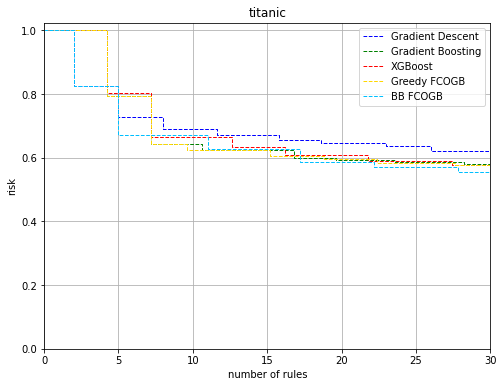

1
mwg_boosting_: avg train risk: 0.7304917596452712 avg test risk 0.7714112580047815 &s: 10.8
gpe_boosting_: avg train risk: 0.5899054640822344 avg test risk 0.6649132973139646 &s: 18.22
xgb_keep_: avg train risk: 0.5576405424693365 avg test risk 0.599808844611516 &s: 21.66
orth_fc_Newton-CG: avg train risk: 0.5818007340135668 avg test risk 0.6620355246579684 &s: 18.96
orth_fc_Newton-CG: avg train risk: 0.49894107127808585 avg test risk 0.5631054010392261 &s: 21.98
mwg_boosting__greedy auc: 0.8053953692059591 0.8533848115406723
gpe_boosting__greedy auc: 0.7372531015886016 0.8112967797705707
xgb_keep__exhaustive auc: 0.7402915872374387 0.7814048540691141
orth_fc_Newton-CG_greedy auc: 0.7348357993266081 0.809304616962241
orth_fc_Newton-CG_exhaustive auc: 0.7019073250549854 0.7509708521482357


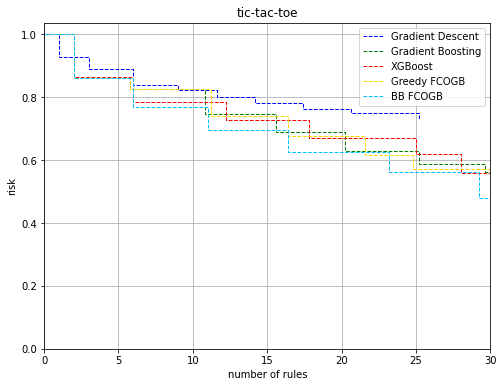

1.0
mwg_boosting_: avg train risk: 0.2788378184175181 avg test risk 0.38810158947577966 &s: 13.080000000000002
gpe_boosting_: avg train risk: 0.21403420874808332 avg test risk 0.38495157121315937 &s: 16.72
xgb_keep_: avg train risk: 0.2677958826459094 avg test risk 0.36147266613292905 &s: 15.98
orth_fc_Newton-CG: avg train risk: 0.2115349831916106 avg test risk 0.39244816223437007 &s: 14.180000000000001
orth_fc_Newton-CG: avg train risk: 0.2085287768483158 avg test risk 0.45863067894038406 &s: 17.240000000000002
mwg_boosting__greedy auc: 0.358502343978124 0.4629631971020257
gpe_boosting__greedy auc: 0.3160347819101865 0.46847326570985287
xgb_keep__exhaustive auc: 0.4116609200396361 0.4936212409778936
orth_fc_Newton-CG_greedy auc: 0.2954302676661669 0.4707021346869836
orth_fc_Newton-CG_exhaustive auc: 0.31732208374264315 0.5516539620276455


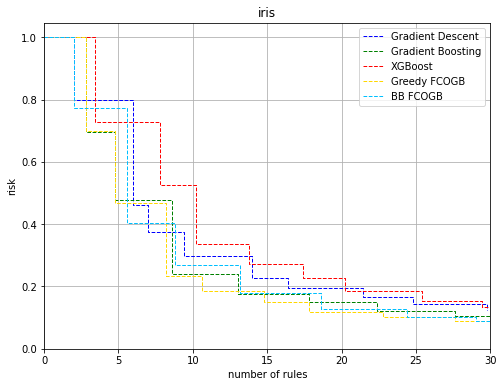

1.0
mwg_boosting_: avg train risk: 0.25422696122557914 avg test risk 0.20691306330729414 &s: 13.64
gpe_boosting_: avg train risk: 0.2379218474259969 avg test risk 0.23479347975618065 &s: 18.380000000000003
xgb_keep_: avg train risk: 0.2650015343287256 avg test risk 0.26825939025559886 &s: 19.240000000000002
orth_fc_Newton-CG: avg train risk: 0.23451113256789324 avg test risk 0.25444852770461457 &s: 19.3
orth_fc_Newton-CG: avg train risk: 0.20540929692377224 avg test risk 0.23991640497283367 &s: 23.9
mwg_boosting__greedy auc: 0.34710539119278355 0.29678708520545793
gpe_boosting__greedy auc: 0.36243085956801996 0.3405344690103474
xgb_keep__exhaustive auc: 0.3983722011171827 0.38301426209416106
orth_fc_Newton-CG_greedy auc: 0.3588161927535139 0.3558781182984641
orth_fc_Newton-CG_exhaustive auc: 0.3578205995343002 0.3515831864642321


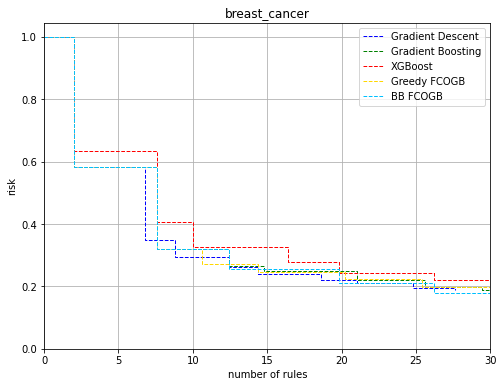

1.0
mwg_boosting_: avg train risk: 0.19809959005242436 avg test risk 0.2970019743039817 &s: 13.180000000000001
gpe_boosting_: avg train risk: 0.17614000207584923 avg test risk 0.3797986634052345 &s: 18.259999999999998
xgb_keep_: avg train risk: 0.1967090633401519 avg test risk 0.3138565721184472 &s: 17.080000000000002
orth_fc_Newton-CG: avg train risk: 0.1611975011056292 avg test risk 0.3665977981217579 &s: 16.48
orth_fc_Newton-CG: avg train risk: 0.132708747984409 avg test risk 0.28949324236145163 &s: 18.68
mwg_boosting__greedy auc: 0.2860595887165047 0.3879908402172841
gpe_boosting__greedy auc: 0.32497511669513524 0.5027657824323171
xgb_keep__exhaustive auc: 0.35046423981512304 0.45771190014696167
orth_fc_Newton-CG_greedy auc: 0.3054078242648341 0.47946359939895694
orth_fc_Newton-CG_exhaustive auc: 0.24072109032573621 0.36812824651444653


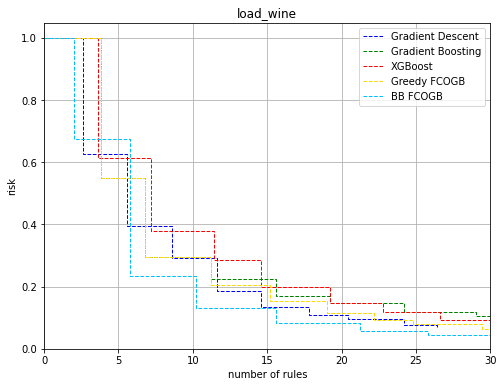

1.0
mwg_boosting_: avg train risk: 0.5308818016452309 avg test risk 0.5474678417744795 &s: 7.2
gpe_boosting_: avg train risk: 0.5213053906154861 avg test risk 0.5586480012976591 &s: 9.040000000000001
xgb_keep_: avg train risk: 0.5332699331262643 avg test risk 0.567704804033553 &s: 10.2
orth_fc_Newton-CG: avg train risk: 0.5149134625424432 avg test risk 0.548125080014618 &s: 9.2
orth_fc_Newton-CG: avg train risk: 0.5143356382702777 avg test risk 0.5402823575553499 &s: 11.02
mwg_boosting__greedy auc: 0.5924660288293448 0.611353817500439
gpe_boosting__greedy auc: 0.5837996794547919 0.629883609112354
xgb_keep__exhaustive auc: 0.5988817714570107 0.6379838170627733
orth_fc_Newton-CG_greedy auc: 0.5784572808393678 0.6199807761198358
orth_fc_Newton-CG_exhaustive auc: 0.5806955774615756 0.6101933447193122


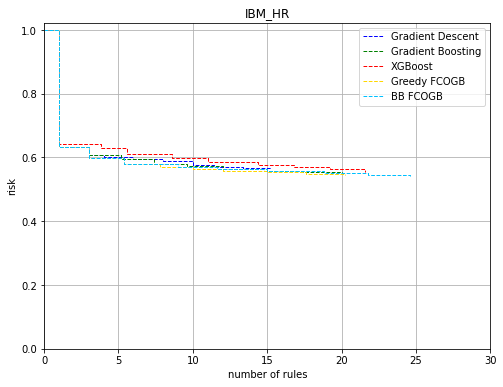

1.0
mwg boosting  does not exist: 
../experiment_output_20230413_greedy/telco_churn/telco_churn_mwg_boosting__realkd_col_4_rep1.txt
mwg boosting  does not exist: 
../experiment_output_20230413_greedy/telco_churn/telco_churn_mwg_boosting__realkd_col_4_rep2.txt
mwg boosting  does not exist: 
../experiment_output_20230413_greedy/telco_churn/telco_churn_mwg_boosting__realkd_col_4_rep3.txt
mwg boosting  does not exist: 
../experiment_output_20230413_greedy/telco_churn/telco_churn_mwg_boosting__realkd_col_4_rep4.txt
mwg_boosting_: avg train risk: 0.6313392065305798 avg test risk 0.6182180061042104 &s: 11.6
gpe boosting  does not exist: 
../experiment_output_20230413_greedy/telco_churn/telco_churn_gpe_boosting__realkd_col_4_rep1.txt
gpe boosting  does not exist: 
../experiment_output_20230413_greedy/telco_churn/telco_churn_gpe_boosting__realkd_col_4_rep2.txt
gpe boosting  does not exist: 
../experiment_output_20230413_greedy/telco_churn/telco_churn_gpe_boosting__realkd_col_4_rep3.txt
gpe boos

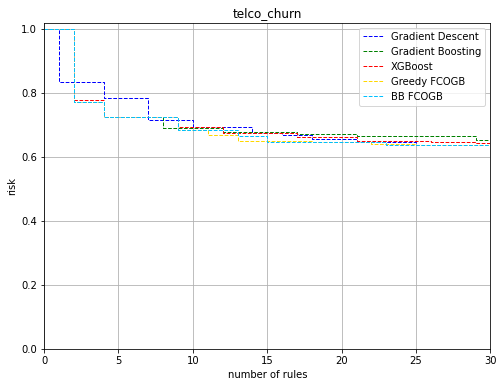

1.0
mwg boosting  does not exist: 
../experiment_output_20230413_greedy/GenderRecognition/GenderRecognition_mwg_boosting__realkd_col_3_rep1.txt
mwg boosting  does not exist: 
../experiment_output_20230413_greedy/GenderRecognition/GenderRecognition_mwg_boosting__realkd_col_3_rep2.txt
mwg boosting  does not exist: 
../experiment_output_20230413_greedy/GenderRecognition/GenderRecognition_mwg_boosting__realkd_col_3_rep3.txt
mwg boosting  does not exist: 
../experiment_output_20230413_greedy/GenderRecognition/GenderRecognition_mwg_boosting__realkd_col_3_rep4.txt
mwg_boosting_: avg train risk: 0.8979072303835831 avg test risk 0.9008508731481404 &s: 6.7
gpe boosting  does not exist: 
../experiment_output_20230413_greedy/GenderRecognition/GenderRecognition_gpe_boosting__realkd_col_3_rep1.txt
gpe boosting  does not exist: 
../experiment_output_20230413_greedy/GenderRecognition/GenderRecognition_gpe_boosting__realkd_col_3_rep2.txt
gpe boosting  does not exist: 
../experiment_output_20230413_gree

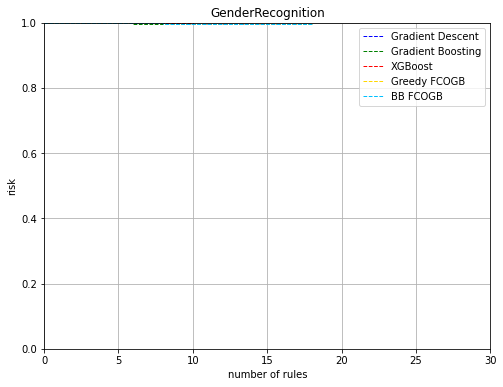

1.0
mwg_boosting_: avg train risk: 0.3164439283057251 avg test risk 0.3323706240969643 &s: 13.059999999999999
gpe_boosting_: avg train risk: 0.24634832503963752 avg test risk 0.2592192409361636 &s: 17.78
xgb_keep_: avg train risk: 0.29529489859172997 avg test risk 0.3036916294155598 &s: 14.8
orth_fc_Newton-CG: avg train risk: 0.22577325782144628 avg test risk 0.24171254073968945 &s: 18.240000000000002
orth_fc_Newton-CG: avg train risk: 0.21570686002735937 avg test risk 0.23025513182826648 &s: 18.36
mwg_boosting__greedy auc: 0.3936067555570707 0.4103502270506501
gpe_boosting__greedy auc: 0.3633417860333422 0.37958248140127193
xgb_keep__exhaustive auc: 0.39443178715167276 0.4045272783856457
orth_fc_Newton-CG_greedy auc: 0.3563743294210856 0.37830723299905633
orth_fc_Newton-CG_exhaustive auc: 0.337198679471867 0.3554990950588573


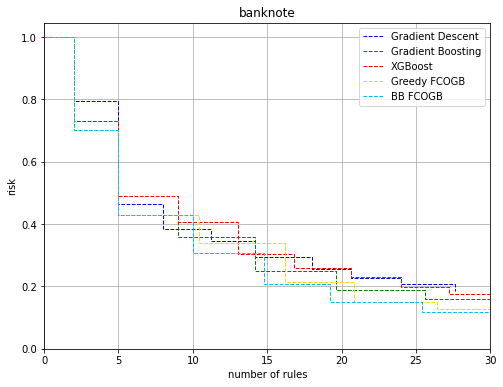

1.0
mwg boosting  does not exist: 
../experiment_output_20230413_greedy/liver/liver_mwg_boosting__realkd_col_10_rep2.txt
mwg boosting  does not exist: 
../experiment_output_20230413_greedy/liver/liver_mwg_boosting__realkd_col_10_rep3.txt
mwg boosting  does not exist: 
../experiment_output_20230413_greedy/liver/liver_mwg_boosting__realkd_col_10_rep4.txt
mwg_boosting_: avg train risk: 0.7522279864759734 avg test risk 0.8048362398834815 &s: 14.05
gpe boosting  does not exist: 
../experiment_output_20230413_greedy/liver/liver_gpe_boosting__realkd_col_10_rep2.txt
gpe boosting  does not exist: 
../experiment_output_20230413_greedy/liver/liver_gpe_boosting__realkd_col_10_rep3.txt
gpe boosting  does not exist: 
../experiment_output_20230413_greedy/liver/liver_gpe_boosting__realkd_col_10_rep4.txt
gpe_boosting_: avg train risk: 0.6976606843770167 avg test risk 0.8954258689774022 &s: 22.3
xgb keep  does not exist: 
../experiment_output_20230413_exhaustive/liver/liver_xgb_keep__realkd_col_10_rep2.

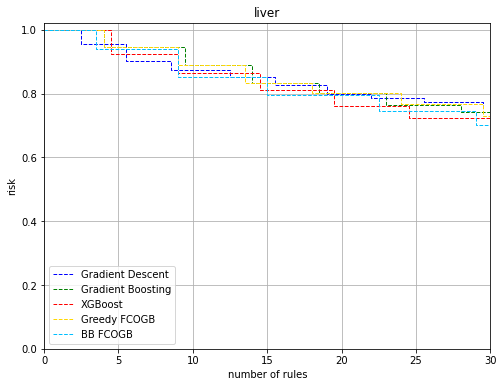

1.0
mwg boosting  does not exist: 
../experiment_output_20230413_greedy/magic/magic_mwg_boosting__realkd_col_5_rep1.txt
mwg boosting  does not exist: 
../experiment_output_20230413_greedy/magic/magic_mwg_boosting__realkd_col_5_rep2.txt
mwg boosting  does not exist: 
../experiment_output_20230413_greedy/magic/magic_mwg_boosting__realkd_col_5_rep3.txt
mwg boosting  does not exist: 
../experiment_output_20230413_greedy/magic/magic_mwg_boosting__realkd_col_5_rep4.txt
mwg_boosting_: avg train risk: 0.6584725977844212 avg test risk 0.642487787965944 &s: 11.6
gpe boosting  does not exist: 
../experiment_output_20230413_greedy/magic/magic_gpe_boosting__realkd_col_5_rep1.txt
gpe boosting  does not exist: 
../experiment_output_20230413_greedy/magic/magic_gpe_boosting__realkd_col_5_rep2.txt
gpe boosting  does not exist: 
../experiment_output_20230413_greedy/magic/magic_gpe_boosting__realkd_col_5_rep3.txt
gpe boosting  does not exist: 
../experiment_output_20230413_greedy/magic/magic_gpe_boosting_

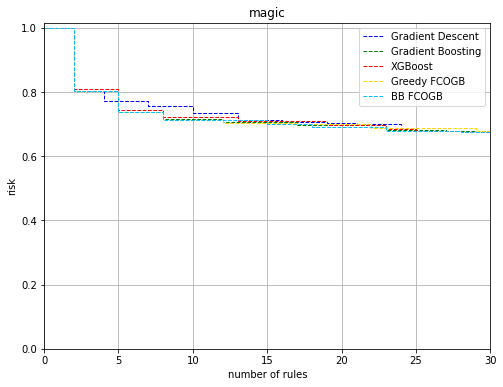

1.0
mwg boosting  does not exist: 
../experiment_output_20230413_greedy/adult/adult_mwg_boosting__realkd_col_5_rep1.txt
mwg boosting  does not exist: 
../experiment_output_20230413_greedy/adult/adult_mwg_boosting__realkd_col_5_rep2.txt
mwg boosting  does not exist: 
../experiment_output_20230413_greedy/adult/adult_mwg_boosting__realkd_col_5_rep3.txt
mwg boosting  does not exist: 
../experiment_output_20230413_greedy/adult/adult_mwg_boosting__realkd_col_5_rep4.txt
mwg_boosting_: avg train risk: 0.5637278202601043 avg test risk 0.5684911930430708 &s: 9.8
gpe boosting  does not exist: 
../experiment_output_20230413_greedy/adult/adult_gpe_boosting__realkd_col_5_rep1.txt
gpe boosting  does not exist: 
../experiment_output_20230413_greedy/adult/adult_gpe_boosting__realkd_col_5_rep2.txt
gpe boosting  does not exist: 
../experiment_output_20230413_greedy/adult/adult_gpe_boosting__realkd_col_5_rep3.txt
gpe boosting  does not exist: 
../experiment_output_20230413_greedy/adult/adult_gpe_boosting_

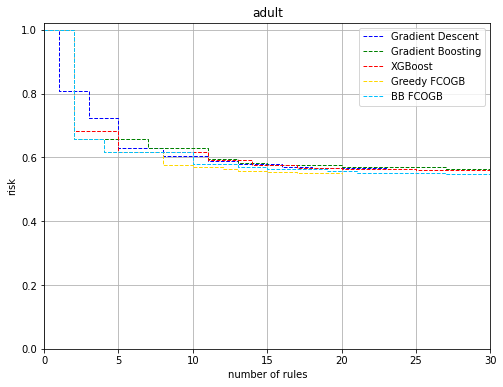

1.0
mwg boosting  does not exist: 
../experiment_output_20230413_greedy/digits5/digits5_mwg_boosting__realkd_col_3_rep1.txt
mwg boosting  does not exist: 
../experiment_output_20230413_greedy/digits5/digits5_mwg_boosting__realkd_col_3_rep2.txt
mwg boosting  does not exist: 
../experiment_output_20230413_greedy/digits5/digits5_mwg_boosting__realkd_col_3_rep3.txt
mwg boosting  does not exist: 
../experiment_output_20230413_greedy/digits5/digits5_mwg_boosting__realkd_col_3_rep4.txt
mwg_boosting_: avg train risk: 0.3716078230511399 avg test risk 0.3544953406457733 &s: 6.6
gpe boosting  does not exist: 
../experiment_output_20230413_greedy/digits5/digits5_gpe_boosting__realkd_col_3_rep1.txt
gpe boosting  does not exist: 
../experiment_output_20230413_greedy/digits5/digits5_gpe_boosting__realkd_col_3_rep2.txt
gpe boosting  does not exist: 
../experiment_output_20230413_greedy/digits5/digits5_gpe_boosting__realkd_col_3_rep3.txt
gpe boosting  does not exist: 
../experiment_output_20230413_gree

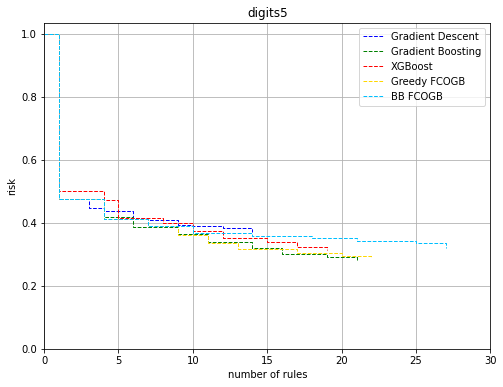

322646873.58870494
mwg_boosting_: avg train risk: 0.1740970136495936 avg test risk 0.1612460865046535 &s: 9.02
gpe_boosting_: avg train risk: 0.1204886415024411 avg test risk 0.11201719561465187 &s: 13.64
xgb_keep_: avg train risk: 0.11800302926465626 avg test risk 0.1098996963291008 &s: 15.24
orth_fc_Newton-CG: avg train risk: 0.11163495714739395 avg test risk 0.10738719337023366 &s: 10.76
orth_fc_Newton-CG: avg train risk: 0.10789186403930287 avg test risk 0.10467295145384663 &s: 12.52
mwg_boosting__greedy auc: 0.1927975395384978 0.18143449840165085
gpe_boosting__greedy auc: 0.19002723581460107 0.1805172441190385
xgb_keep__exhaustive auc: 0.19235978394748027 0.18237849049554902
orth_fc_Newton-CG_greedy auc: 0.16885435681177383 0.164673622516822
orth_fc_Newton-CG_exhaustive auc: 0.16600673321427215 0.1626574446702985


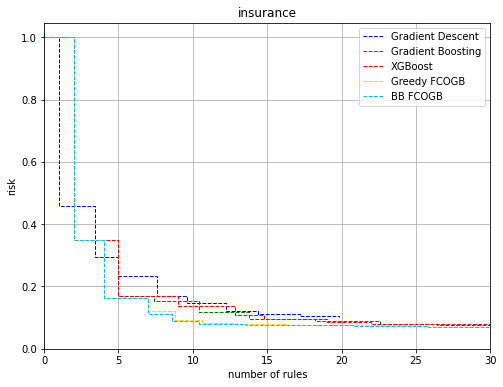

226.89125115757616
mwg_boosting_: avg train risk: 0.05665279969456347 avg test risk 0.057063224101921606 &s: 8.16
gpe_boosting_: avg train risk: 0.05511241130925728 avg test risk 0.05844486346139016 &s: 13.48
xgb_keep_: avg train risk: 0.05276636489259852 avg test risk 0.057896989812670704 &s: 15.26
orth_fc_Newton-CG: avg train risk: 0.050943348309853906 avg test risk 0.05329848335834695 &s: 10.34
orth_fc_Newton-CG: avg train risk: 0.049835873630733836 avg test risk 0.05443606887047815 &s: 15.24
mwg_boosting__greedy auc: 0.09582878056056893 0.09667987403081081
gpe_boosting__greedy auc: 0.103231061575213 0.10586108655253872
xgb_keep__exhaustive auc: 0.101328924097577 0.1049586507535766
orth_fc_Newton-CG_greedy auc: 0.09334750296751462 0.09582695986844819
orth_fc_Newton-CG_exhaustive auc: 0.09583520583374508 0.09916481853597228


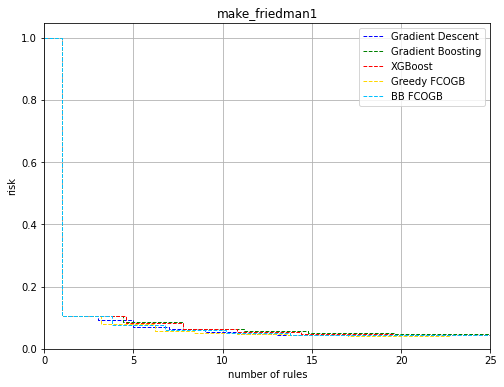

379683.4049960418
mwg_boosting_: avg train risk: 0.11129261857429965 avg test risk 0.11400440845732862 &s: 10.16
gpe_boosting_: avg train risk: 0.08198186215804273 avg test risk 0.08293615526087035 &s: 14.440000000000001
xgb_keep_: avg train risk: 0.07611776932912746 avg test risk 0.07701436513343377 &s: 14.48
orth_fc_Newton-CG: avg train risk: 0.06083811654671658 avg test risk 0.061284661223537616 &s: 12.74
orth_fc_Newton-CG: avg train risk: 0.05982812638474834 avg test risk 0.060267456559469336 &s: 13.36
mwg_boosting__greedy auc: 0.18804789507017167 0.1915459705772097
gpe_boosting__greedy auc: 0.25176078358747517 0.2528094992574146
xgb_keep__exhaustive auc: 0.2472528863860998 0.24829953010096045
orth_fc_Newton-CG_greedy auc: 0.22290179449656228 0.22355357579905374
orth_fc_Newton-CG_exhaustive auc: 0.22303306037787393 0.22365950404800133


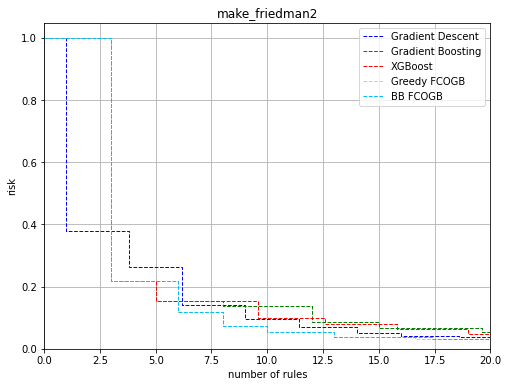

1.8780821278399789
mwg_boosting_: avg train risk: 0.026386825900698067 avg test risk 0.028350018670799077 &s: 11.22
gpe_boosting_: avg train risk: 0.023617123920224893 avg test risk 0.02615542914388481 &s: 13.540000000000001
xgb_keep_: avg train risk: 0.022915785638009466 avg test risk 0.025757984456543252 &s: 15.819999999999999
orth_fc_Newton-CG: avg train risk: 0.022144244925394456 avg test risk 0.02461652020283426 &s: 13.1
orth_fc_Newton-CG: avg train risk: 0.021606979992955872 avg test risk 0.024427065148206622 &s: 14.4
mwg_boosting__greedy auc: 0.06073367313008386 0.06279445119461605
gpe_boosting__greedy auc: 0.05963358978541941 0.062336169671020354
xgb_keep__exhaustive auc: 0.05961240775384223 0.06244007534108447
orth_fc_Newton-CG_greedy auc: 0.05748318886761545 0.06012886839456333
orth_fc_Newton-CG_exhaustive auc: 0.05718454092392885 0.059952596508722304


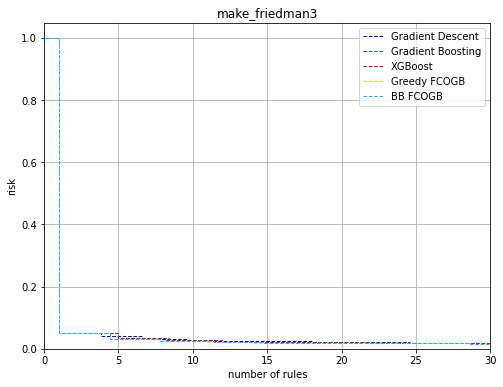

2029057842.6515312
mwg_boosting_: avg train risk: 0.3409823218695439 avg test risk 0.3415979829473042 &s: 11.48
gpe_boosting_: avg train risk: 0.32270090267555707 avg test risk 0.34800401544342596 &s: 17.02
xgb_keep_: avg train risk: 0.31102120552972135 avg test risk 0.3443269432574476 &s: 18.98
orth_fc_Newton-CG: avg train risk: 0.31299557112313553 avg test risk 0.33648641883604186 &s: 16.72
orth_fc_Newton-CG: avg train risk: 0.30211867760165856 avg test risk 0.34717651581228587 &s: 17.919999999999998
mwg_boosting__greedy auc: 0.39586970310670605 0.39773540748932745
gpe_boosting__greedy auc: 0.4011780185409925 0.41916466100677685
xgb_keep__exhaustive auc: 0.3936913091071014 0.4176538171731321
orth_fc_Newton-CG_greedy auc: 0.3861428580976643 0.40383380386969825
orth_fc_Newton-CG_exhaustive auc: 0.3811495221875275 0.4191575998018088


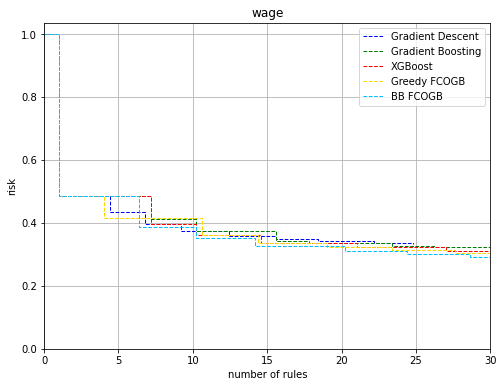

31.64835409252669
mwg_boosting_: avg train risk: 0.18649614943254295 avg test risk 0.18871686925009015 &s: 6.659999999999999
gpe_boosting_: avg train risk: 0.18316772468892803 avg test risk 0.18613238219225 &s: 9.74
xgb_keep_: avg train risk: 0.18315362923777 avg test risk 0.18612209389747522 &s: 9.86
orth_fc_Newton-CG: avg train risk: 0.18149753401150912 avg test risk 0.18421203357069318 &s: 9.879999999999999
orth_fc_Newton-CG: avg train risk: 0.18146223864311528 avg test risk 0.18431207227095503 &s: 9.940000000000001
mwg_boosting__greedy auc: 0.2294922620052354 0.23178709434156006
gpe_boosting__greedy auc: 0.22685361043372046 0.23016180428642521
xgb_keep__exhaustive auc: 0.22685988371454113 0.23020738782549297
orth_fc_Newton-CG_greedy auc: 0.2252701904591877 0.22830002959010642
orth_fc_Newton-CG_exhaustive auc: 0.22522577197671248 0.22847507733854364


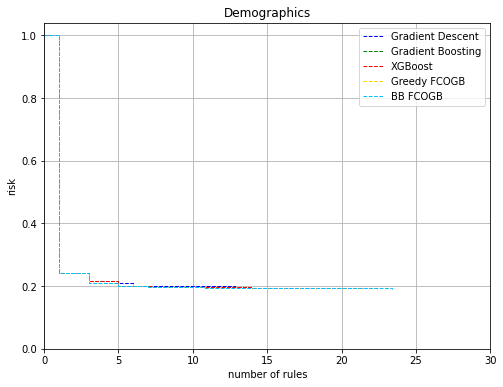

43.986571428571416
mwg_boosting_: avg train risk: 0.004725045681417392 avg test risk 0.005509393283745142 &s: 9.02
gpe_boosting_: avg train risk: 0.004614147329650385 avg test risk 0.005507724836440563 &s: 9.459999999999999
xgb_keep_: avg train risk: 0.0045632516386113035 avg test risk 0.00534192888075543 &s: 9.620000000000001
orth_fc_Newton-CG: avg train risk: 0.0040987943384597604 avg test risk 0.005265273541900262 &s: 9.64
orth_fc_Newton-CG: avg train risk: 0.004082897835060442 avg test risk 0.005066069415888547 &s: 9.86
mwg_boosting__greedy auc: 0.037826793171237716 0.038641545743113286
gpe_boosting__greedy auc: 0.03769827381926126 0.038715370030850446
xgb_keep__exhaustive auc: 0.03766647967386352 0.03856796627069856
orth_fc_Newton-CG_greedy auc: 0.037338346884841625 0.03860756139018933
orth_fc_Newton-CG_exhaustive auc: 0.037322911397410244 0.038422929168169855


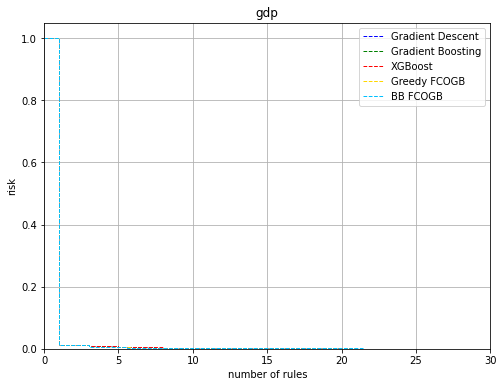

194464336.77843493
mwg_boosting_: avg train risk: 0.13317783972643502 avg test risk 0.14061731772328037 &s: 11.66
gpe_boosting_: avg train risk: 0.13075231427653666 avg test risk 0.1401206186916289 &s: 15.74
xgb_keep_: avg train risk: 0.11428577366309658 avg test risk 0.12400639219544787 &s: 15.9
orth_fc_Newton-CG: avg train risk: 0.09481287623005172 avg test risk 0.09997837122767703 &s: 12.52
orth_fc_Newton-CG: avg train risk: 0.09409859093463542 avg test risk 0.1006107210501738 &s: 13.5
mwg_boosting__greedy auc: 0.17106936749576873 0.17887810858517642
gpe_boosting__greedy auc: 0.24282666433876252 0.2525920618777514
xgb_keep__exhaustive auc: 0.2237855230503012 0.23270510806439398
orth_fc_Newton-CG_greedy auc: 0.1903537328871034 0.19556260076022447
orth_fc_Newton-CG_exhaustive auc: 0.19128494951978942 0.19788560111194703


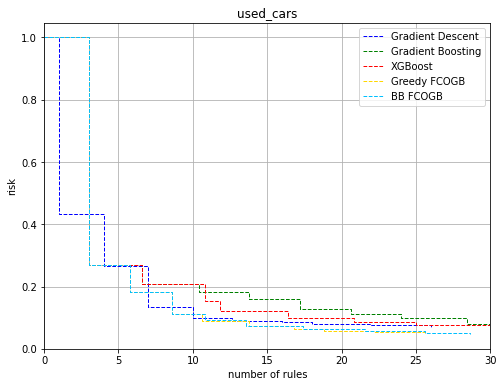

29074.481900452487
mwg_boosting_: avg train risk: 0.12150093530409092 avg test risk 0.12760850084200046 &s: 9.459999999999999
gpe_boosting_: avg train risk: 0.1157316473244634 avg test risk 0.1235432687787917 &s: 13.319999999999999
xgb_keep_: avg train risk: 0.1127463939293166 avg test risk 0.12802244416950032 &s: 17.56
orth_fc_Newton-CG: avg train risk: 0.11196625608797169 avg test risk 0.12444386626737743 &s: 12.14
orth_fc_Newton-CG: avg train risk: 0.10846797321107726 avg test risk 0.12953169218612198 &s: 16.380000000000003
mwg_boosting__greedy auc: 0.1571320067643291 0.16517282586755327
gpe_boosting__greedy auc: 0.15924624054603845 0.1668677282168879
xgb_keep__exhaustive auc: 0.15997284975248352 0.17036132732715098
orth_fc_Newton-CG_greedy auc: 0.1510774042718648 0.16462154977254503
orth_fc_Newton-CG_exhaustive auc: 0.15251292407395103 0.16854012421702466


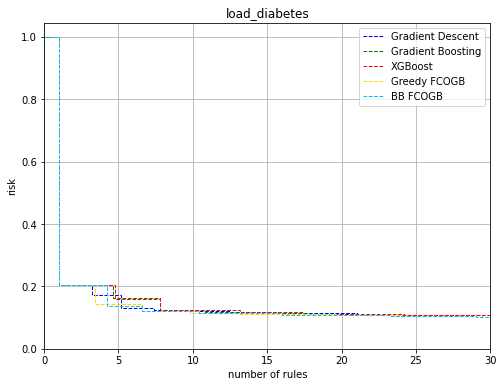

592.1469169960473
mwg_boosting_: avg train risk: 0.0781066806303161 avg test risk 0.06241345905808452 &s: 9.08
gpe_boosting_: avg train risk: 0.07063101220358936 avg test risk 0.0629711462176254 &s: 14.959999999999999
xgb_keep_: avg train risk: 0.06687118171204164 avg test risk 0.0634139571975054 &s: 16.68
orth_fc_Newton-CG: avg train risk: 0.06647278556171514 avg test risk 0.05880029337375988 &s: 14.059999999999999
orth_fc_Newton-CG: avg train risk: 0.06185727881624067 avg test risk 0.05826176562175428 &s: 16.82
mwg_boosting__greedy auc: 0.11053064323413501 0.09602382697180319
gpe_boosting__greedy auc: 0.11322085368031967 0.10257704401746964
xgb_keep__exhaustive auc: 0.11029653724440823 0.10301634603766698
orth_fc_Newton-CG_greedy auc: 0.10432194223063024 0.09532588172616162
orth_fc_Newton-CG_exhaustive auc: 0.10333221458368111 0.09651658066681484


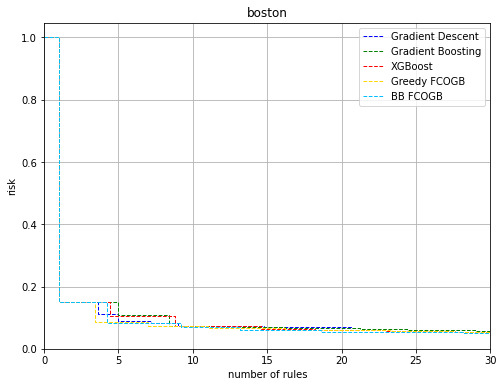

30.46778212179487
mwg_boosting_: avg train risk: 0.014676612720558252 avg test risk 0.015464801672391504 &s: 9.959999999999999
gpe_boosting_: avg train risk: 0.012902558018918518 avg test risk 0.018124665397095247 &s: 14.14
xgb_keep_: avg train risk: 0.012182235825201195 avg test risk 0.01738522970930265 &s: 18.86
orth_fc_Newton-CG: avg train risk: 0.011517029161067702 avg test risk 0.014833321567717073 &s: 13.02
orth_fc_Newton-CG: avg train risk: 0.010671736449924875 avg test risk 0.01623955792014107 &s: 17.48
mwg_boosting__greedy auc: 0.04729645146893962 0.04846110125397444
gpe_boosting__greedy auc: 0.047539800829902265 0.05304957929496202
xgb_keep__exhaustive auc: 0.049383562872883854 0.05304527723388397
orth_fc_Newton-CG_greedy auc: 0.04549363031623992 0.04891599402252829
orth_fc_Newton-CG_exhaustive auc: 0.04655555112633317 0.051103803362634564


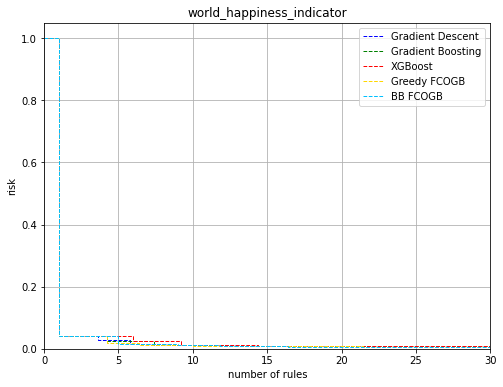

4882.764241803283
mwg boosting  does not exist: 
../experiment_output_20230413_greedy/who_life_expectancy/who_life_expectancy_mwg_boosting__realkd_col_5_rep1.txt
mwg boosting  does not exist: 
../experiment_output_20230413_greedy/who_life_expectancy/who_life_expectancy_mwg_boosting__realkd_col_5_rep2.txt
mwg boosting  does not exist: 
../experiment_output_20230413_greedy/who_life_expectancy/who_life_expectancy_mwg_boosting__realkd_col_5_rep3.txt
mwg boosting  does not exist: 
../experiment_output_20230413_greedy/who_life_expectancy/who_life_expectancy_mwg_boosting__realkd_col_5_rep4.txt
mwg_boosting_: avg train risk: 0.006892024316281775 avg test risk 0.007298997871639279 &s: 9.3
gpe boosting  does not exist: 
../experiment_output_20230413_greedy/who_life_expectancy/who_life_expectancy_gpe_boosting__realkd_col_5_rep1.txt
gpe boosting  does not exist: 
../experiment_output_20230413_greedy/who_life_expectancy/who_life_expectancy_gpe_boosting__realkd_col_5_rep2.txt
gpe boosting  does not 

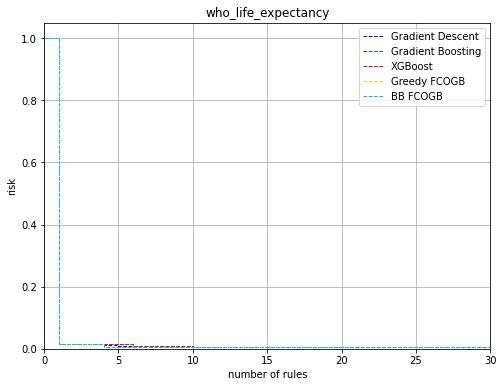

3.5
mwg boosting  does not exist: 
../experiment_output_20230413_greedy/mobile_prices/mobile_prices_mwg_boosting__realkd_col_4_rep1.txt
mwg boosting  does not exist: 
../experiment_output_20230413_greedy/mobile_prices/mobile_prices_mwg_boosting__realkd_col_4_rep2.txt
mwg boosting  does not exist: 
../experiment_output_20230413_greedy/mobile_prices/mobile_prices_mwg_boosting__realkd_col_4_rep3.txt
mwg boosting  does not exist: 
../experiment_output_20230413_greedy/mobile_prices/mobile_prices_mwg_boosting__realkd_col_4_rep4.txt
mwg_boosting_: avg train risk: 0.13195549519448363 avg test risk 0.13678813790149333 &s: 8.2
gpe boosting  does not exist: 
../experiment_output_20230413_greedy/mobile_prices/mobile_prices_gpe_boosting__realkd_col_4_rep1.txt
gpe boosting  does not exist: 
../experiment_output_20230413_greedy/mobile_prices/mobile_prices_gpe_boosting__realkd_col_4_rep2.txt
gpe boosting  does not exist: 
../experiment_output_20230413_greedy/mobile_prices/mobile_prices_gpe_boosting__r

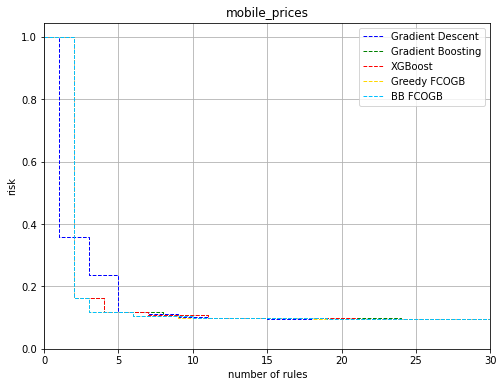

523.7783290690134
mwg boosting  does not exist: 
../experiment_output_20230413_greedy/suicide_rates_cleaned/suicide_rates_cleaned_mwg_boosting__realkd_col_3_rep1.txt
mwg boosting  does not exist: 
../experiment_output_20230413_greedy/suicide_rates_cleaned/suicide_rates_cleaned_mwg_boosting__realkd_col_3_rep2.txt
mwg boosting  does not exist: 
../experiment_output_20230413_greedy/suicide_rates_cleaned/suicide_rates_cleaned_mwg_boosting__realkd_col_3_rep3.txt
mwg boosting  does not exist: 
../experiment_output_20230413_greedy/suicide_rates_cleaned/suicide_rates_cleaned_mwg_boosting__realkd_col_3_rep4.txt
mwg_boosting_: avg train risk: 0.5268062348786469 avg test risk 0.5040625094371218 &s: 6.5
gpe boosting  does not exist: 
../experiment_output_20230413_greedy/suicide_rates_cleaned/suicide_rates_cleaned_gpe_boosting__realkd_col_3_rep1.txt
gpe boosting  does not exist: 
../experiment_output_20230413_greedy/suicide_rates_cleaned/suicide_rates_cleaned_gpe_boosting__realkd_col_3_rep2.txt
gpe

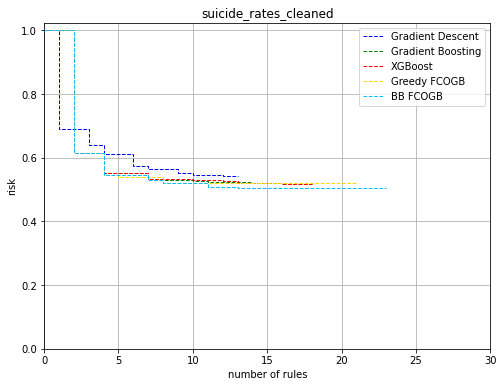

2.70680865164444
mwg boosting  does not exist: 
../experiment_output_20230413_greedy/videogamesales/videogamesales_mwg_boosting__realkd_col_3_rep1.txt
mwg boosting  does not exist: 
../experiment_output_20230413_greedy/videogamesales/videogamesales_mwg_boosting__realkd_col_3_rep2.txt
mwg boosting  does not exist: 
../experiment_output_20230413_greedy/videogamesales/videogamesales_mwg_boosting__realkd_col_3_rep3.txt
mwg boosting  does not exist: 
../experiment_output_20230413_greedy/videogamesales/videogamesales_mwg_boosting__realkd_col_3_rep4.txt
mwg_boosting_: avg train risk: 0.8569628814731582 avg test risk 0.6425265245884715 &s: 6.5
gpe boosting  does not exist: 
../experiment_output_20230413_greedy/videogamesales/videogamesales_gpe_boosting__realkd_col_3_rep1.txt
gpe boosting  does not exist: 
../experiment_output_20230413_greedy/videogamesales/videogamesales_gpe_boosting__realkd_col_3_rep2.txt
gpe boosting  does not exist: 
../experiment_output_20230413_greedy/videogamesales/video

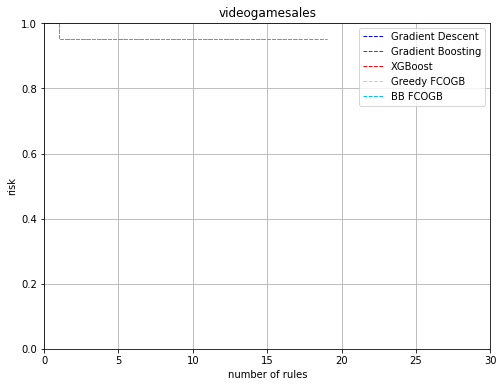

32.41651031894934
mwg_boosting_: avg train risk: 0.014289340576941294 avg test risk 0.014385355453752049 &s: 8.6
gpe_boosting_: avg train risk: 0.014156158730135033 avg test risk 0.014585573943222182 &s: 14.52
xgb_keep_: avg train risk: 0.013788427543302386 avg test risk 0.014558340358069927 &s: 18.240000000000002
orth_fc_Newton-CG: avg train risk: 0.01371624861285085 avg test risk 0.01399951927437286 &s: 11.66
orth_fc_Newton-CG: avg train risk: 0.013485770310557074 avg test risk 0.013977594063927488 &s: 17.380000000000003
mwg_boosting__greedy auc: 0.04813504181581529 0.048242136090861906
gpe_boosting__greedy auc: 0.04868287147979041 0.049065942793453735
xgb_keep__exhaustive auc: 0.04847427504793893 0.04903269008285441
orth_fc_Newton-CG_greedy auc: 0.04776388436849048 0.04806026373654702
orth_fc_Newton-CG_exhaustive auc: 0.048015976396816075 0.04834324484871176


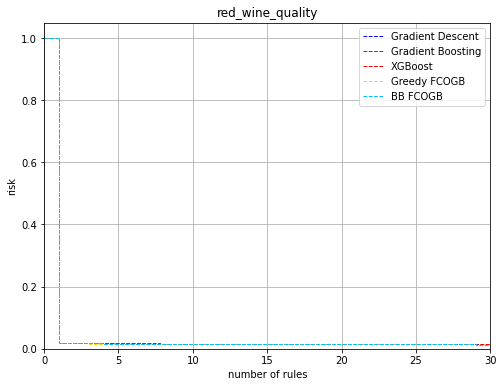

51.62076805721374
mwg_boosting_: avg train risk: 0.11970051493391716 avg test risk 0.13793197201814084 &s: 10.940000000000001
gpe_boosting_: avg train risk: 0.10912758657124877 avg test risk 0.1076052637524874 &s: 12.48
xgb_keep_: avg train risk: 0.5792279329035546 avg test risk 0.6038089517929743 &s: 12.32
orth_fc_Newton-CG: avg train risk: 0.09495757824073339 avg test risk 0.10029966371445179 &s: 11.14
orth_fc_Newton-CG: avg train risk: 0.0966001523760058 avg test risk 0.10448405927300204 &s: 12.58
mwg_boosting__greedy auc: 0.20197669910387034 0.21748106065992873
gpe_boosting__greedy auc: 0.18394989679203755 0.1797782721505967
xgb_keep__exhaustive auc: 0.5787469901545229 0.6029890983420406
orth_fc_Newton-CG_greedy auc: 0.1679662515609387 0.1738278393161831
orth_fc_Newton-CG_exhaustive auc: 0.1779246316626441 0.18535759853303815


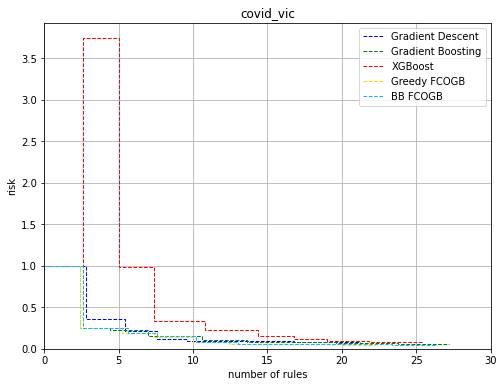

1082.8170359400497
mwg_boosting_: avg train risk: 0.32220917338507593 avg test risk 0.40720765711504353 &s: 11.66
gpe_boosting_: avg train risk: 0.30149508476840425 avg test risk 0.41045284987357267 &s: 16.86
xgb_keep_: avg train risk: 3.7258504655457267 avg test risk 5.346290569252612 &s: 15.559999999999999
orth_fc_Newton-CG: avg train risk: 0.28897409413435826 avg test risk 0.40267995893646635 &s: 16.080000000000002
orth_fc_Newton-CG: avg train risk: 0.28738013692274755 avg test risk 0.39961205763186364 &s: 16.56
mwg_boosting__greedy auc: 0.38608342619096264 0.4775994281136949
gpe_boosting__greedy auc: 0.4345367206531285 0.539512283793684
xgb_keep__exhaustive auc: 4.265709294465633 5.902597438168735
orth_fc_Newton-CG_greedy auc: 0.42154066287557407 0.5282148869684666
orth_fc_Newton-CG_exhaustive auc: 0.4084889166491917 0.5148708392340956


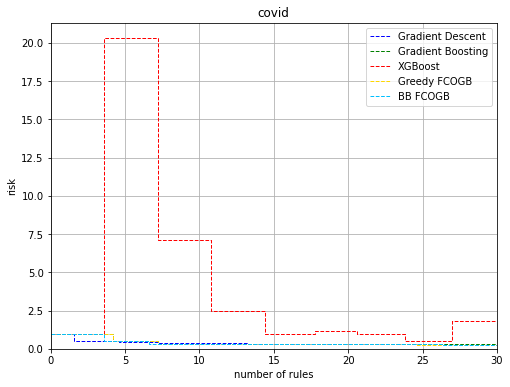

1076.416963882381
mwg_boosting_: avg train risk: 0.3528924659577613 avg test risk 0.40034821116847163 &s: 11.620000000000001
gpe_boosting_: avg train risk: 0.25787327807913024 avg test risk 0.3559467478083891 &s: 19.0
xgb_keep_: avg train risk: 0.253322783867886 avg test risk 0.3512709554100578 &s: 18.06
orth_fc_Newton-CG: avg train risk: 0.2510349442536871 avg test risk 0.358946505797683 &s: 17.48
orth_fc_Newton-CG: avg train risk: 0.23370328043230684 avg test risk 0.3806556783029691 &s: 19.78
mwg_boosting__greedy auc: 0.4369577013274073 0.48485172464770476
gpe_boosting__greedy auc: 0.4038107619802499 0.4695267378268336
xgb_keep__exhaustive auc: 0.4115460366678987 0.4793154289287349
orth_fc_Newton-CG_greedy auc: 0.3974231945253591 0.4671161932462585
orth_fc_Newton-CG_exhaustive auc: 0.40096722016608716 0.5048003762755314


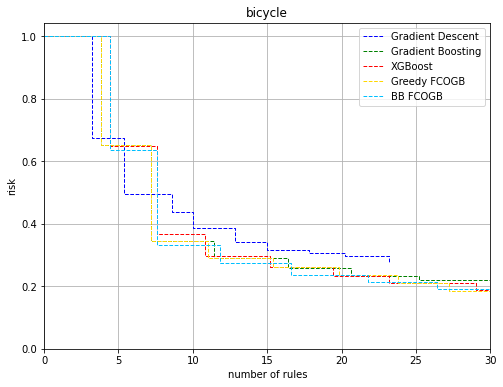

12.342277392898044
mwg_boosting_: avg train risk: 0.15436278479226245 avg test risk 0.18870679297929205 &s: 12.36
gpe_boosting_: avg train risk: 0.13747580942385684 avg test risk 0.2457857379503951 &s: 14.62
xgb_keep_: avg train risk: 125.18093464422086 avg test risk 156.62087071571315 &s: 14.580000000000002
orth_fc_Newton-CG: avg train risk: 0.09630772549813249 avg test risk 0.375347368923606 &s: 14.5
orth_fc_Newton-CG: avg train risk: 0.10340334832907246 avg test risk 0.2654296012237273 &s: 16.66
mwg_boosting__greedy auc: 0.21201659725312144 0.2487776692726501
gpe_boosting__greedy auc: 0.2441537921559113 0.35277253166576894
xgb_keep__exhaustive auc: 145.24426792340492 181.60815943421807
orth_fc_Newton-CG_greedy auc: 0.20252801941242782 0.4445337503552038
orth_fc_Newton-CG_exhaustive auc: 0.22272942708914958 0.33759924885634696


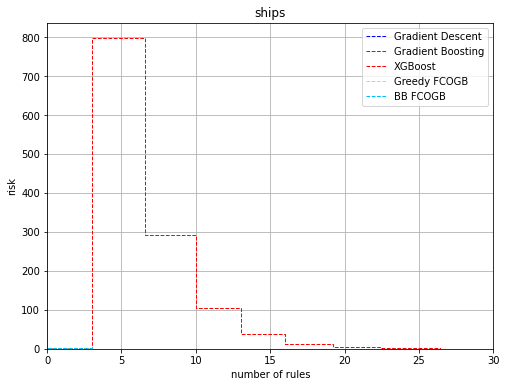

7.500299349437478
mwg_boosting_: avg train risk: 0.12143312557641842 avg test risk 0.11155542336764232 &s: 10.16
gpe_boosting_: avg train risk: 0.09637852421613527 avg test risk 0.17924217545230076 &s: 12.7
xgb_keep_: avg train risk: 0.25377624388085607 avg test risk 0.3336319415023762 &s: 10.879999999999999
orth_fc_Newton-CG: avg train risk: 0.08740321847899347 avg test risk 0.17224338776534037 &s: 11.9
orth_fc_Newton-CG: avg train risk: 0.08412185295085385 avg test risk 0.15632487601244224 &s: 12.059999999999999
mwg_boosting__greedy auc: 0.17146312479815518 0.17014856316554122
gpe_boosting__greedy auc: 0.15890041664293517 0.24490372336761157
xgb_keep__exhaustive auc: 0.25585864393364877 0.3404958573199652
orth_fc_Newton-CG_greedy auc: 0.1449650796575375 0.23321457549557684
orth_fc_Newton-CG_exhaustive auc: 0.1421297664830711 0.21600032414869952


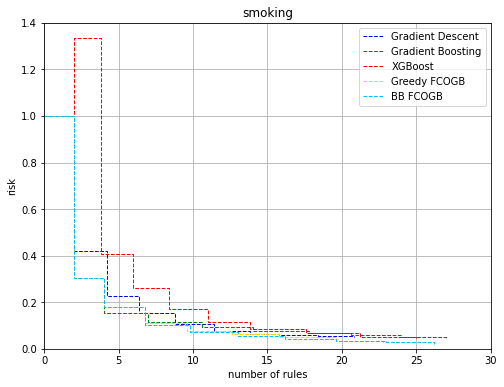

done


In [27]:
datasets = ['titanic','tic-tac-toe','iris','breast_cancer','load_wine',
            'IBM_HR', 'telco_churn', 'GenderRecognition',
            'banknote', 'liver', 'magic', 'adult', 'digits5',
            'insurance','make_friedman1',
            'make_friedman2','make_friedman3','wage', 'Demographics','gdp','used_cars','load_diabetes',
            'boston','world_happiness_indicator', 'who_life_expectancy', 'mobile_prices', 'suicide_rates_cleaned','videogamesales',
             'red_wine_quality',
            'covid_vic','covid',
            'bicycle','ships','smoking']

values = [
    'mwg_boosting__greedy',
    'gpe_boosting__greedy', 
    'xgb_keep__exhaustive', 
    'orth_fc_Newton-CG_greedy',
    'orth_fc_Newton-CG_exhaustive'
]
print(len(datasets))
cols = [10, 10, 10, 5, 6, 
        3, 4, 3, 10, 10, 5, 5, 3,
        10, 4, 10, 10, 10,
       2, 20, 10, 5, 4, 10, 5, 4, 3, 3, 5,
        10, 10, 10, 10, 10]
max_components = [30] * len(datasets)
max_components[14]=25
max_components[15]=20
f = open("../analysis_results/compare_test_greedy.csv", 'w')
f2 = open("../analysis_results/compare_train_greedy.csv", 'w')
f.write('dataset'+(','+','.join(values))*4+'\n')
for i in range(len(datasets)):
#     try:
        max_risk = get_max_risk(datasets[i])
        train, test, ands, aucs_tr, aucs_te = compare_risks_greedy(datasets[i], col=cols[i], max_length=max_components[i])
#         gpe_orth_test = largest_gaps(test, ands, 'gpe_boosting__greedy', 'orth_fc_Newton-CG')
#         xgb_orth_test = largest_gaps(test, ands, 'xgb_keep_', 'orth_fc_Newton-CG')
#         orth_gpe_test = largest_gaps(test, ands, 'orth_fc_Newton-CG', 'gpe_boosting_')
#         orth_xgb_test = largest_gaps(test, ands, 'orth_fc_Newton-CG', 'xgb_keep_')
#         orth_mwg_test = largest_gaps(test, ands, 'orth_fc_Newton-CG', 'mwg_boosting_')
#         mwg_orth_test = largest_gaps(test, ands, 'mwg_boosting_', 'orth_fc_Newton-CG')
#         gpe_orth_train = largest_gaps(train, ands, 'gpe_boosting_', 'orth_fc_Newton-CG')
#         xgb_orth_train = largest_gaps(train, ands, 'xgb_keep_', 'orth_fc_Newton-CG')
#         orth_gpe_train = largest_gaps(train, ands, 'orth_fc_Newton-CG', 'gpe_boosting_')
#         orth_xgb_train = largest_gaps(train, ands, 'orth_fc_Newton-CG', 'xgb_keep_')
#         orth_mwg_train = largest_gaps(train, ands, 'orth_fc_Newton-CG', 'mwg_boosting_')
#         mwg_orth_train = largest_gaps(train, ands, 'mwg_boosting_', 'orth_fc_Newton-CG')
        
        f.write(datasets[i] + ',')
        for value in values:
            f.write(str(max(ands[value]))+',')
        for value in values:
            f.write(str(aucs_te[value])+',')
#         f.write(str(mwg_orth_test[0])+','+str(mwg_orth_test[1])+','+str(mwg_orth_test[2])+','+str(mwg_orth_test[3])+',')
#         f.write(str(gpe_orth_test[0])+','+str(gpe_orth_test[1])+','+str(gpe_orth_test[2])+','+str(gpe_orth_test[3])+',')
#         f.write(str(xgb_orth_test[0])+','+str(xgb_orth_test[1])+','+str(xgb_orth_test[2])+','+str(xgb_orth_test[3])+',')
#         f.write(str(orth_mwg_test[0])+','+str(orth_mwg_test[1])+','+str(orth_mwg_test[2])+','+str(orth_mwg_test[3])+',')
#         f.write(str(orth_gpe_test[0])+','+str(orth_gpe_test[1])+','+str(orth_gpe_test[2])+','+str(orth_gpe_test[3])+',')
#         f.write(str(orth_xgb_test[0])+','+str(orth_xgb_test[1])+','+str(orth_xgb_test[2])+','+str(orth_xgb_test[3])+',')
        f.write('\n')
        
        f2.write(datasets[i] + ',')
        for value in values:
            f2.write(str(max(ands[value]))+',')
        for value in values:
            f2.write(str(aucs_tr[value])+',')
#         f2.write(str(mwg_orth_train[0])+','+str(mwg_orth_train[1])+','+str(mwg_orth_train[2])+','+str(mwg_orth_train[3])+',')
#         f2.write(str(gpe_orth_train[0])+','+str(gpe_orth_train[1])+','+str(gpe_orth_train[2])+','+str(gpe_orth_train[3])+',')
#         f2.write(str(xgb_orth_train[0])+','+str(xgb_orth_train[1])+','+str(xgb_orth_train[2])+','+str(xgb_orth_train[3])+',')
#         f2.write(str(orth_mwg_train[0])+','+str(orth_mwg_train[1])+','+str(orth_mwg_train[2])+','+str(orth_mwg_train[3])+',')
#         f2.write(str(orth_gpe_train[0])+','+str(orth_gpe_train[1])+','+str(orth_gpe_train[2])+','+str(orth_gpe_train[3])+',')
#         f2.write(str(orth_xgb_train[0])+','+str(orth_xgb_train[1])+','+str(orth_xgb_train[2])+','+str(orth_xgb_train[3])+',')
        f2.write('\n')

f.close()
f2.close()
print('done')